<a href="https://colab.research.google.com/github/akfangus/DeepProject/blob/main/noise_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


style.use('seaborn-talk')

krfont={'family':'Malgun Gothic', 'weight': 'bold', 'size' : 10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [ ]:
df_8= pd.read_csv('211208 LAT EPD-VI PROBE/8. 8% 1sec Ar_O2_CF4_30_15_30_60mTorr_250Ws_250Wb_Si3N4.csv', sep=';', skiprows=4)
df_4 = pd.read_csv('211208 LAT EPD-VI PROBE/12. 4% 1sec Ar_O2_CF4_30_15_30_60mTorr_250Ws_250Wb_Si3N4_.csv',sep=';',skiprows=4)
df_1 = pd.read_csv('211208 LAT EPD-VI PROBE/13. 1% 1sec Ar_O2_CF4_30_15_30_60mTorr_250Ws_250Wb_Si3N4_.csv',sep=';',skiprows=4)

In [ ]:
features = ['F1 Power Watts','F1 Standing Wave Ratio ','F1 Impedance Real Ohms','F1 Current Real Amps']

In [ ]:
df_8.drop('Unnamed: 107', axis=1, inplace=True)
df_4.drop('Unnamed: 107', axis=1, inplace=True)
df_1.drop('Unnamed: 107', axis=1, inplace=True)

Time time unit  Frequency 1 MHz  F1 Power Watts  F1 Forward Power Watts  \
0             0.000              0.0             0.0                     0.0   
1             1.001              0.0             0.0                     0.0   
2             2.001              0.0             0.0                     0.0   
3             2.999              0.0             0.0                     0.0   
4             4.000              0.0             0.0                     0.0   
..              ...              ...             ...                     ...   
118         118.000              0.0             0.0                     0.0   
119         119.000              0.0             0.0                     0.0   
120         120.000              0.0             0.0                     0.0   
121         121.000              0.0             0.0                     0.0   
122         122.000              0.0             0.0                     0.0   

     F1 Reflected Power Watts  F1 Standing Wave Ratio   F1 Voltage Volts  \
0                         0.0                      0.0               0.0   
1                         0.0                      0.0               0.0   
2                         0.0                      0.0               0.0   
3                         0.0                      0.0               0.0   
4                         0.0                      0.0               0.0   
..                        ...                      ...               ...   
118                       0.0                      0.0               0.0   
119                       0.0                      0.0               0.0   
120                       0.0                      0.0               0.0   
121                       0.0                      0.0               0.0   
122                       0.0                      0.0               0.0   

     F1 Current Amps  F1 Phase Degrees  F1 Harmonic Phase Degrees  ...  \
0                0.0               0.0                          0  ...   
1                0.0               0.0                          0  ...   
2                0.0               0.0                          0  ...   
3                0.0               0.0                          0  ...   
4                0.0               0.0                          0  ...   
..               ...               ...                        ...  ...   
118              0.0               0.0                          0  ...   
119              0.0               0.0                          0  ...   
120              0.0               0.0                          0  ...   
121              0.0               0.0                          0  ...   
122              0.0               0.0                          0  ...   

     F2 Impedance Real Ohms  F2 Impedance Imaginary Ohms  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   
..                      ...                          ...   
118                       0                            0   
119                       0                            0   
120                       0                            0   
121                       0                            0   
122                       0                            0   

     F2 Current Magnitude Amps  F2 Current Phase Degrees  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
..                         ...                       ...   
118                          0                         0   
119                          0           

- 데이터 인터벌 시간 1초
- 특정 주파수가 뽑히는 부분만 데이터 슬라이싱해서 0부터 1초씩 부여

<AxesSubplot:>

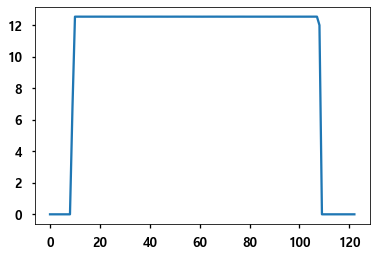

In [ ]:
df_8['Frequency 1 MHz'].plot()

In [ ]:
temp_8 = df_8[df_8['Frequency 1 MHz']>12]
temp_4 = df_4[df_4['Frequency 1 MHz']>12]
temp_1 = df_1[df_1['Frequency 1 MHz']>12]

<AxesSubplot:>

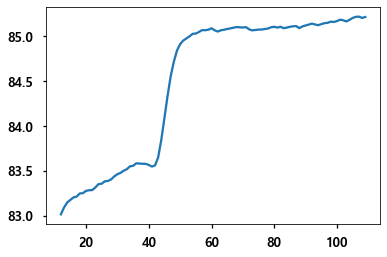

In [ ]:
temp_4['F1 Phase Degrees'].plot()

In [ ]:
asdf = temp_8.copy()
asdf

Time time unit  Frequency 1 MHz  F1 Power Watts  F1 Forward Power Watts  \
10           10.001        12.558993      174.697890             3298.350330   
11           11.001        12.559097      178.048947             3329.794701   
12           12.003        12.559601      177.974583             3326.914814   
13           13.000        12.558635      178.061811             3325.895461   
14           14.001        12.558829      178.394226             3323.507558   
..              ...              ...             ...                     ...   
104         104.000        12.559407      173.913579             3273.020455   
105         105.000        12.559043      173.295789             3266.091483   
106         106.001        12.559539      172.882317             3258.959114   
107         107.004        12.558925      174.274420             3267.581862   
108         107.999        12.017233      152.341072             2850.665449   

     F1 Reflected Power Watts  F1 Standing Wave Ratio   F1 Voltage Volts  \
10                3123.652440                73.507636         80.672874   
11                3151.745754                72.792539         81.412659   
12                3148.940231                72.759064         81.655769   
13                3147.833650                72.699524         81.820724   
14                3145.113332                72.506727         81.939430   
..                        ...                      ...               ...   
104               3099.106876                73.265590        116.713280   
105               3092.795694                73.374042        116.930832   
106               3086.076797                73.389323        117.122810   
107               3093.307442                72.984841        117.652832   
108               2698.324377                72.835828        110.215958   

     F1 Current Amps  F1 Phase Degrees  F1 Harmonic Phase Degrees  ...  \
10         15.946061         82.194992                          0  ...   
11         16.019064         82.153221                          0  ...   
12         16.011469         82.176285                          0  ...   
13         16.008476         82.186836                          0  ...   
14         16.001850         82.180313                          0  ...   
..               ...               ...                        ...  ...   
104        15.793552         84.586197                          0  ...   
105        15.776133         84.609589                          0  ...   
106        15.757993         84.625130                          0  ...   
107        15.776524         84.612556                          0  ...   
108        14.734333         84.617256                          0  ...   

     F2 Impedance Real Ohms  F2 Impedance Imaginary Ohms  \
10                        0                            0   
11                        0                            0   
12                        0                            0   
13                        0                            0   
14                        0                            0   
..                      ...                          ...   
104                       0                            0   
105                       0                            0   
106                       0                            0   
107                       0                            0   
108                       0                            0   

     F2 Current Magnitude Amps  F2 Current Phase Degrees  \
10                           0                         0   
11                           0                         0   
12                           0                         0   
13                           0                         0   
14                           0                         0   
..                         ...                       ...   
104                          0                         0   
105                          0           

In [ ]:
timetime = []
for idx in range(len(asdf)):
    timetime.append(idx*1)
    
asdf['Time time unit'] = timetime

<AxesSubplot:xlabel='Time time unit', ylabel='F1 Phase Degrees'>

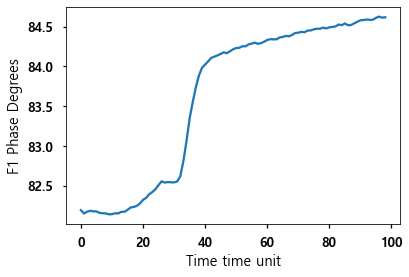

In [ ]:
sns.lineplot(data= asdf, x='Time time unit', y='F1 Phase Degrees')

<AxesSubplot:xlabel='Time time unit', ylabel='F1  H2 Phase Degrees'>

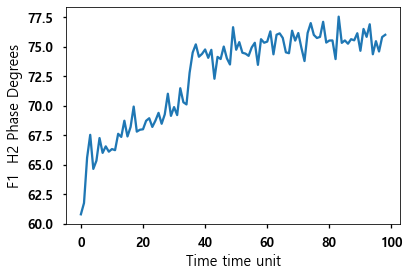

In [ ]:
sns.lineplot(data= asdf, x='Time time unit', y='F1  H2 Phase Degrees')

In [ ]:
for item in asdf.columns:
    print(item)
    


Time time unit
Frequency 1 MHz
F1 Power Watts
F1 Forward Power Watts
F1 Reflected Power Watts
F1 Standing Wave Ratio 
F1 Voltage Volts
F1 Current Amps
F1 Phase Degrees
F1 Harmonic Phase Degrees
F1 Impedance Magnitude Ohms
F1 Impedance Phase Degrees
F1 Impedance Real Ohms
F1 Impedance Imaginary Ohms
F1 Current Magnitude Amps
F1 Current Phase Degrees
F1 Current Real Amps
F1 Current Imaginary Amps
F1 Gamma Reflection Coefficient Magnitude 
F1 Gamma Reflection Coefficient Phase Degrees
F1 Gamma Reflection Coefficient Real 
F1 Gamma Reflection Coefficient Imaginary 
F1  H2 Voltage Volts
F1  H2 Current Amps
F1  H2 Phase Degrees
F1  H2 Harmonic  Phase Degrees
F1  H2 Impedance  Magnitude Ohms
F1  H2 Impedance  Phase Degrees
F1  H2 Impedance  Real Ohms
F1  H2 Impedance  Imaginary Ohms
F1  H2 Current  Magnitude Amps
F1  H2 Current  Phase Degrees
F1  H2 Current  Real Amps
F1  H2 Current  Imaginary Amps
F1  H2 Gamma Reflection Coefficient  Magnitude 
F1  H2 Gamma Reflection Coefficient  Phase Degr

- ppt에 있는 feature 추출

In [ ]:
phase_feature = ['F1 Phase Degrees','F1  H2 Phase Degrees','F1  H3 Phase Degrees','F1  H4 Phase Degrees','F1  H5 Phase Degrees']
impedance_phase_feature = ['F1 Impedance Phase Degrees','F1  H2 Impedance  Phase Degrees',
                           'F1  H3 Impedance  Phase Degrees','F1  H4 Impedance  Phase Degrees','F1  H5 Impedance  Phase Degrees']
impedance_real_ohms_feature = ['F1 Impedance Real Ohms','F1  H2 Impedance  Real Ohms','F1  H4 Impedance  Real Ohms','F1  H5 Impedance  Real Ohms']
current_phase_feature = ['F1 Current Phase Degrees','F1  H2 Current  Phase Degrees','F1  H3 Current  Phase Degrees',
                         'F1  H4 Current  Phase Degrees','F1  H5 Current  Phase Degrees']


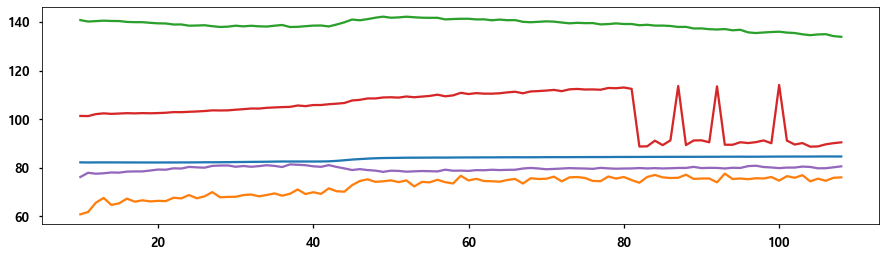

In [ ]:
plt.plot(temp_8[phase_feature])
plt.show()

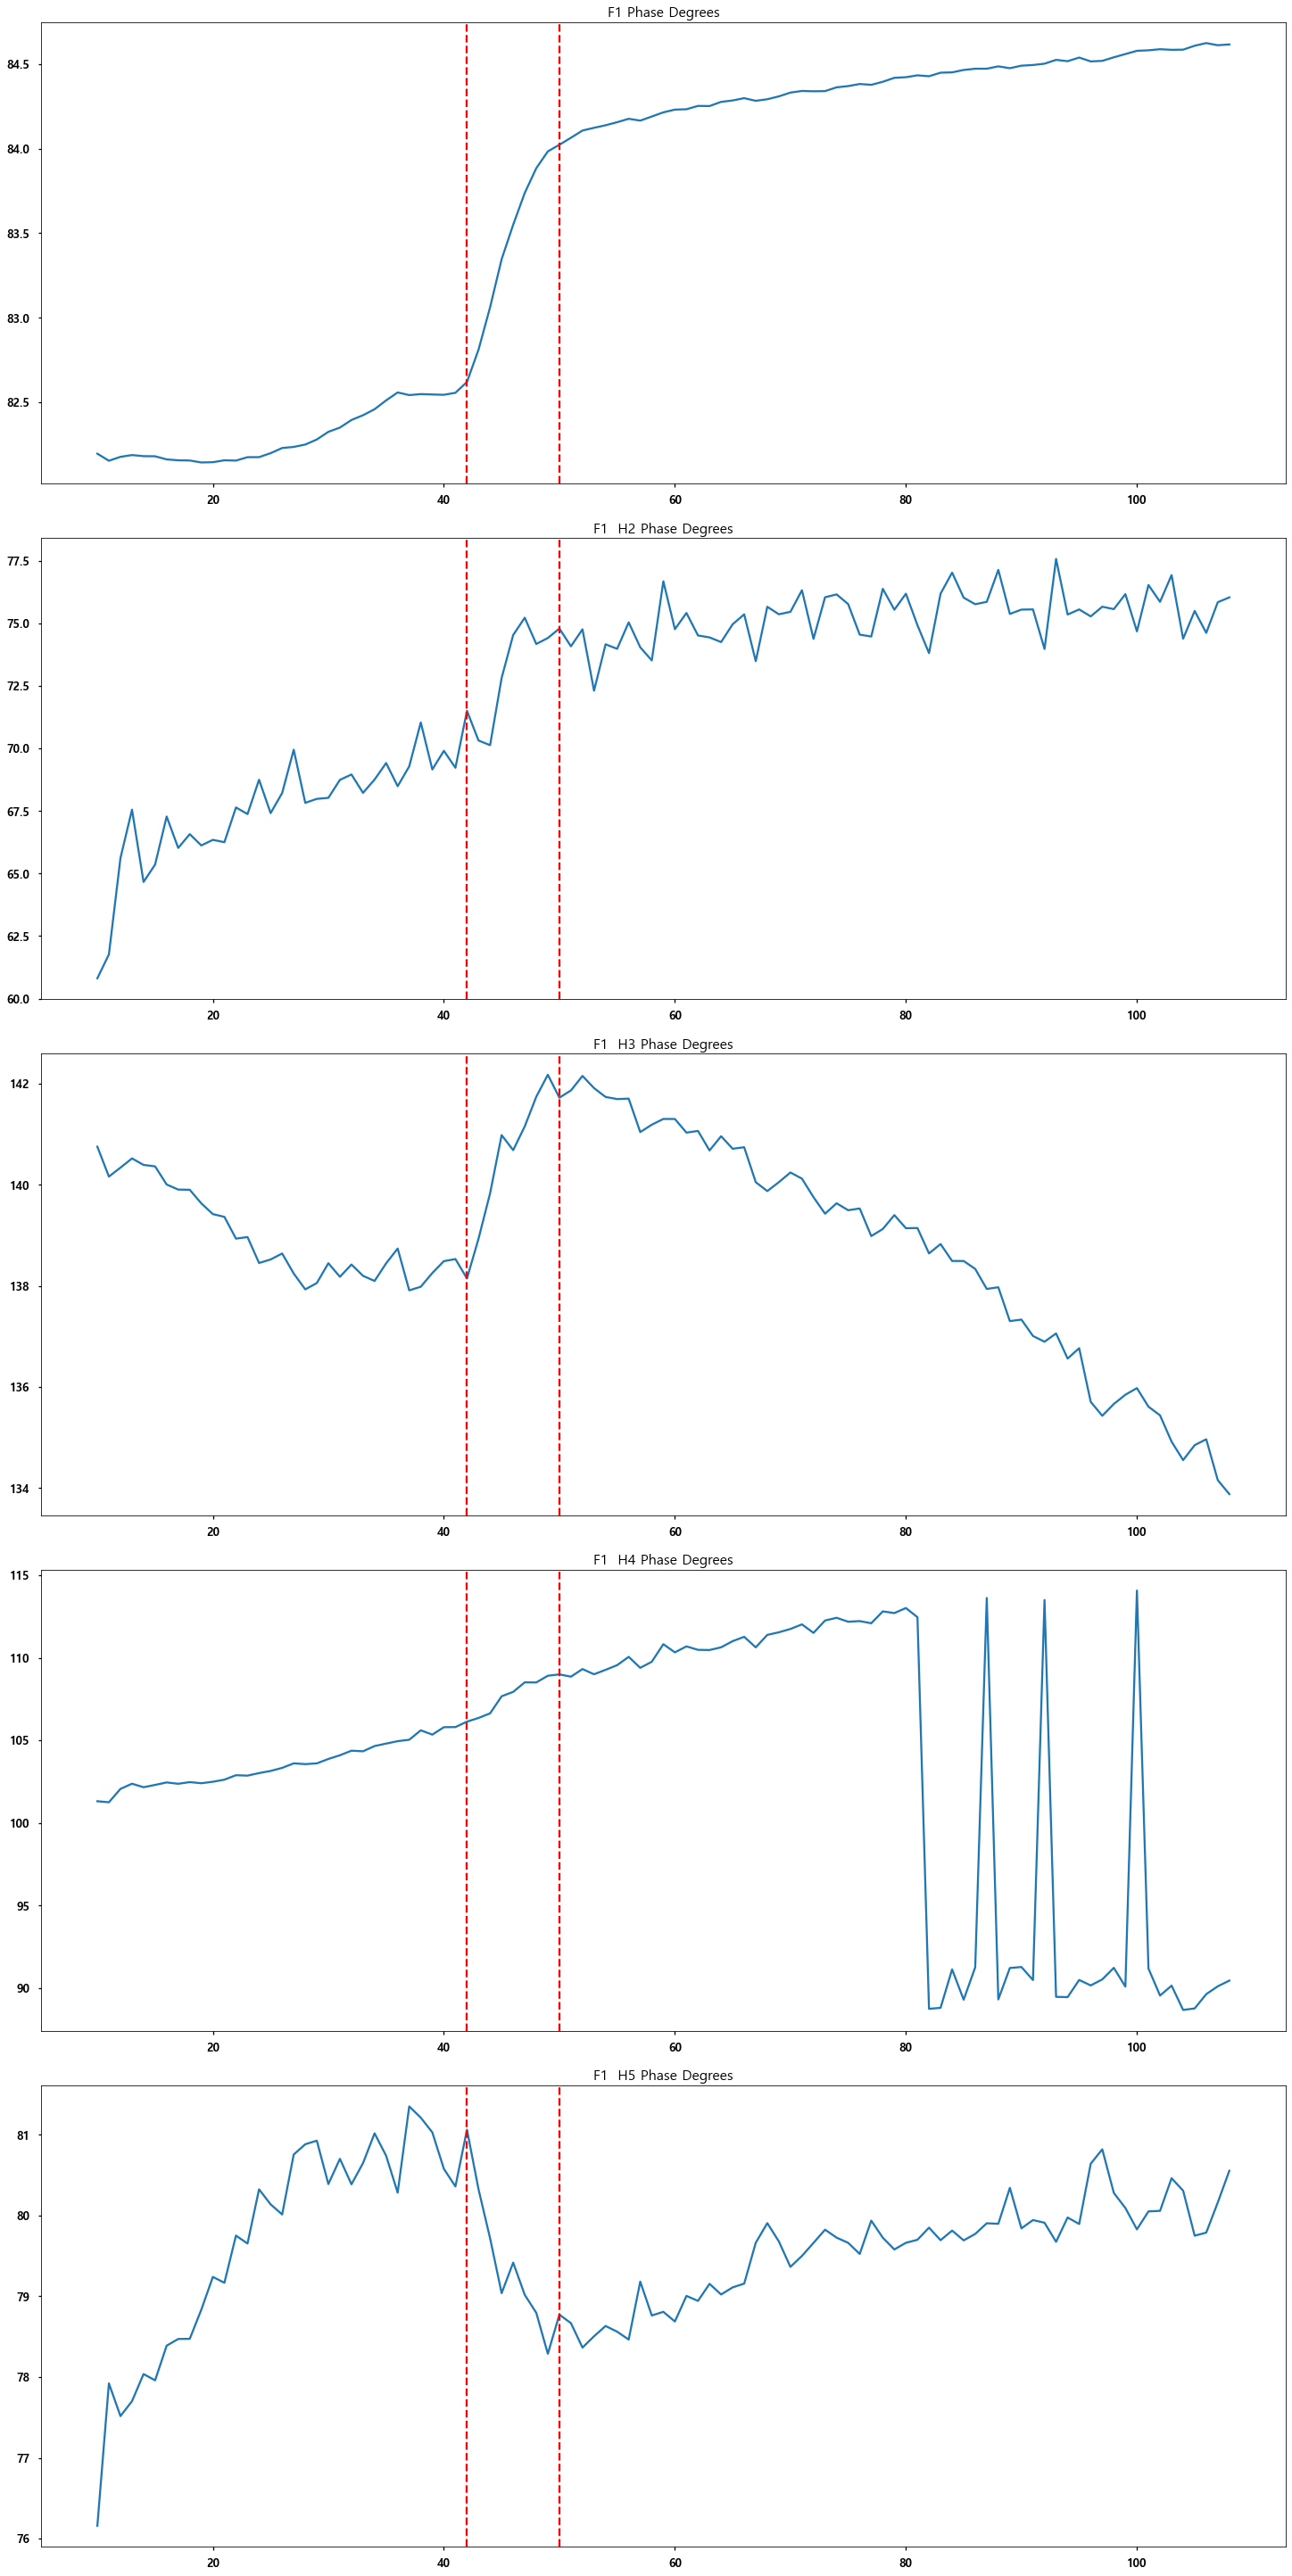

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(20,40),
                       sharex=False, constrained_layout=True)

for idx, item in enumerate(phase_feature):
    ax[idx].plot(asdf[item])
    ax[idx].set_title(item)
    ax[idx].axvline(42, color='r', linestyle='--')
    ax[idx].axvline(50, color='r', linestyle='--')
    
    
# plt.axvline(40, color='r', linestyle='--')

# plt.suptitle('8% noise filtering',fontsize=20)


# 1. Moving average
- 10개 평균을 하나의 점으로 취급하여 노이즈를 제거하는 방법이라고 함.
- 10개평균을 하나의 점으로 표현하기에 총 데이터 length가 10개 줄어듬. 



- n개의 점이 shift??
- 인터벌 시간 1초이므로 데이터 length에 -n개 된 moving average를 만들고 인덱싱.

In [ ]:
temp_8_list=[]
temp_4_list=[]
temp_1_list=[]

In [ ]:
temp_8.iloc[:11].mean()

Time time unit                                     15.001182
Frequency 1 MHz                                    12.559051
F1 Power Watts                                    178.964916
F1 Forward Power Watts                           3325.187612
F1 Reflected Power Watts                         3146.222696
                                                    ...     
F2 Current Imaginary Amps                           0.000000
F2 Gamma Reflection Coefficient Magnitude           0.000000
F2 Gamma Reflection Coefficient Phase Degrees       0.000000
F2 Gamma Reflection Coefficient Real                0.000000
F2 Gamma Reflection Coefficient Imaginary           0.000000
Length: 107, dtype: float64

In [ ]:
trash = []

In [ ]:
for i in range(0,(len(temp_8)-10)):
#     print(i)
    value = temp_8.iloc[i:i+10]['F1  H2 Phase Degrees'].mean()
    trash.append(value)
    
    
# for i in range(0,len(temp_4_using),10):
# #     print(i)
#     value = temp_4_using.iloc[i:i+10]['Voltage'].mean()
#     temp_4_list.append(value)
    
    
# for i in range(0,len(temp_1_using),10):
# #     print(i)
#     value = temp_1_using.iloc[i:i+10]['Voltage'].mean()
#     temp_1_list.append(value)

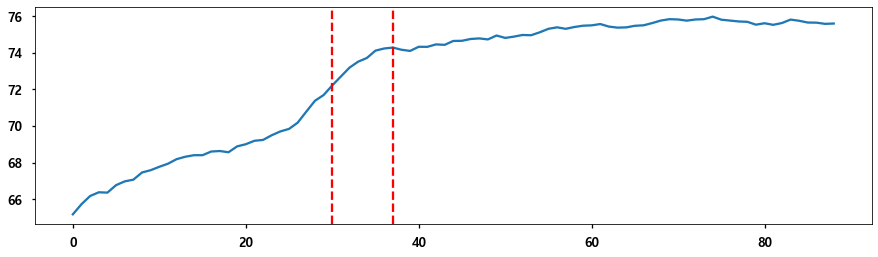

In [ ]:
plt.plot(trash)
plt.axvline(30, color='r', linestyle='--')
plt.axvline(37, color='r', linestyle='--')

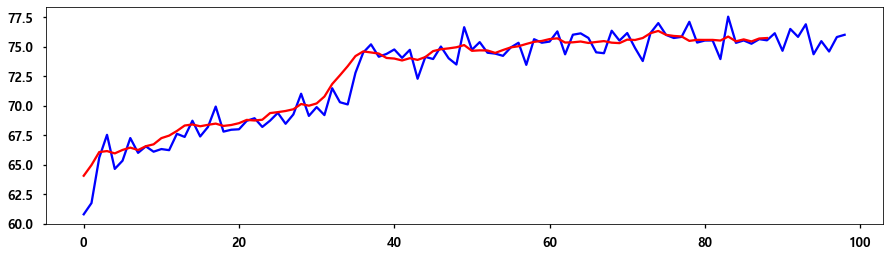

In [ ]:
N = len(temp_8)
fig = plt.figure()
plt.plot(range(0, N), temp_8['F1  H2 Phase Degrees'], 'b')
plt.plot(range(0, N-10), trash, 'r')
plt.show()

In [ ]:
trash, temp_8['F1  H2 Phase Degrees']

([64.08071289064,
  64.98968582154001,
  66.09167022706,
  66.17256622316,
  65.97703094484,
  66.26905517579999,
  66.46639556888,
  66.26124420168,
  66.58480834961999,
  66.74510650636,
  67.26994323732,
  67.48346862794,
  67.87663269044,
  68.33822479250001,
  68.42791442871999,
  68.2751373291,
  68.39713592528001,
  68.50209503172,
  68.30403137203999,
  68.3837585449,
  68.5381637573,
  68.81635589598,
  68.76569366454001,
  68.83032989501999,
  69.39303894042,
  69.47347106934001,
  69.57127532960001,
  69.71834411622,
  70.16255340576001,
  70.0181716919,
  70.21246032714001,
  70.79445648192,
  71.85537719726,
  72.59915161132,
  73.37059783934001,
  74.22690887450001,
  74.62186737060001,
  74.53184509276001,
  74.43908996581999,
  74.06592864989999,
  74.01556549072001,
  73.85364074706,
  74.04495697019999,
  73.90162811278,
  74.14315948485999,
  74.64668426514,
  74.80354614258002,
  74.87846679688,
  74.97283477782,
  75.15706481932,
  74.67140655516,
  74.710559082020

# 이동평균 필터?

In [ ]:
temp_8['F1  H2 Phase Degrees']

10     60.812092
11     61.765812
12     65.615517
13     67.549713
14     64.660431
         ...    
104    74.380638
105    75.490028
106    74.612862
107    75.839119
108    76.030495
Name: F1  H2 Phase Degrees, Length: 99, dtype: float64

0
60.8120918274
1
61.7658119202
2
65.6155166626
3
67.5497131348
4
64.6604309082
5
65.3569564819
6
67.2757339478
7
66.0199966431
8
66.5720367432
9
66.120552063
10
66.3436584473
11
66.2499771118
12
67.6378173828
13
67.3735275269
14
68.7447357178
15
67.4112854004
16
68.2157974243
17
69.9457778931
18
67.821975708
19
67.9808502197
20
68.0212783813
21
68.7405929565
22
68.9554595947
23
68.2206115723
24
68.7528762817
25
69.4122390747
26
68.4872817993
27
69.2786407471
28
71.0341567993
29
69.1550369263
30
69.901260376
31
69.2226257324
32
71.4996871948
33
70.31224823
34
70.1264801025
35
72.8112411499
36
74.5272293091
37
75.2185592651
38
74.1694793701
39
74.4080352783
40
74.7860336304
41
74.0771179199
42
74.7547836304
43
72.3036727905
44
74.1562194824
45
73.9764099121
46
75.0336990356
47
74.0381393433
48
73.5113296509
49
76.6738433838
50
74.7607192993
51
75.4083023071
52
74.509979248
53
74.4324798584
54
74.245552063
55
74.9564819336
56
75.3538894653
57
73.4806976318
58
75.656211853
59
75.357078552

# NOise Filter??

- "Butterworth filter"
- 필터링을 하게 되면 전체적인 추세가 반영된 데이터만 남게 되고 전체를 대표하는 값을 얻을 수 있다고 함

### 잡음 처리

- Moving Average Filter : window(mask)가 이동하면서 주위 값들에 비해 높거나 낮을 경우 평균 값으로 대체

http://pubdata.tistory.com/53  [R] 잡음 처리(MAF), 이상치 검출(카이제곱분포, LOF)

- Median Filter : 일정 범위의 중간 값을 해당 지점의 값으로 지정 (잡음이 클 경우 MAF보다 좋은 성능)

- Curve Fitting and Splines : 최적의 파형을 기준으로 해당 파형에 유사한 신호를 검출

- Digital Filter : 고정된 시간 간격 단위의 필터(low pass, high pass, band pass)

- Pivoting : 데이터 셋을 설정한 축Pivot을 기준으로 카운팅하여 새로운 통계값을 생성


In [ ]:
from scipy import signal

In [ ]:
zxcv = np.array(temp_8['F1  H2 Phase Degrees'])
zxcv = zxcv.astype(np.float32)

In [ ]:
N = 2 # Filter order

Wn = 0.3 # Cutoff frequency

B, A = signal.butter(N, Wn, output='ba')

In [ ]:
A

array([ 1.        , -0.74778918,  0.27221494])

In [ ]:
tempf = signal.filtfilt(B,A, zxcv)

<AxesSubplot:xlabel='Time time unit', ylabel='F1  H2 Phase Degrees'>

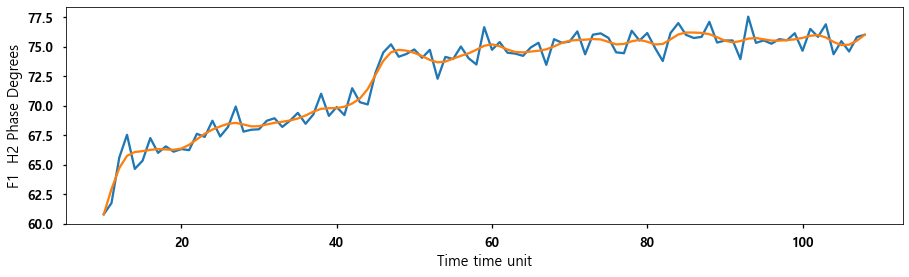

In [ ]:
sns.lineplot(x= temp_8['Time time unit'], y= temp_8['F1  H2 Phase Degrees'])
sns.lineplot(x= temp_8['Time time unit'], y= tempf)

In [ ]:
len(tempf)

99

# Moving average로 
- 8% 4% 1% 모두 EPD가 검출되는 feature에 대해 moving average로 노이즈를 완화하는 작업
-

In [ ]:
phase_feature = ['F1 Phase Degrees','F1  H2 Phase Degrees','F1  H3 Phase Degrees','F1  H4 Phase Degrees','F1  H5 Phase Degrees']
impedance_phase_feature = ['F1 Impedance Phase Degrees','F1  H2 Impedance  Phase Degrees',
                           'F1  H3 Impedance  Phase Degrees','F1  H4 Impedance  Phase Degrees','F1  H5 Impedance  Phase Degrees']
impedance_real_ohms_feature = ['F1 Impedance Real Ohms','F1  H2 Impedance  Real Ohms','F1  H4 Impedance  Real Ohms','F1  H5 Impedance  Real Ohms']
current_phase_feature = ['F1 Current Phase Degrees','F1  H2 Current  Phase Degrees','F1  H3 Current  Phase Degrees',
                         'F1  H4 Current  Phase Degrees','F1  H5 Current  Phase Degrees']


In [ ]:
def mov_average(df, features):
    empty_list = []
    temp_df = pd.DataFrame()
    for item in features:
        for i in range(0,(len(df[item])-10)):
            value = df[item].iloc[i:i+10].mean()
            empty_list.append(value)
        temp_df[item] = empty_list
        empty_list.clear()
    return temp_df
        

## 8%

In [ ]:
xxxx = mov_average(temp_8, phase_feature)
xxxx2 = mov_average(temp_8, impedance_phase_feature)
xxxx3 = mov_average(temp_8, impedance_real_ohms_feature)
xxxx4 = mov_average(temp_8, current_phase_feature)
# xxxx5 = mov_average(temp_8, phase_feature)

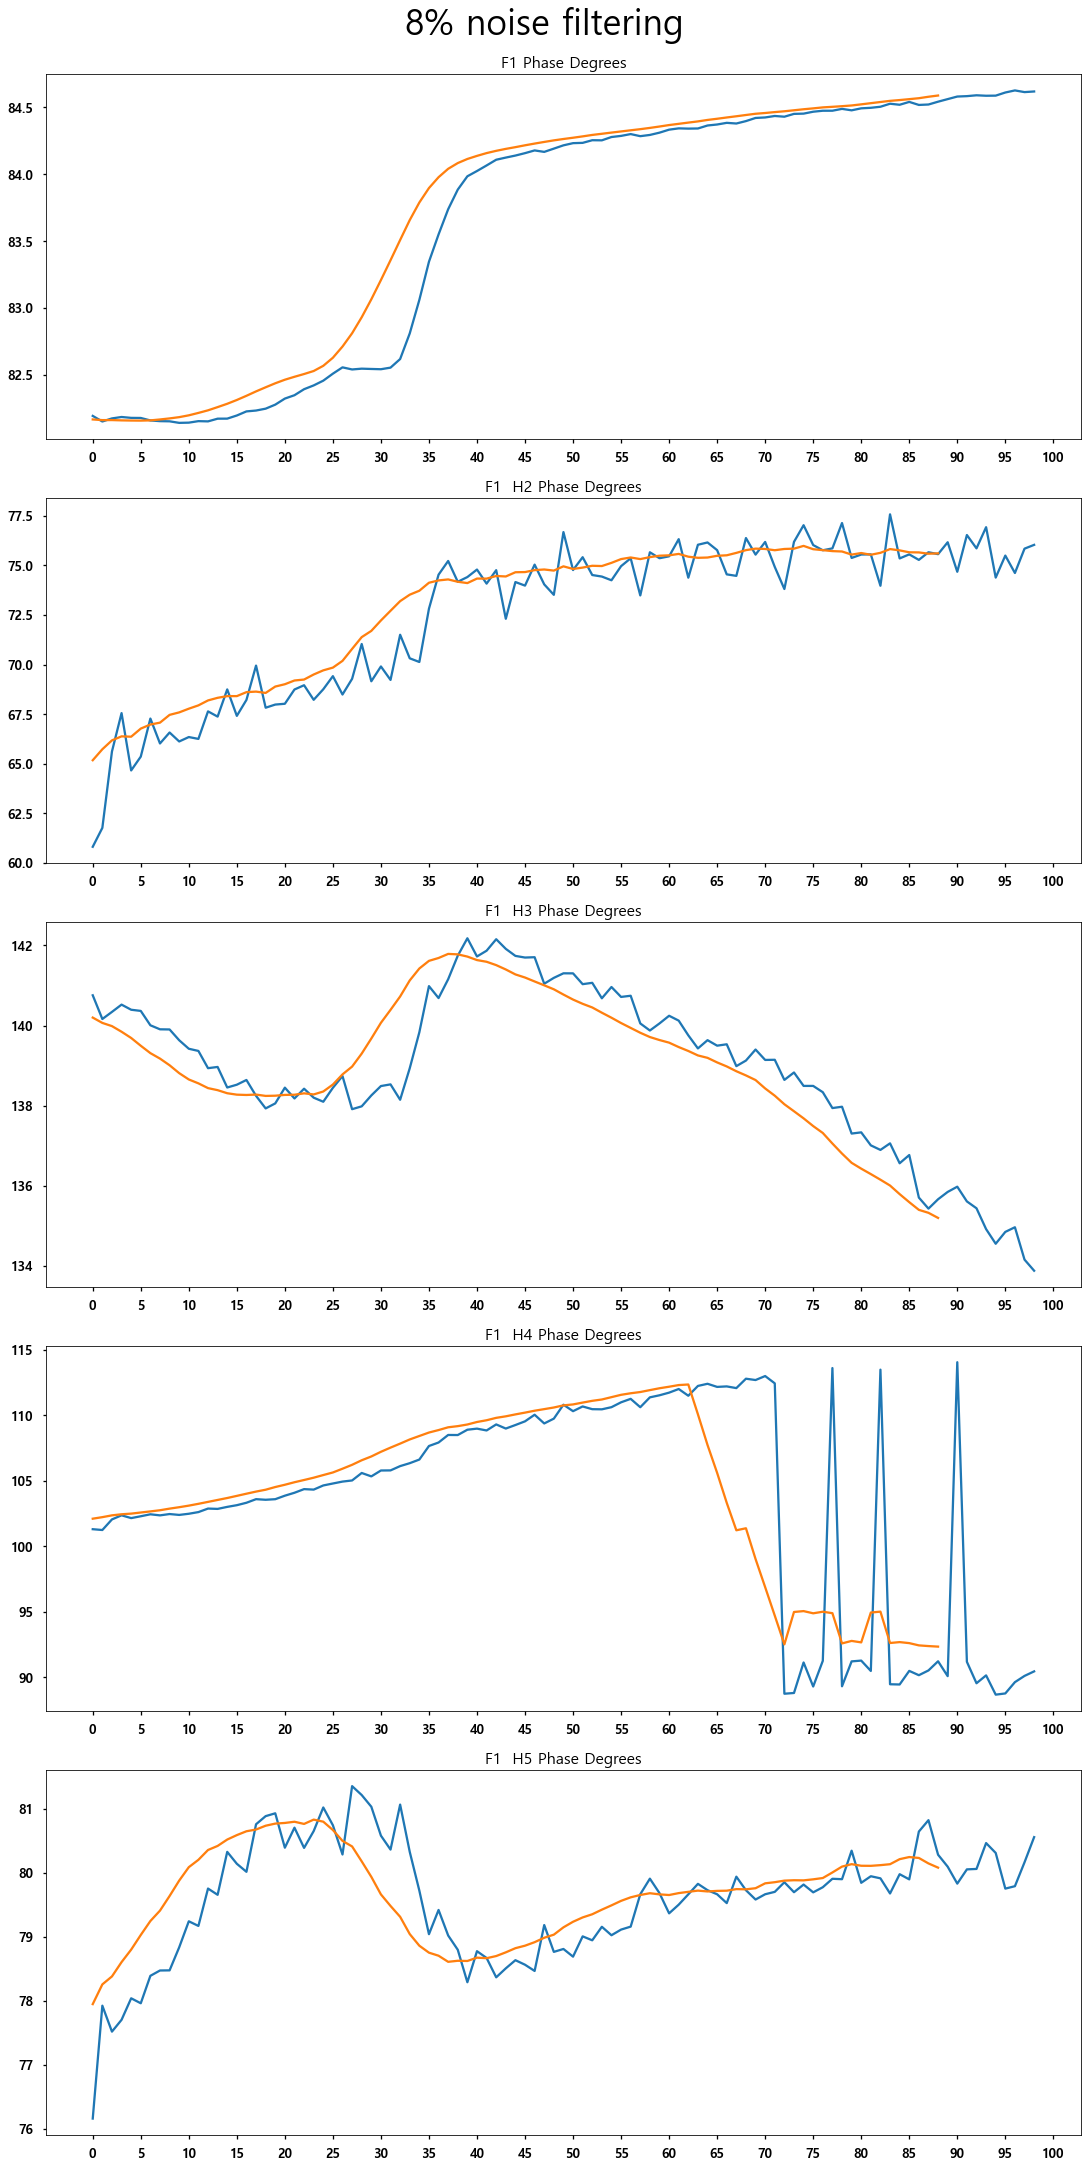

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(0,N-10), xxxx[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('8% noise filtering',fontsize=35)
plt.show()


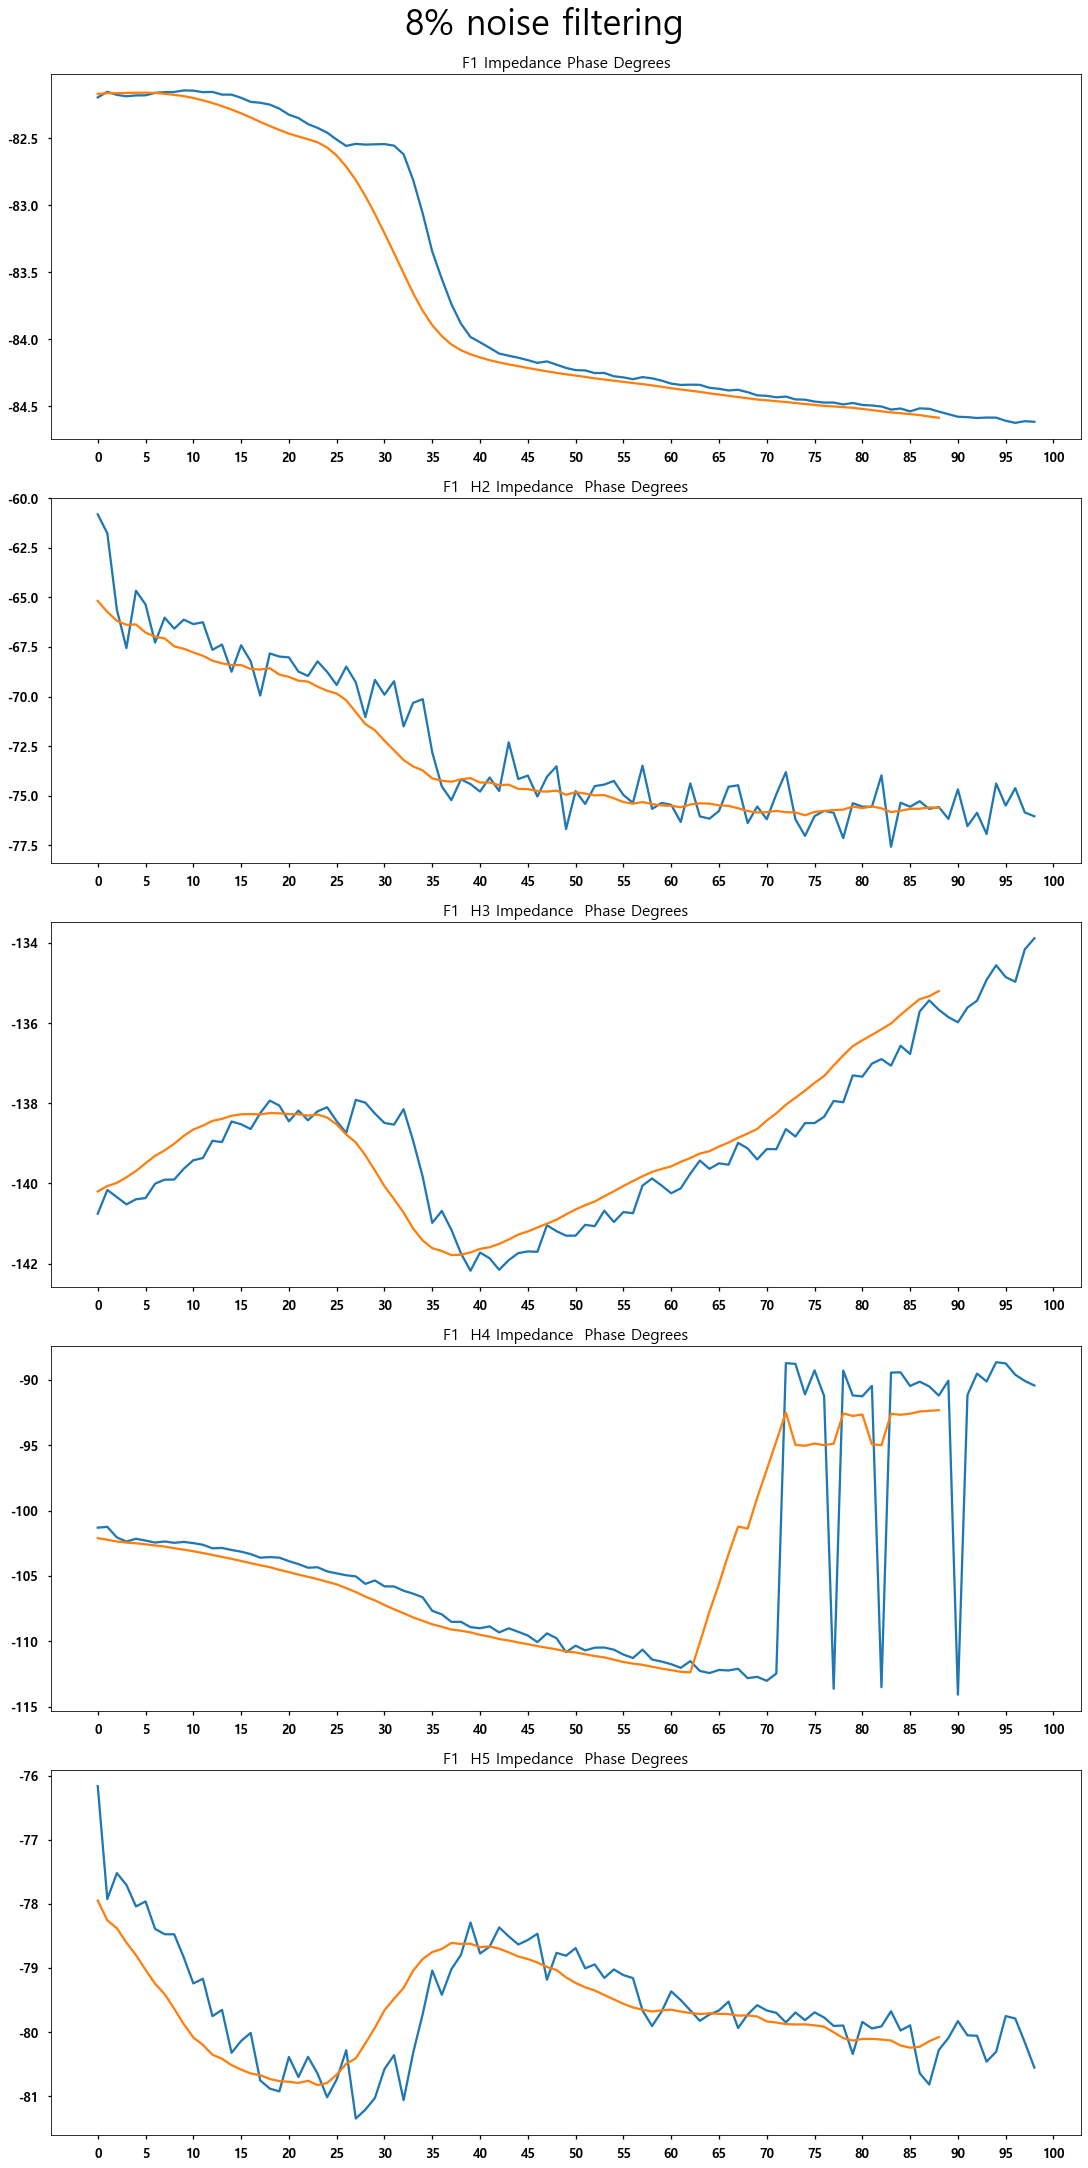

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(impedance_phase_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(0,N-10), xxxx2[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('8% noise filtering',fontsize=35)
plt.show()

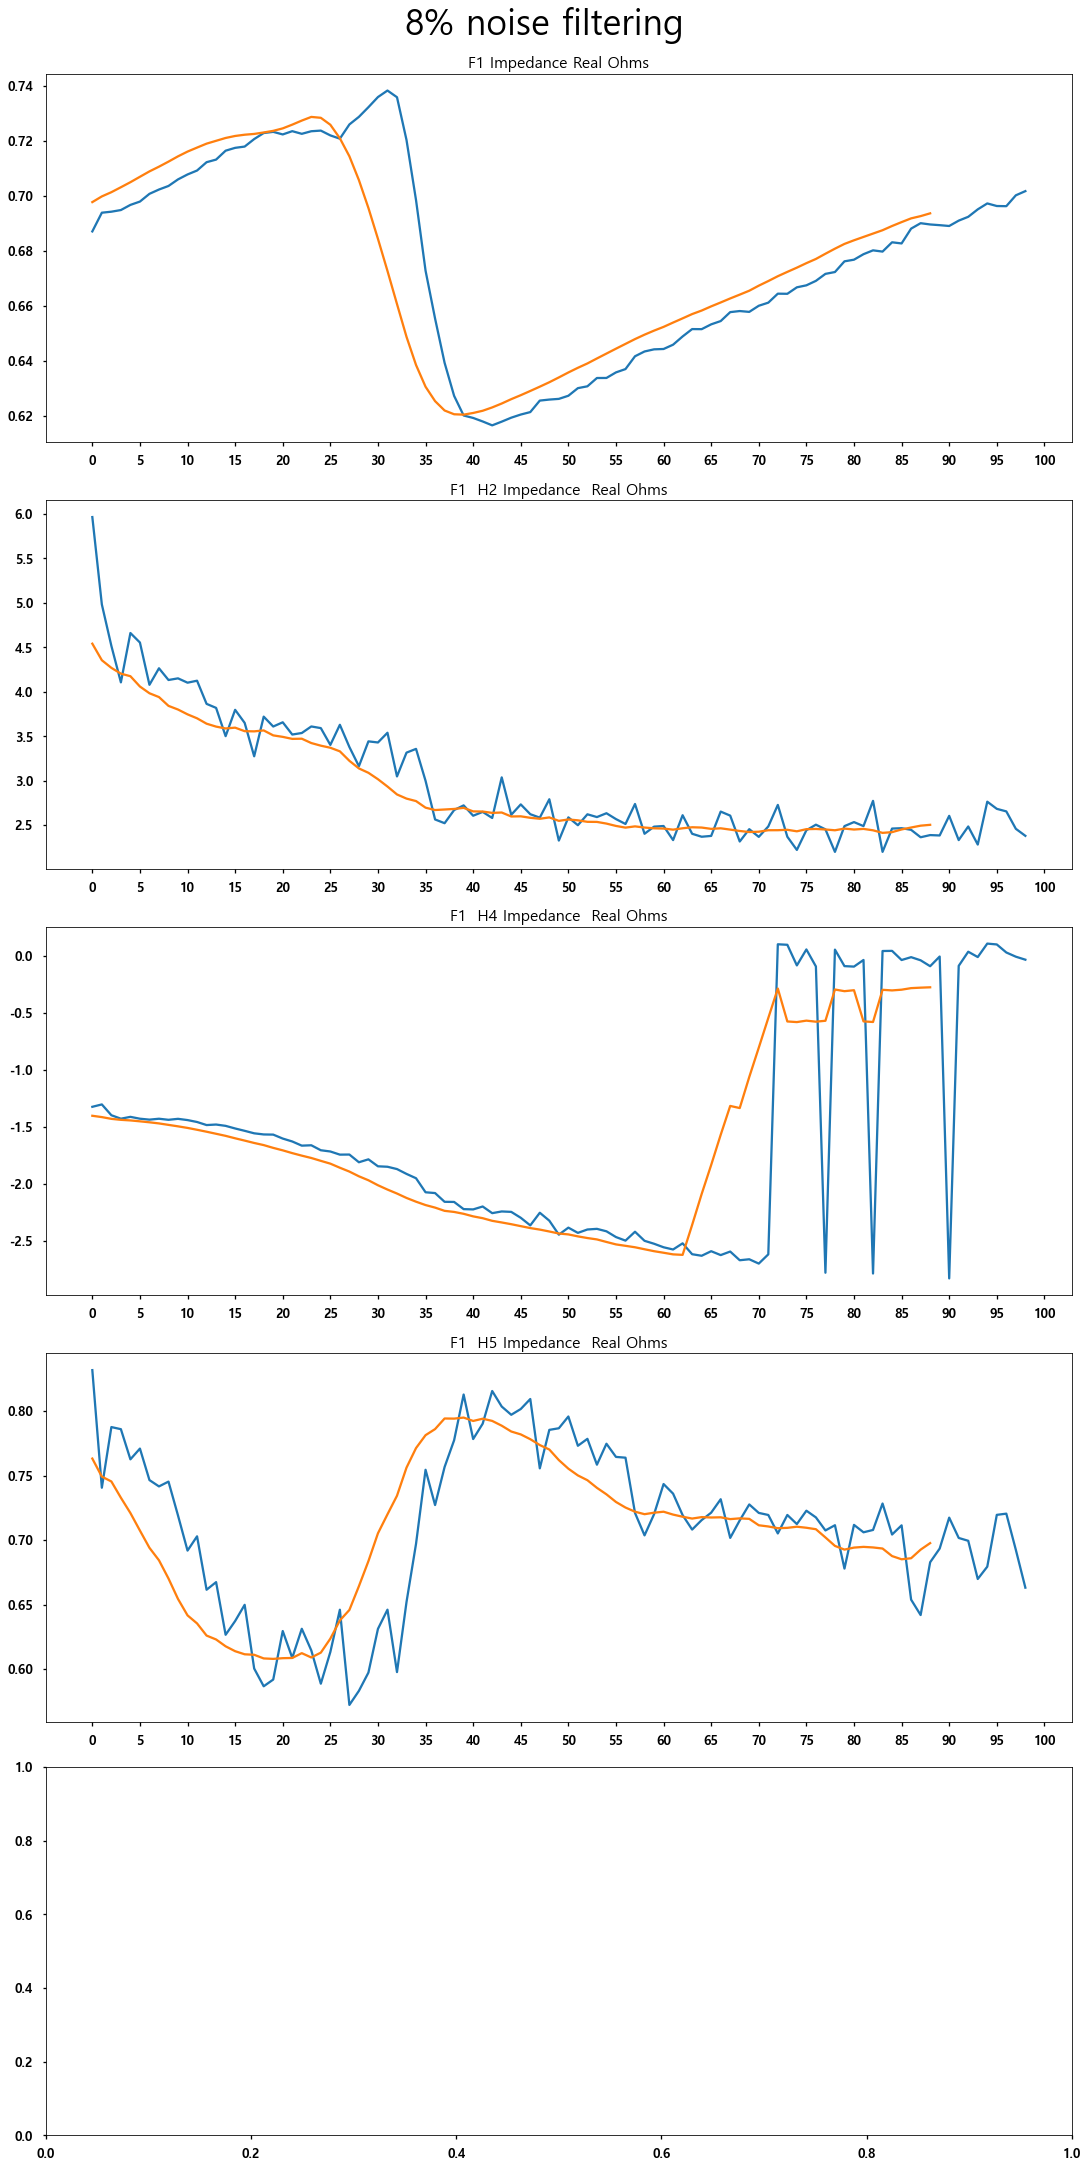

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(impedance_real_ohms_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(0,N-10), xxxx3[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('8% noise filtering',fontsize=35)
plt.show()

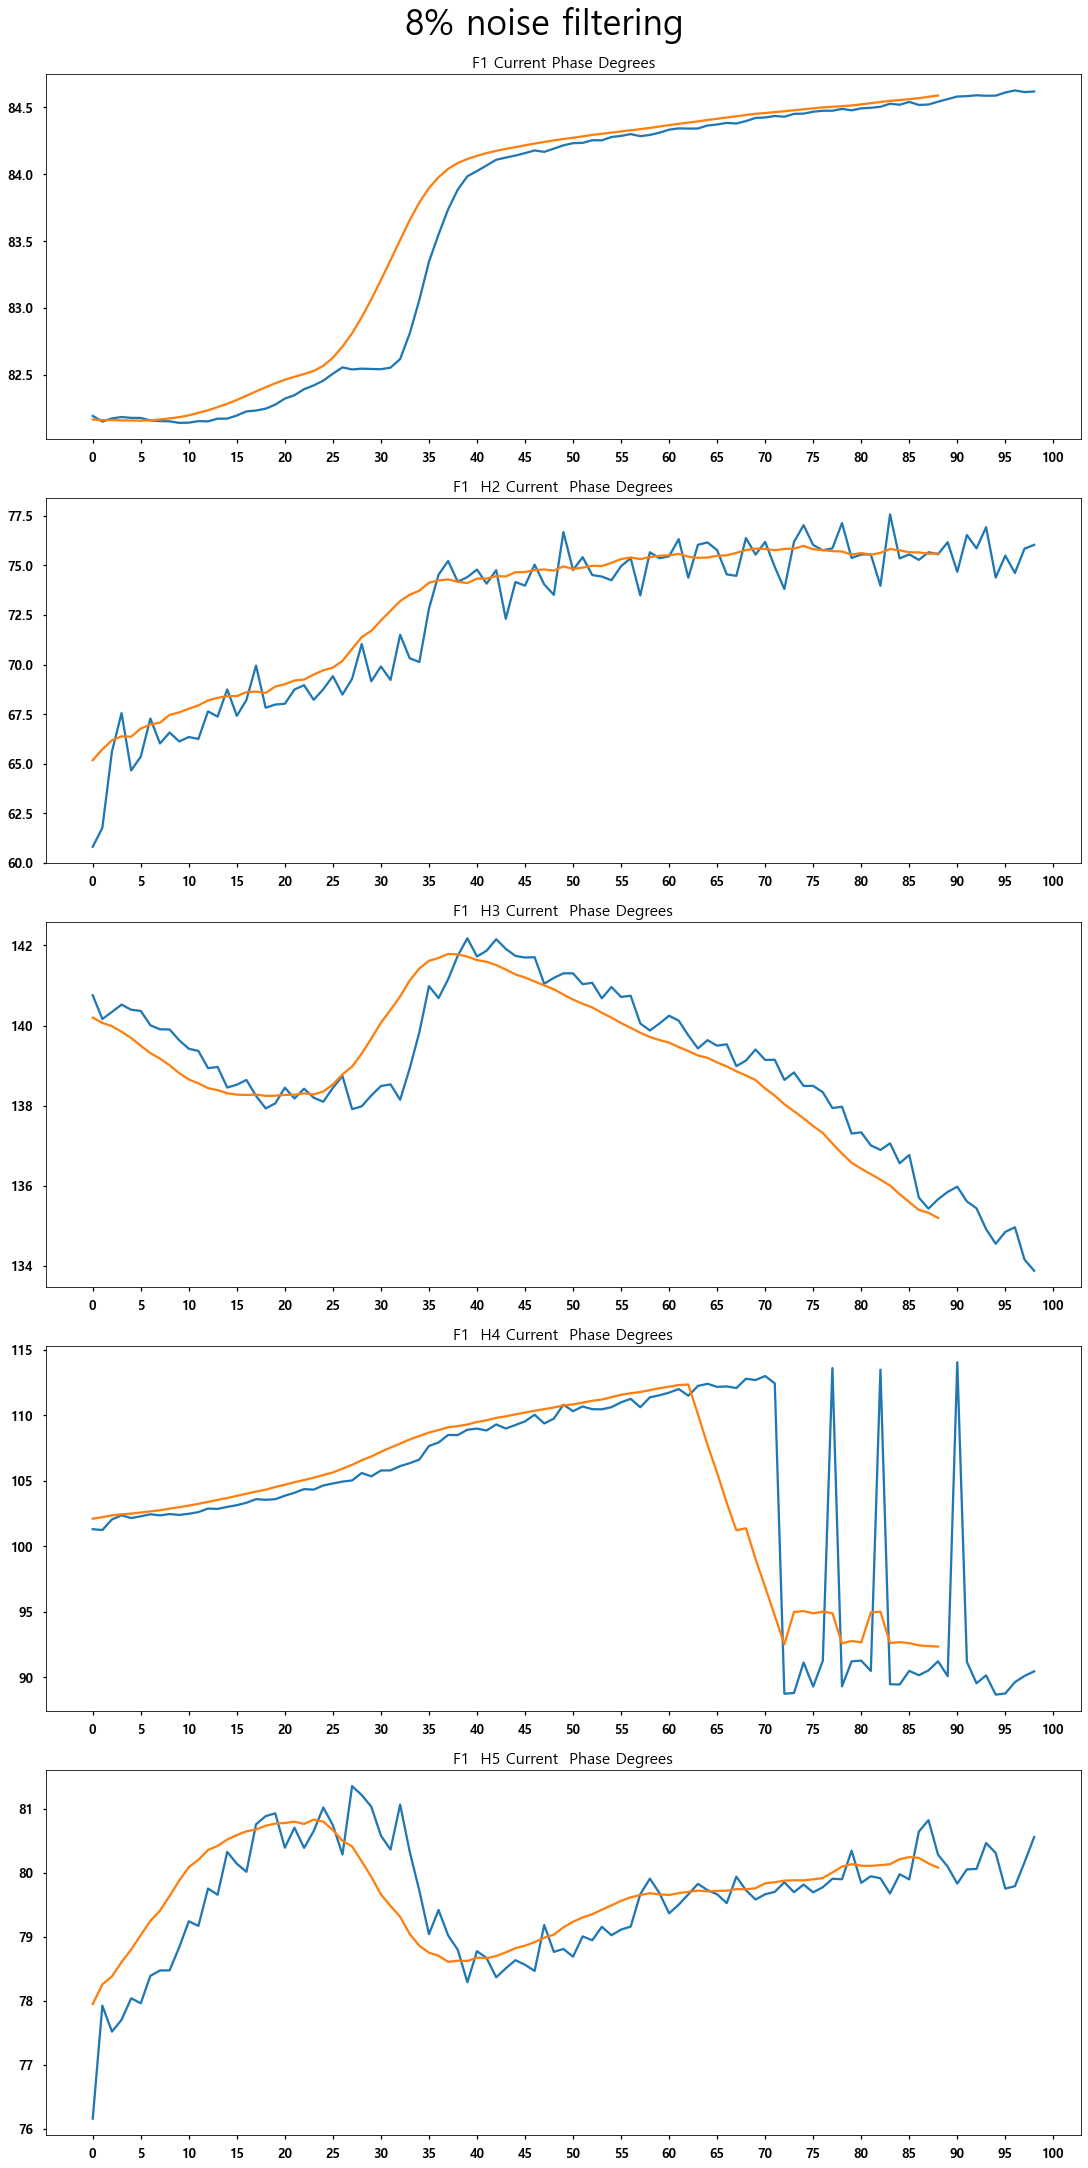

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(current_phase_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(0,N-10), xxxx4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('8% noise filtering',fontsize=35)
plt.show()

## 4%

In [ ]:
f1_4 = mov_average(temp_4, phase_feature)
f2_4 = mov_average(temp_4, impedance_phase_feature)
f3_4 = mov_average(temp_4, impedance_real_ohms_feature)
f4_4 = mov_average(temp_4, current_phase_feature)
# xxxx5 = mov_average(temp_8, phase_feature)

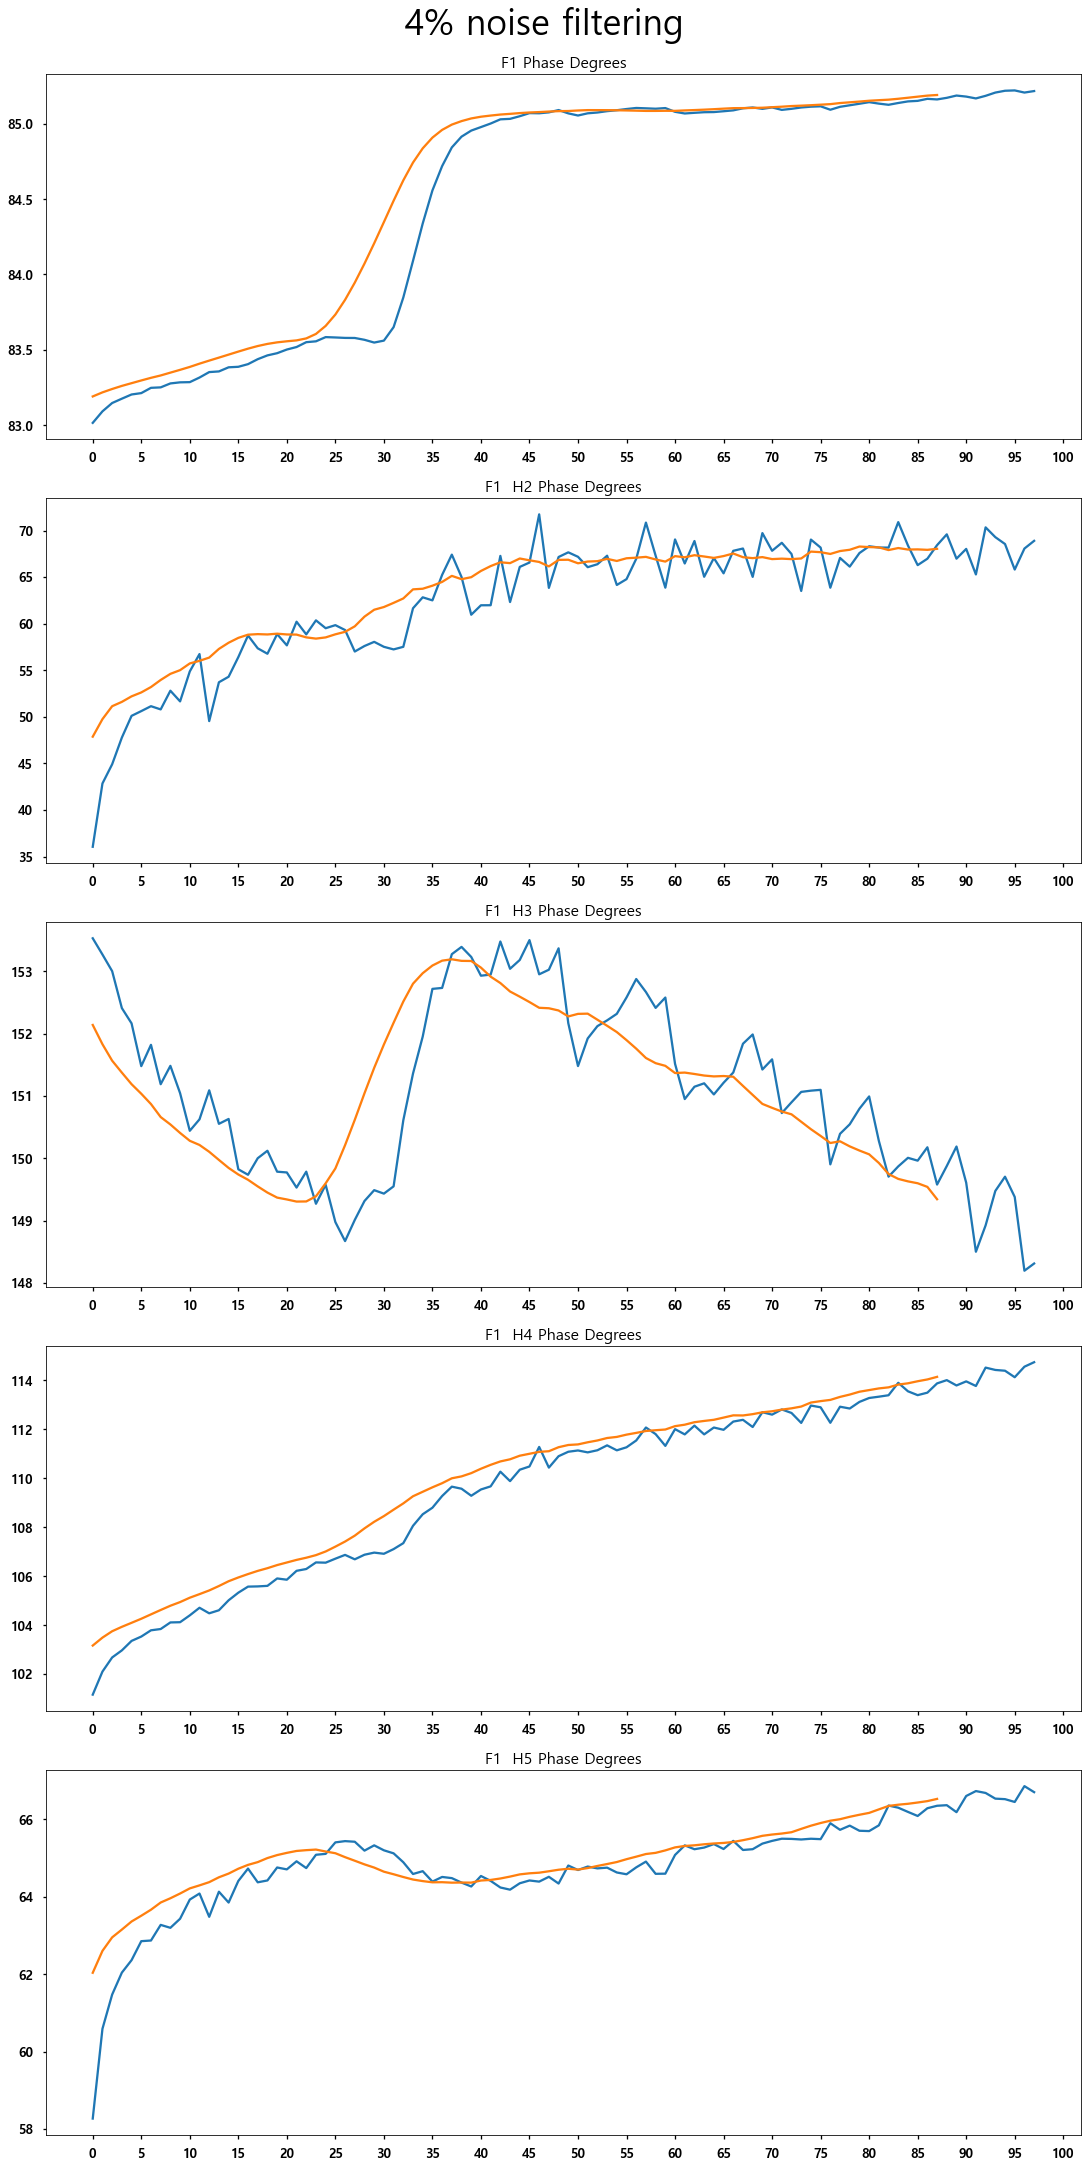

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(0,N-10), f1_4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('4% noise filtering',fontsize=35)
plt.show()


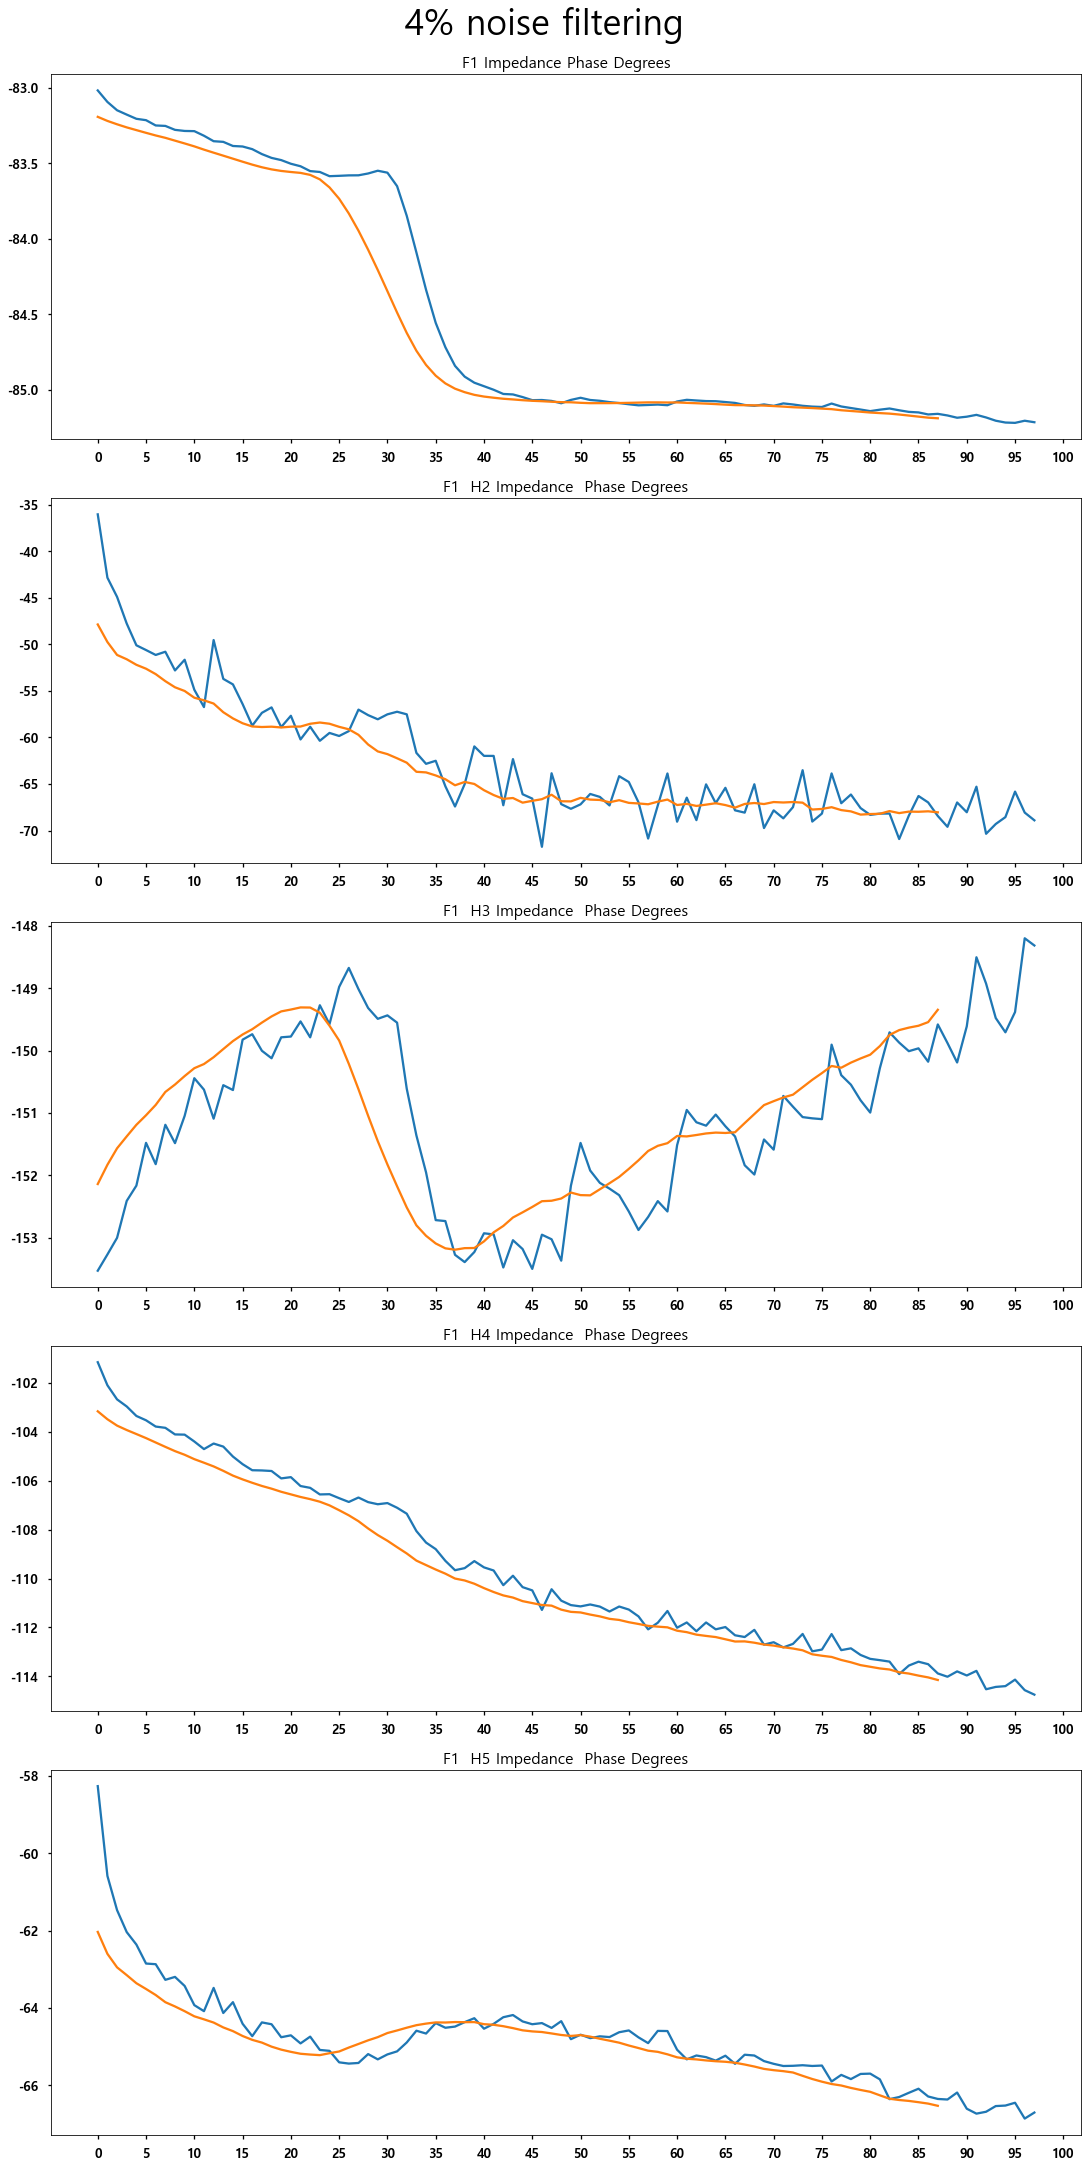

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(impedance_phase_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(0,N-10), f2_4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('4% noise filtering',fontsize=35)
plt.show()

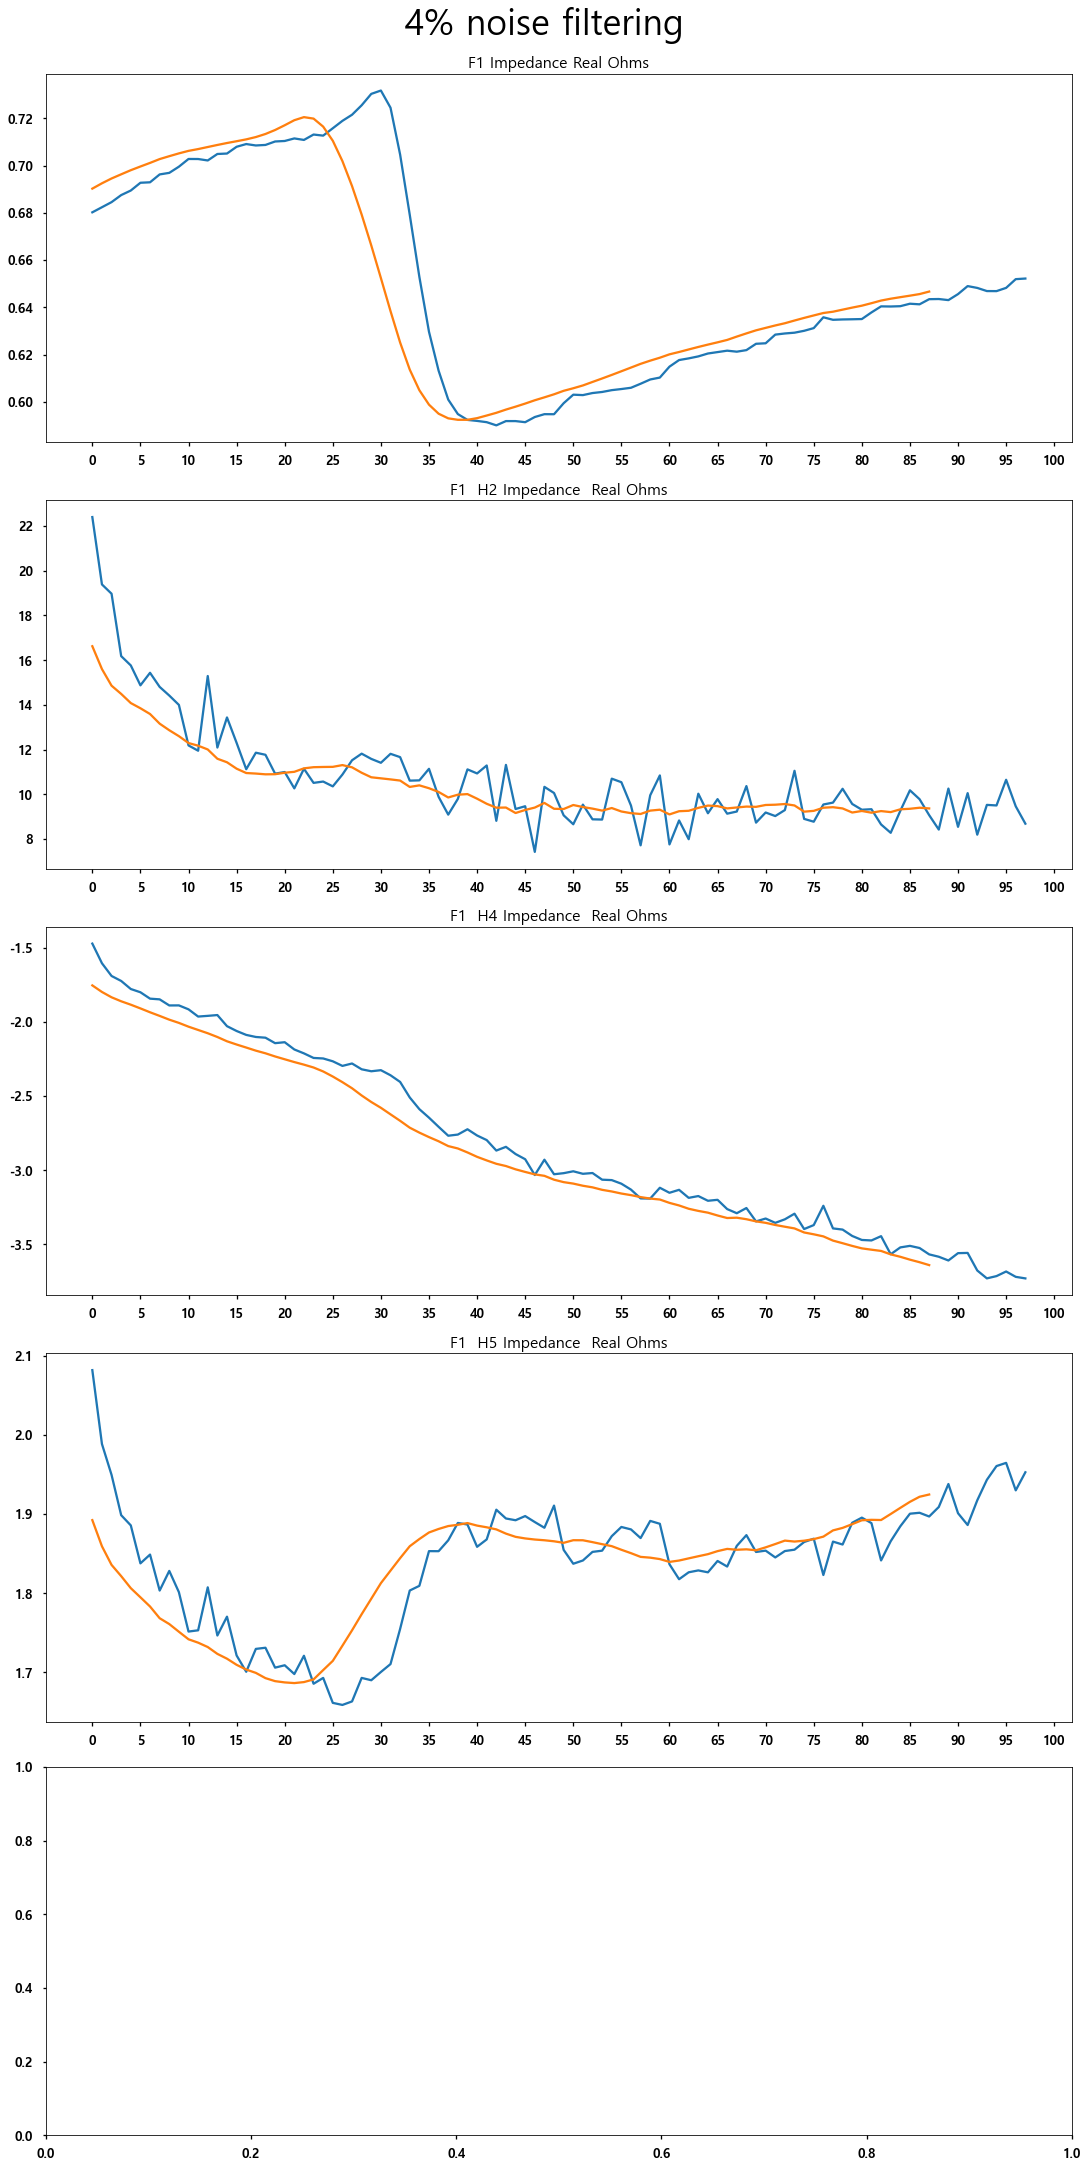

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(impedance_real_ohms_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(0,N-10), f3_4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('4% noise filtering',fontsize=35)
plt.show()

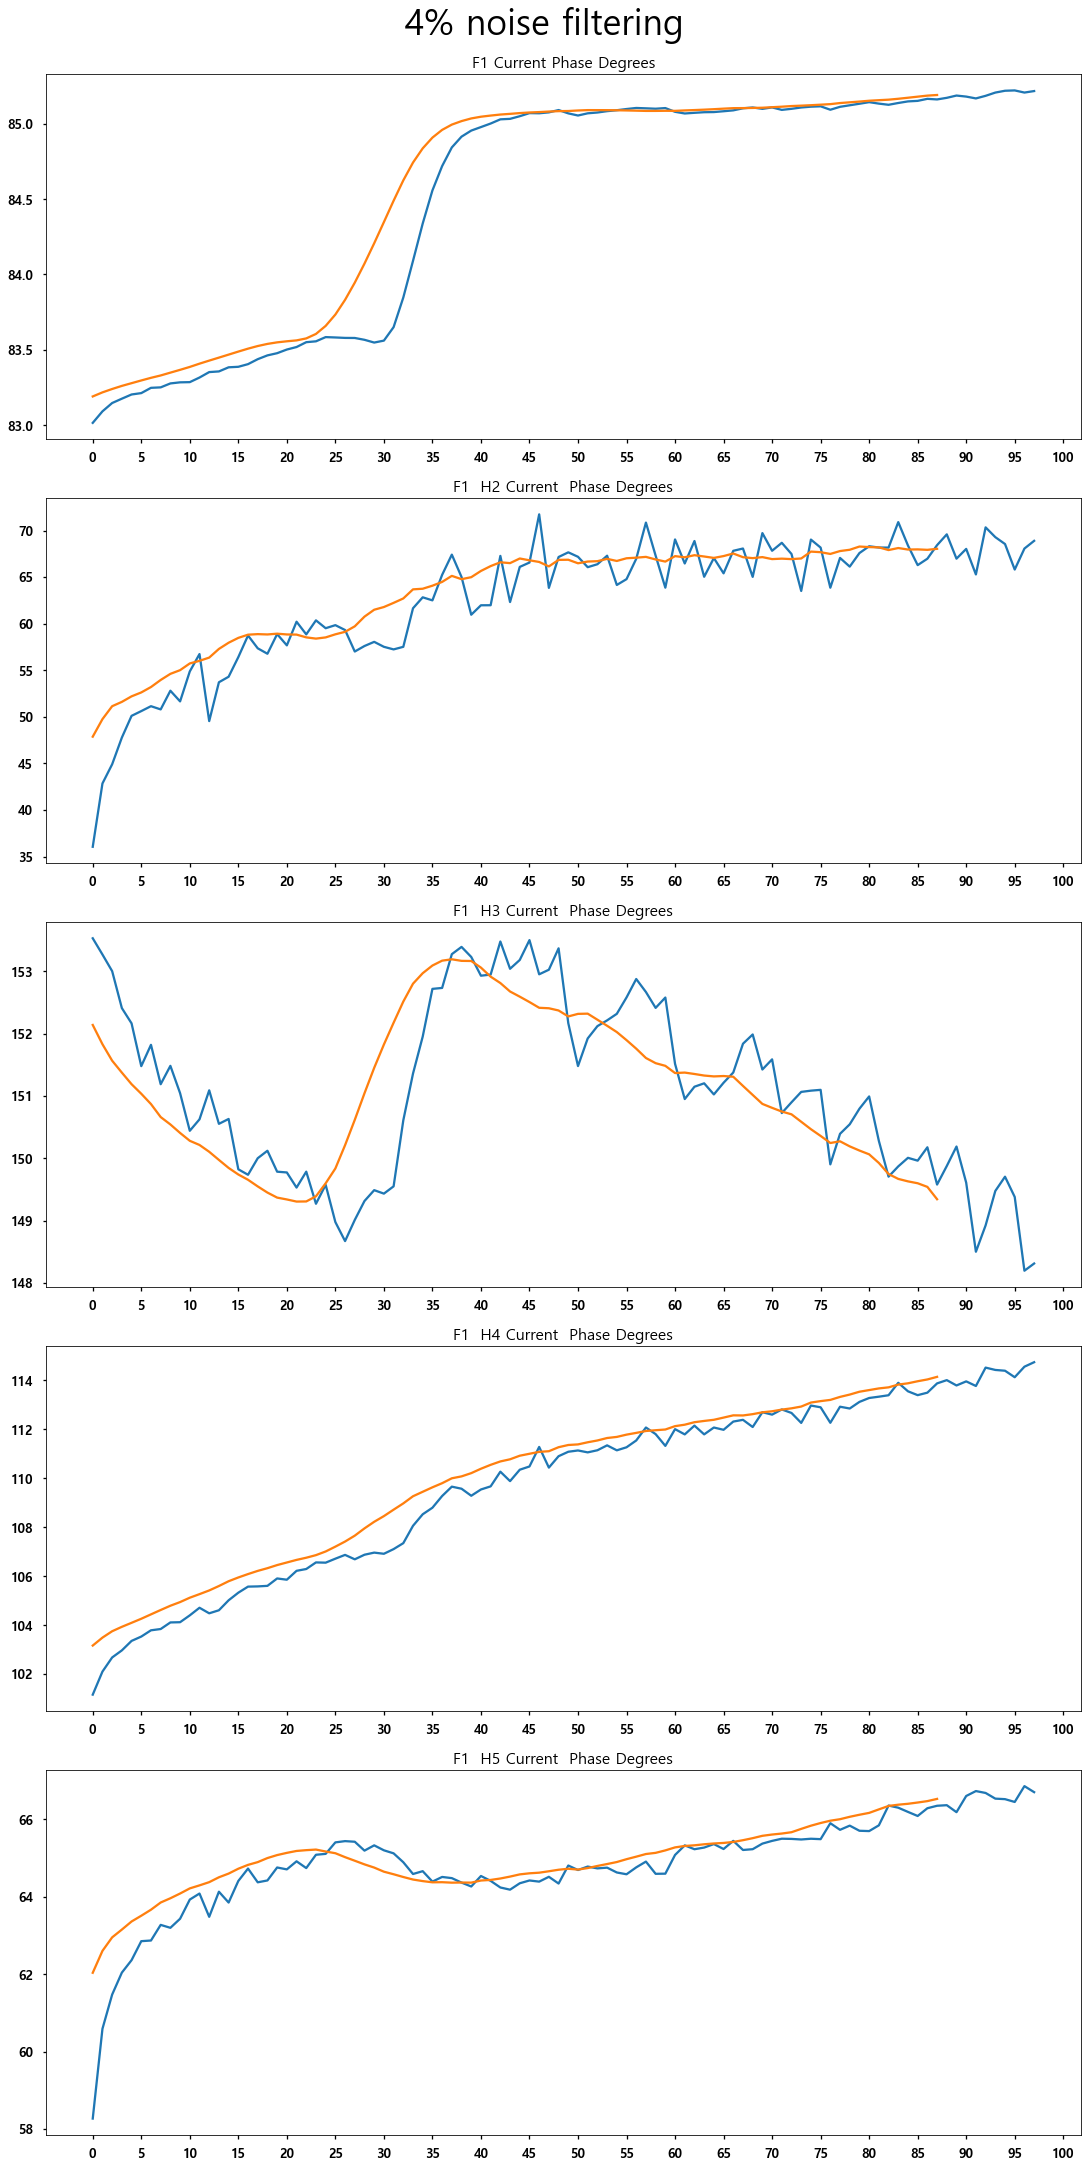

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(current_phase_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(0,N-10), f4_4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('4% noise filtering',fontsize=35)
plt.show()

# 1%

In [ ]:
f1_1 = mov_average(temp_1, phase_feature)
f2_1 = mov_average(temp_1, impedance_phase_feature)
f3_1 = mov_average(temp_1, impedance_real_ohms_feature)
f4_1 = mov_average(temp_1, current_phase_feature)
# xxxx5 = mov_average(temp_8, phase_feature)

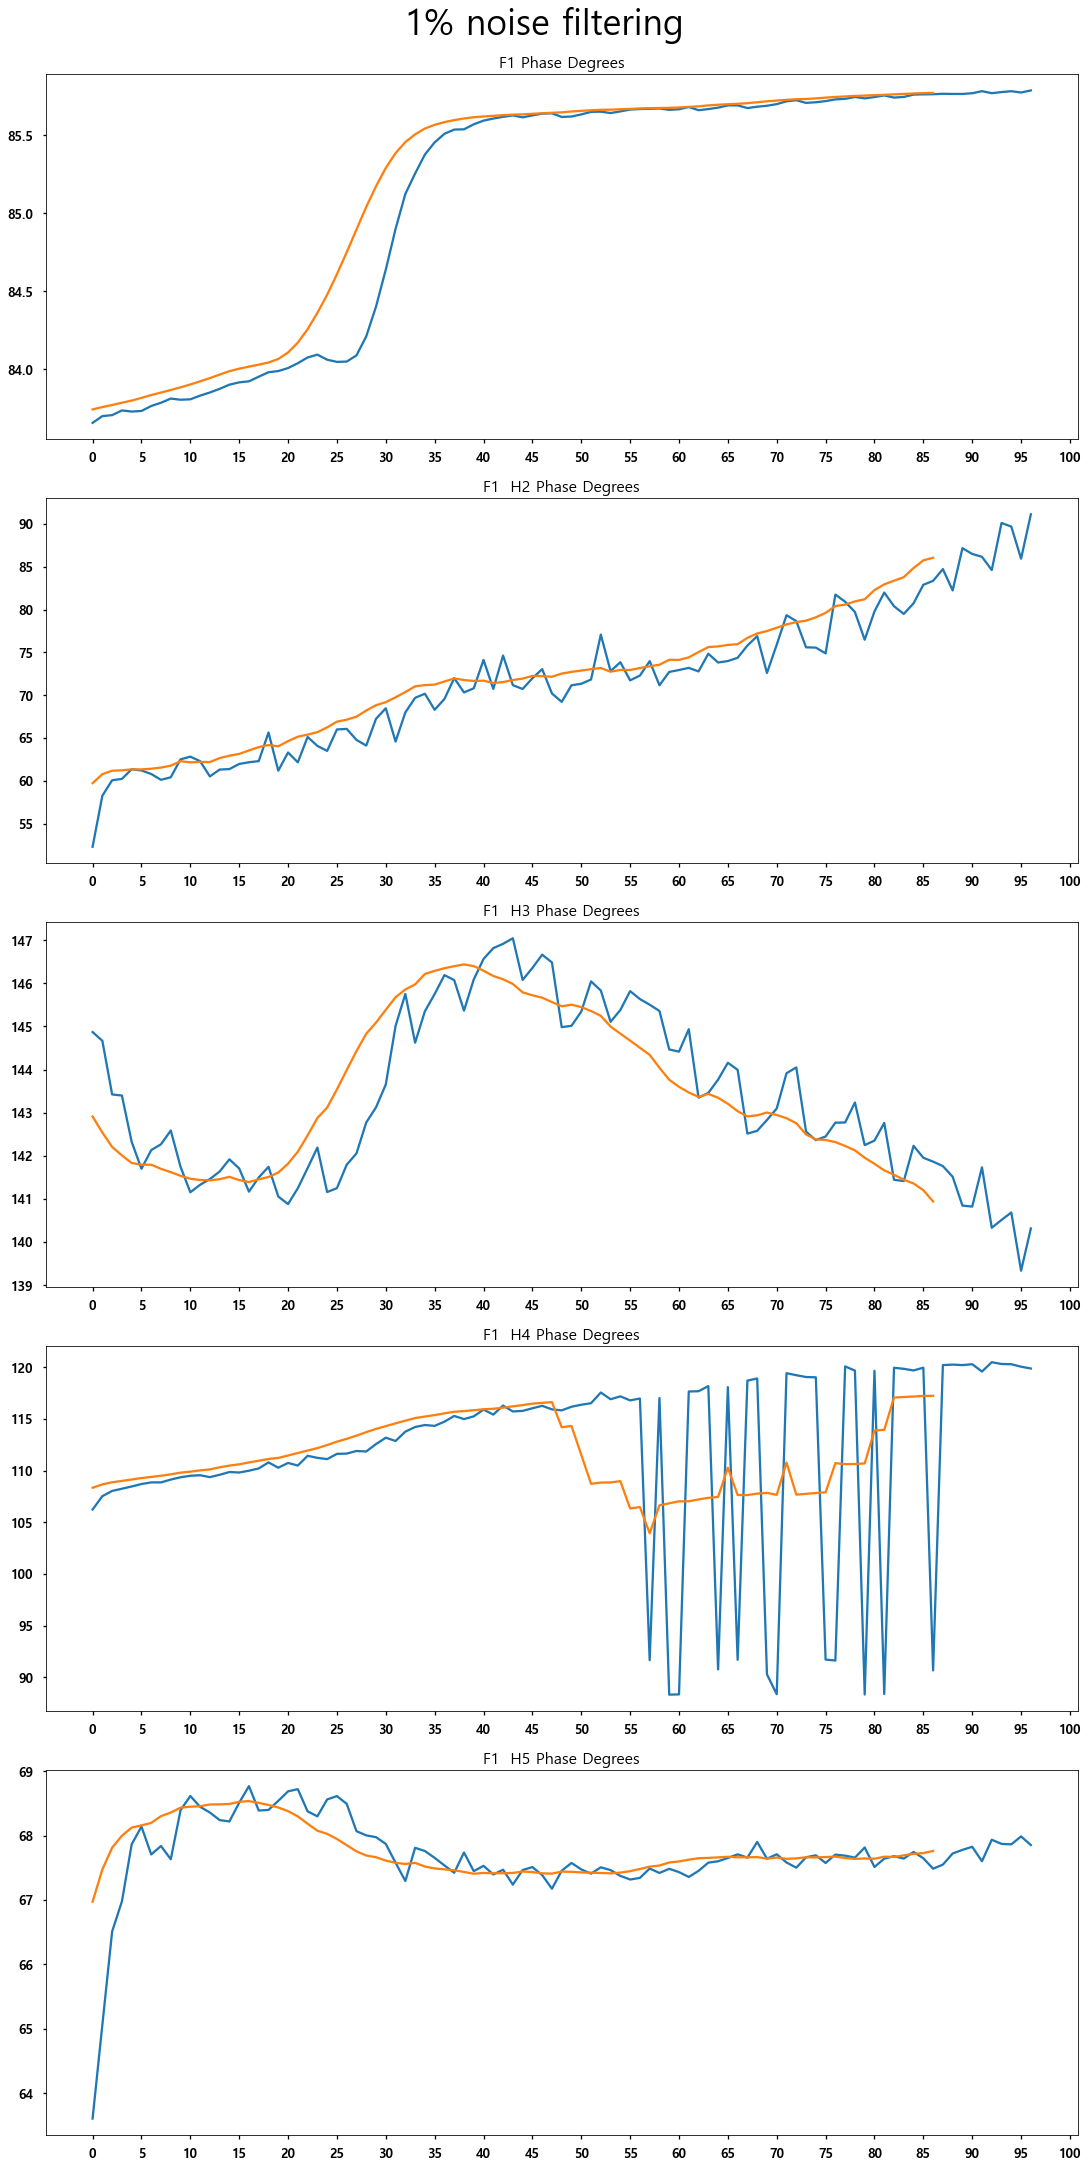

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(0,N-10), f1_1[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('1% noise filtering',fontsize=35)
plt.show()


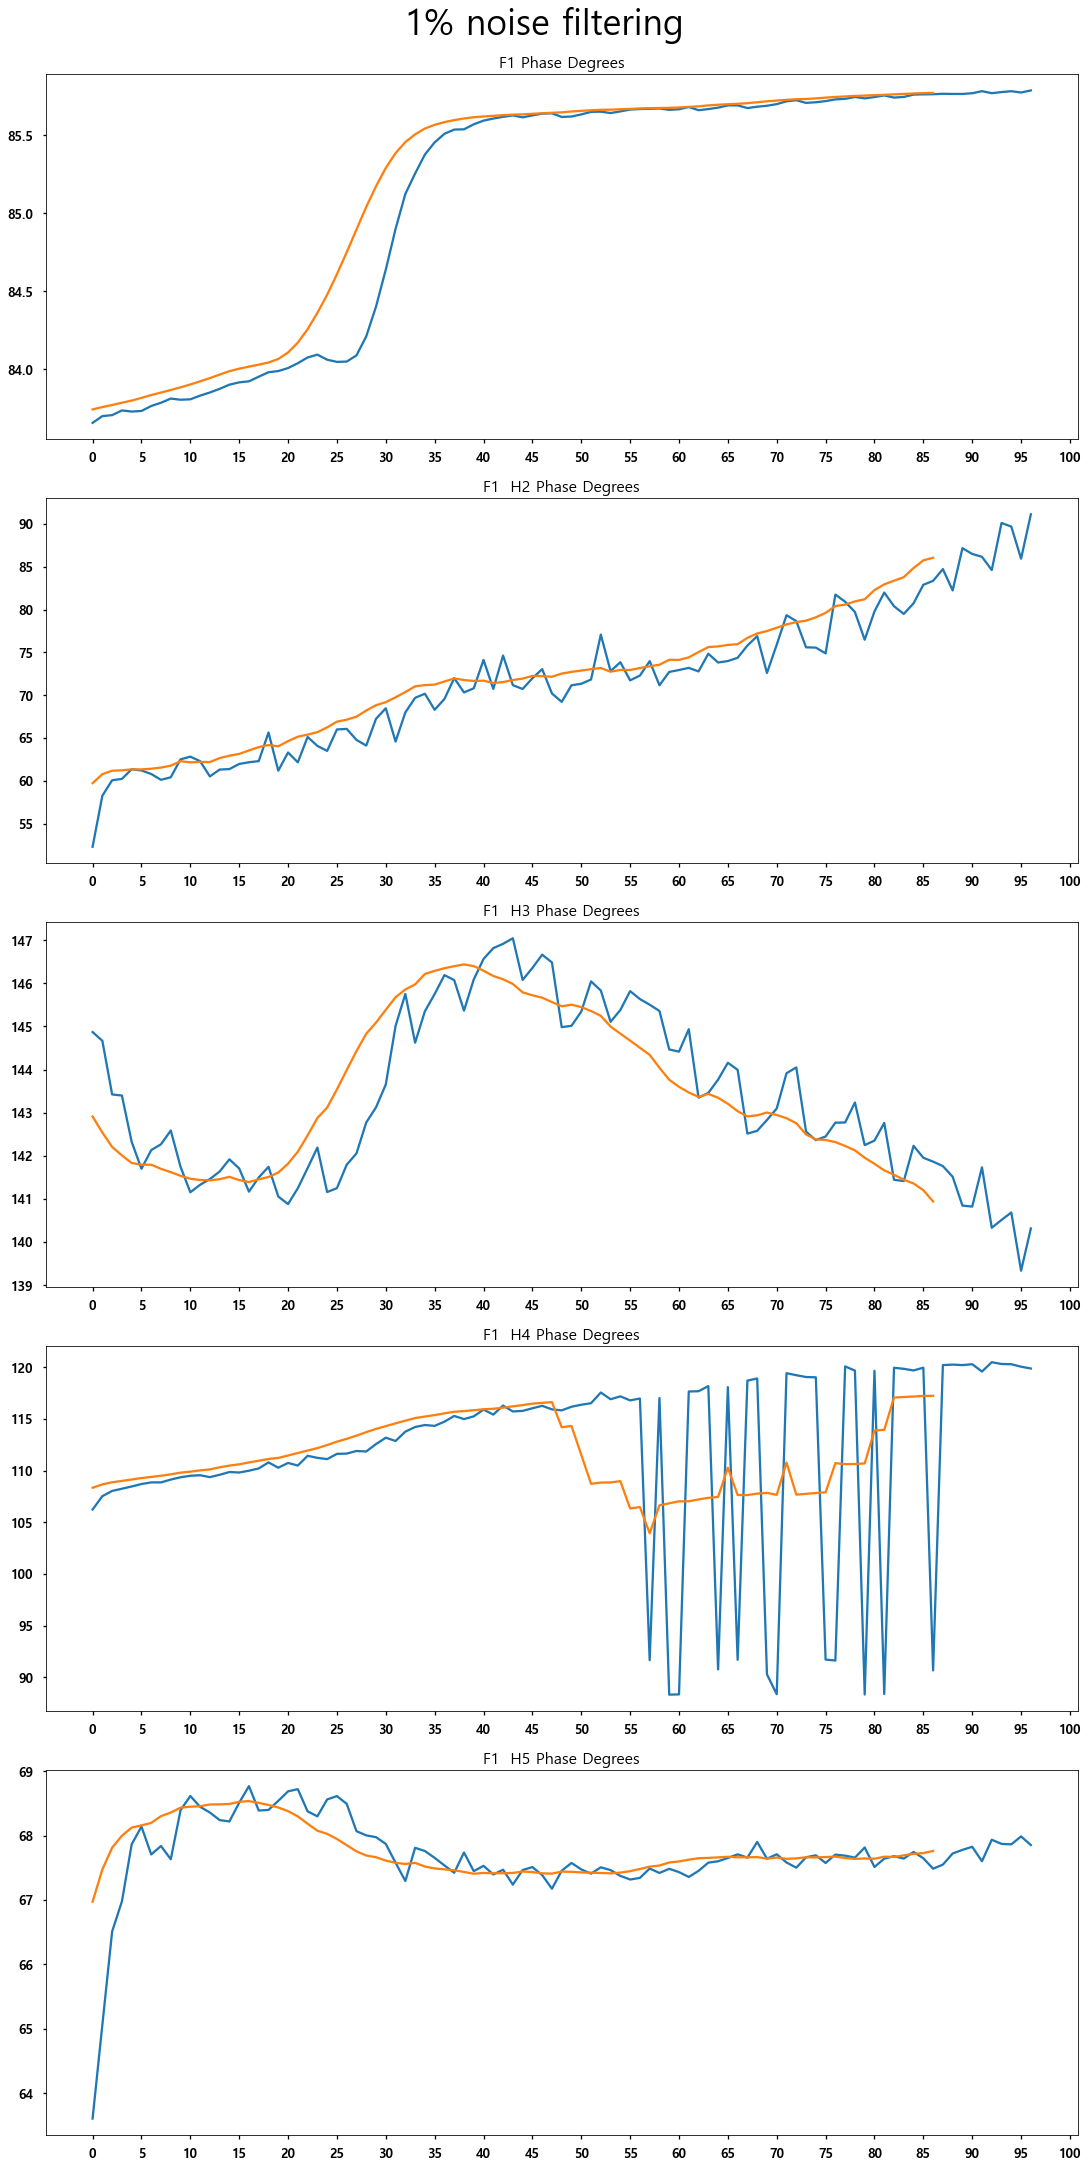

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(0,N-10), f1_1[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('1% noise filtering',fontsize=35)
plt.show()


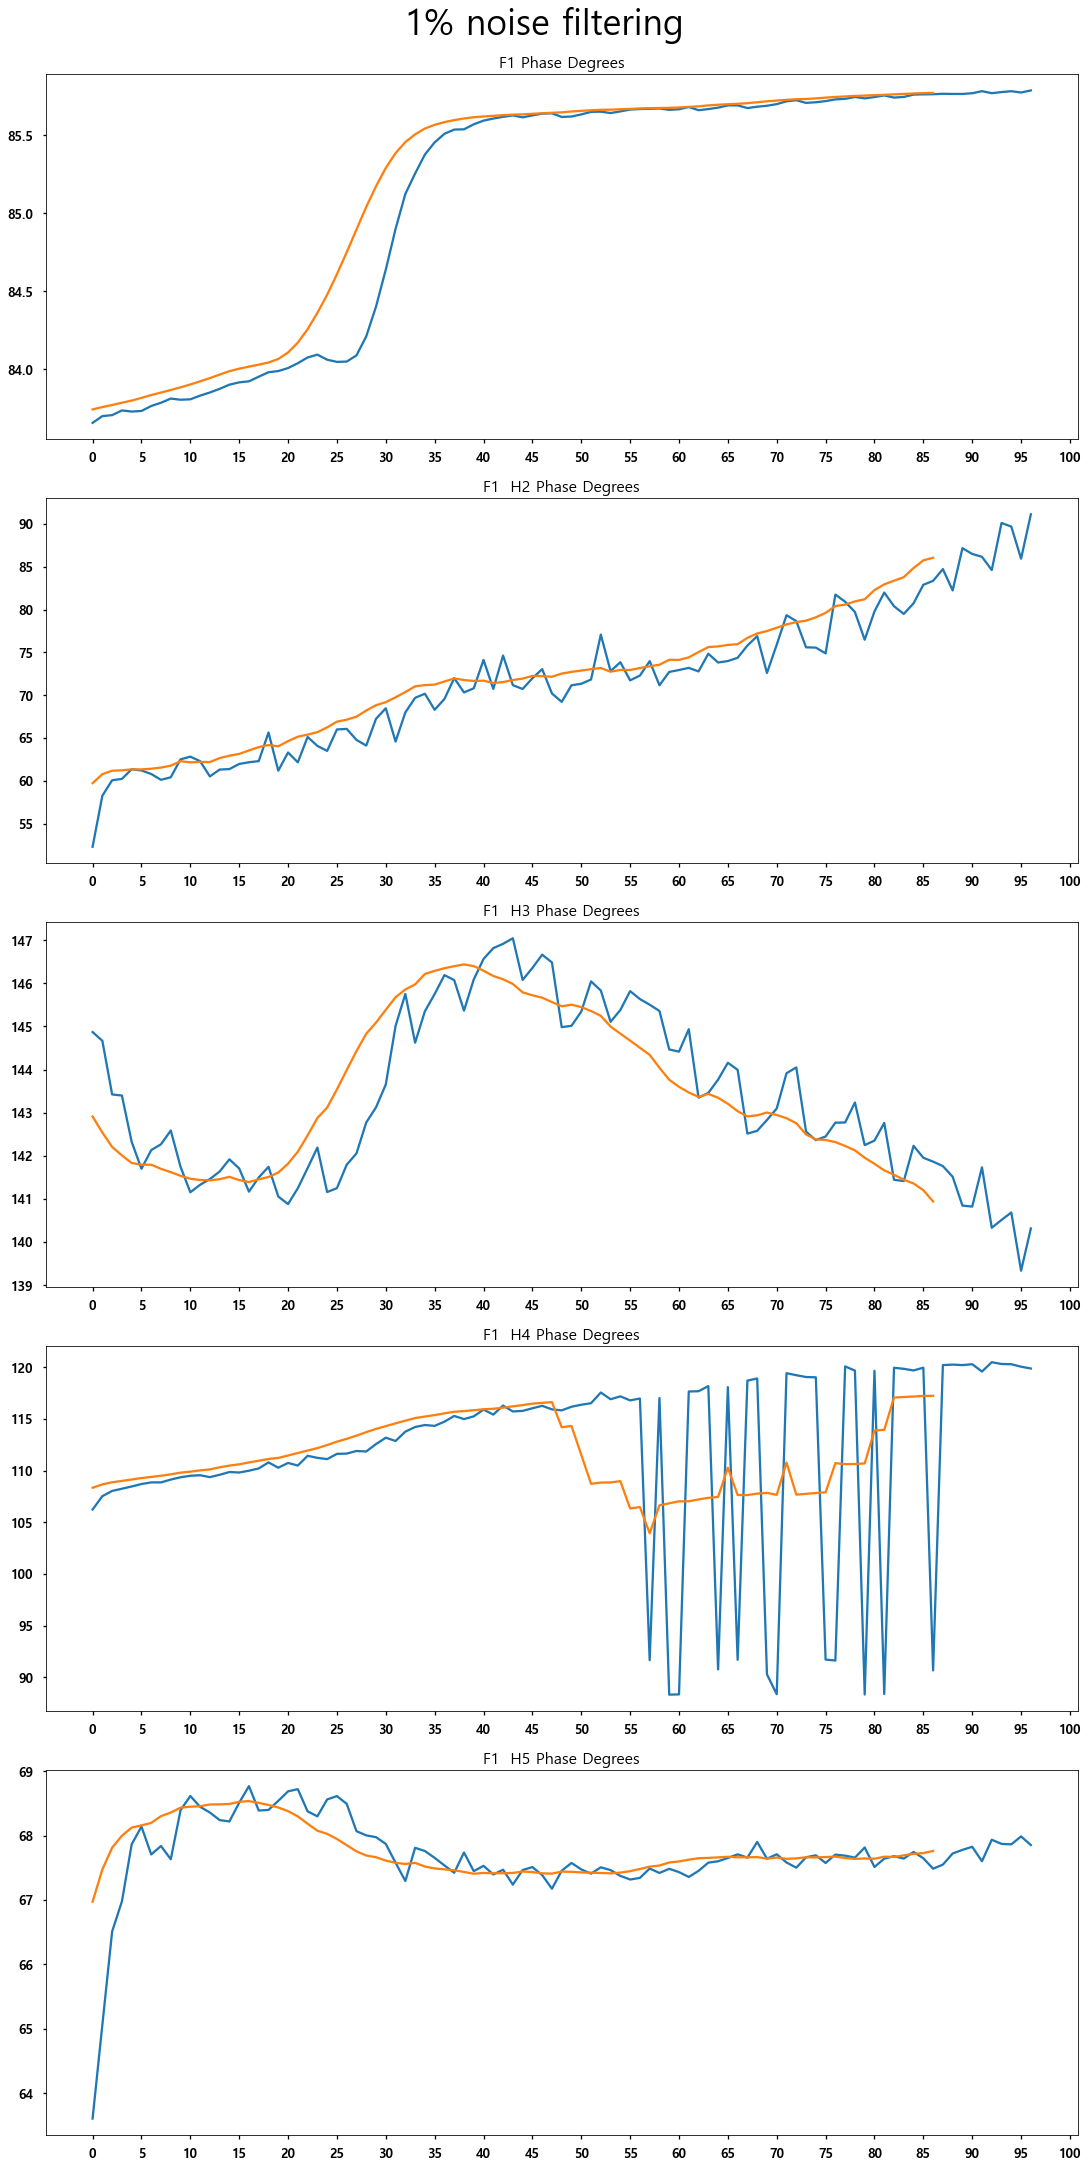

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(0,N-10), f1_1[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('1% noise filtering',fontsize=35)
plt.show()


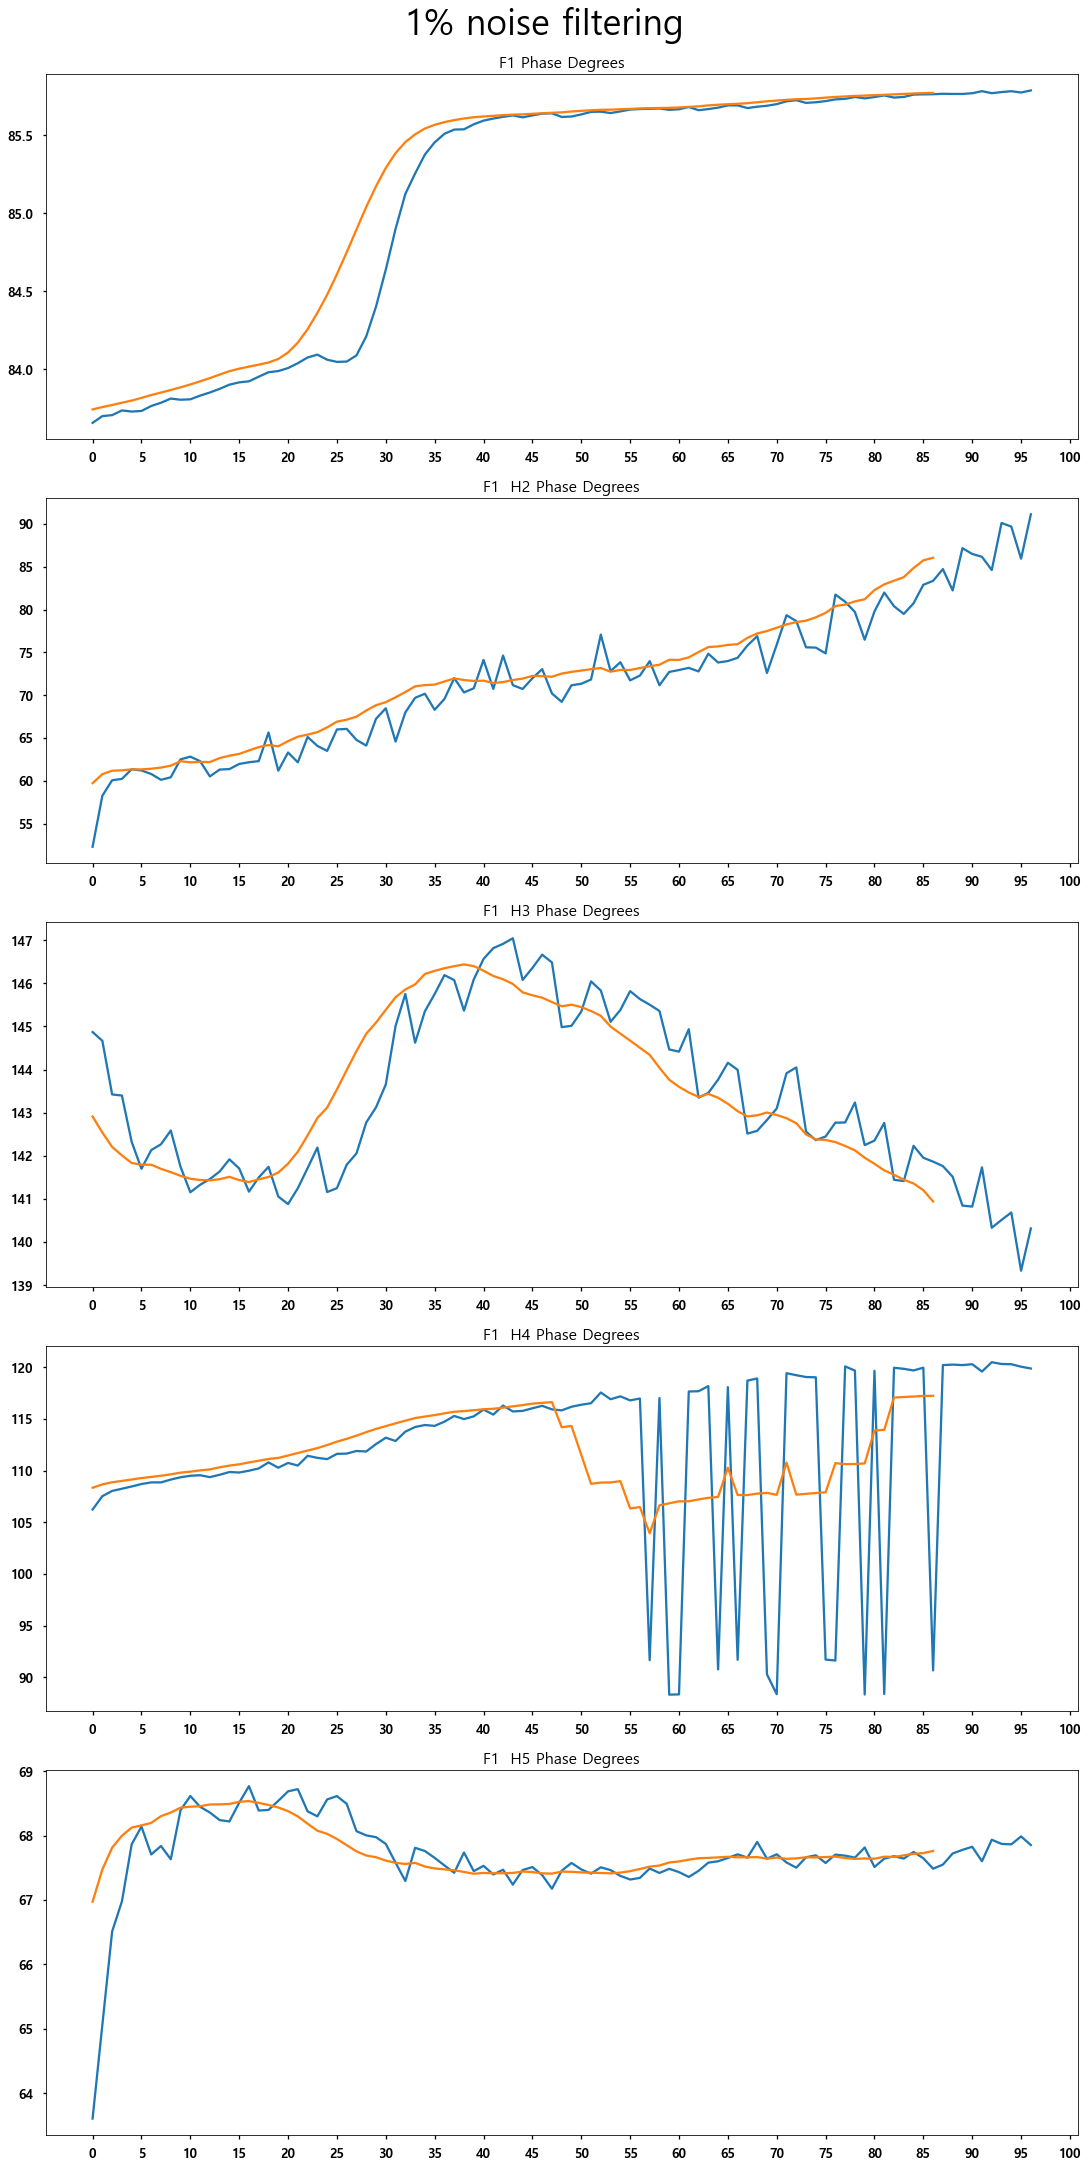

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(0,N-10), f1_1[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('1% noise filtering',fontsize=35)
plt.show()


# "Butterworth filter"
- Butter : low pass filter 같은 butterworth filter 처리 
- filtfilt : filter를 data와 맞춰줌 
- 버터워스 필터는 통과대역에서 최대로 평탄한 주파수 응답을 갖습니다

In [ ]:
'''
phase_feature = ['F1 Phase Degrees','F1  H2 Phase Degrees','F1  H3 Phase Degrees','F1  H4 Phase Degrees','F1  H5 Phase Degrees']
impedance_phase_feature = ['F1 Impedance Phase Degrees','F1  H2 Impedance  Phase Degrees',
                           'F1  H3 Impedance  Phase Degrees','F1  H4 Impedance  Phase Degrees','F1  H5 Impedance  Phase Degrees']
impedance_real_ohms_feature = ['F1 Impedance Real Ohms','F1  H2 Impedance  Real Ohms','F1  H4 Impedance  Real Ohms','F1  H5 Impedance  Real Ohms']
current_phase_feature = ['F1 Current Phase Degrees','F1  H2 Current  Phase Degrees','F1  H3 Current  Phase Degrees',
                         'F1  H4 Current  Phase Degrees','F1  H5 Current  Phase Degrees']
'''

"\nphase_feature = ['F1 Phase Degrees','F1  H2 Phase Degrees','F1  H3 Phase Degrees','F1  H4 Phase Degrees','F1  H5 Phase Degrees']\nimpedance_phase_feature = ['F1 Impedance Phase Degrees','F1  H2 Impedance  Phase Degrees',\n                           'F1  H3 Impedance  Phase Degrees','F1  H4 Impedance  Phase Degrees','F1  H5 Impedance  Phase Degrees']\nimpedance_real_ohms_feature = ['F1 Impedance Real Ohms','F1  H2 Impedance  Real Ohms','F1  H4 Impedance  Real Ohms','F1  H5 Impedance  Real Ohms']\ncurrent_phase_feature = ['F1 Current Phase Degrees','F1  H2 Current  Phase Degrees','F1  H3 Current  Phase Degrees',\n                         'F1  H4 Current  Phase Degrees','F1  H5 Current  Phase Degrees']\n"

In [ ]:
N = 2 # Filter order 필터의 순서입니다

'''
간단히 말해서 필터의 차수는 필터 회로에 사용되는 최대 지연 요소 수를 의미합니다.
이것은 차분 방정식을 관찰하고 어떤 샘플에서 최대 지연이 발생하는지 알아내면 쉽게 관찰할 수 있습니다.
'''
Wn = 0.3 # Cutoff frequency 임계 주파수 또는 주파수 저역통과 및 고역통과 필터의 경우 Wn은 스칼라

B, A = signal.butter(N, Wn, output='ba')

In [ ]:
def Butterfilter(df, features):
    temp_df = pd.DataFrame()
    for item in features:
        zxcv = np.array(df[item])
        zxcv = zxcv.astype(np.float32)
        
        tempf = signal.filtfilt(B,A,zxcv)
        temp_df[item] = tempf
    return temp_df

In [ ]:
Bf1_8 = Butterfilter(temp_8, phase_feature)
Bf2_8 = Butterfilter(temp_8, impedance_phase_feature)
Bf3_8 = Butterfilter(temp_8, impedance_real_ohms_feature)
Bf4_8 = Butterfilter(temp_8, current_phase_feature)

In [ ]:
Bf1_8['Time time unit'] = temp_8['Time time unit']

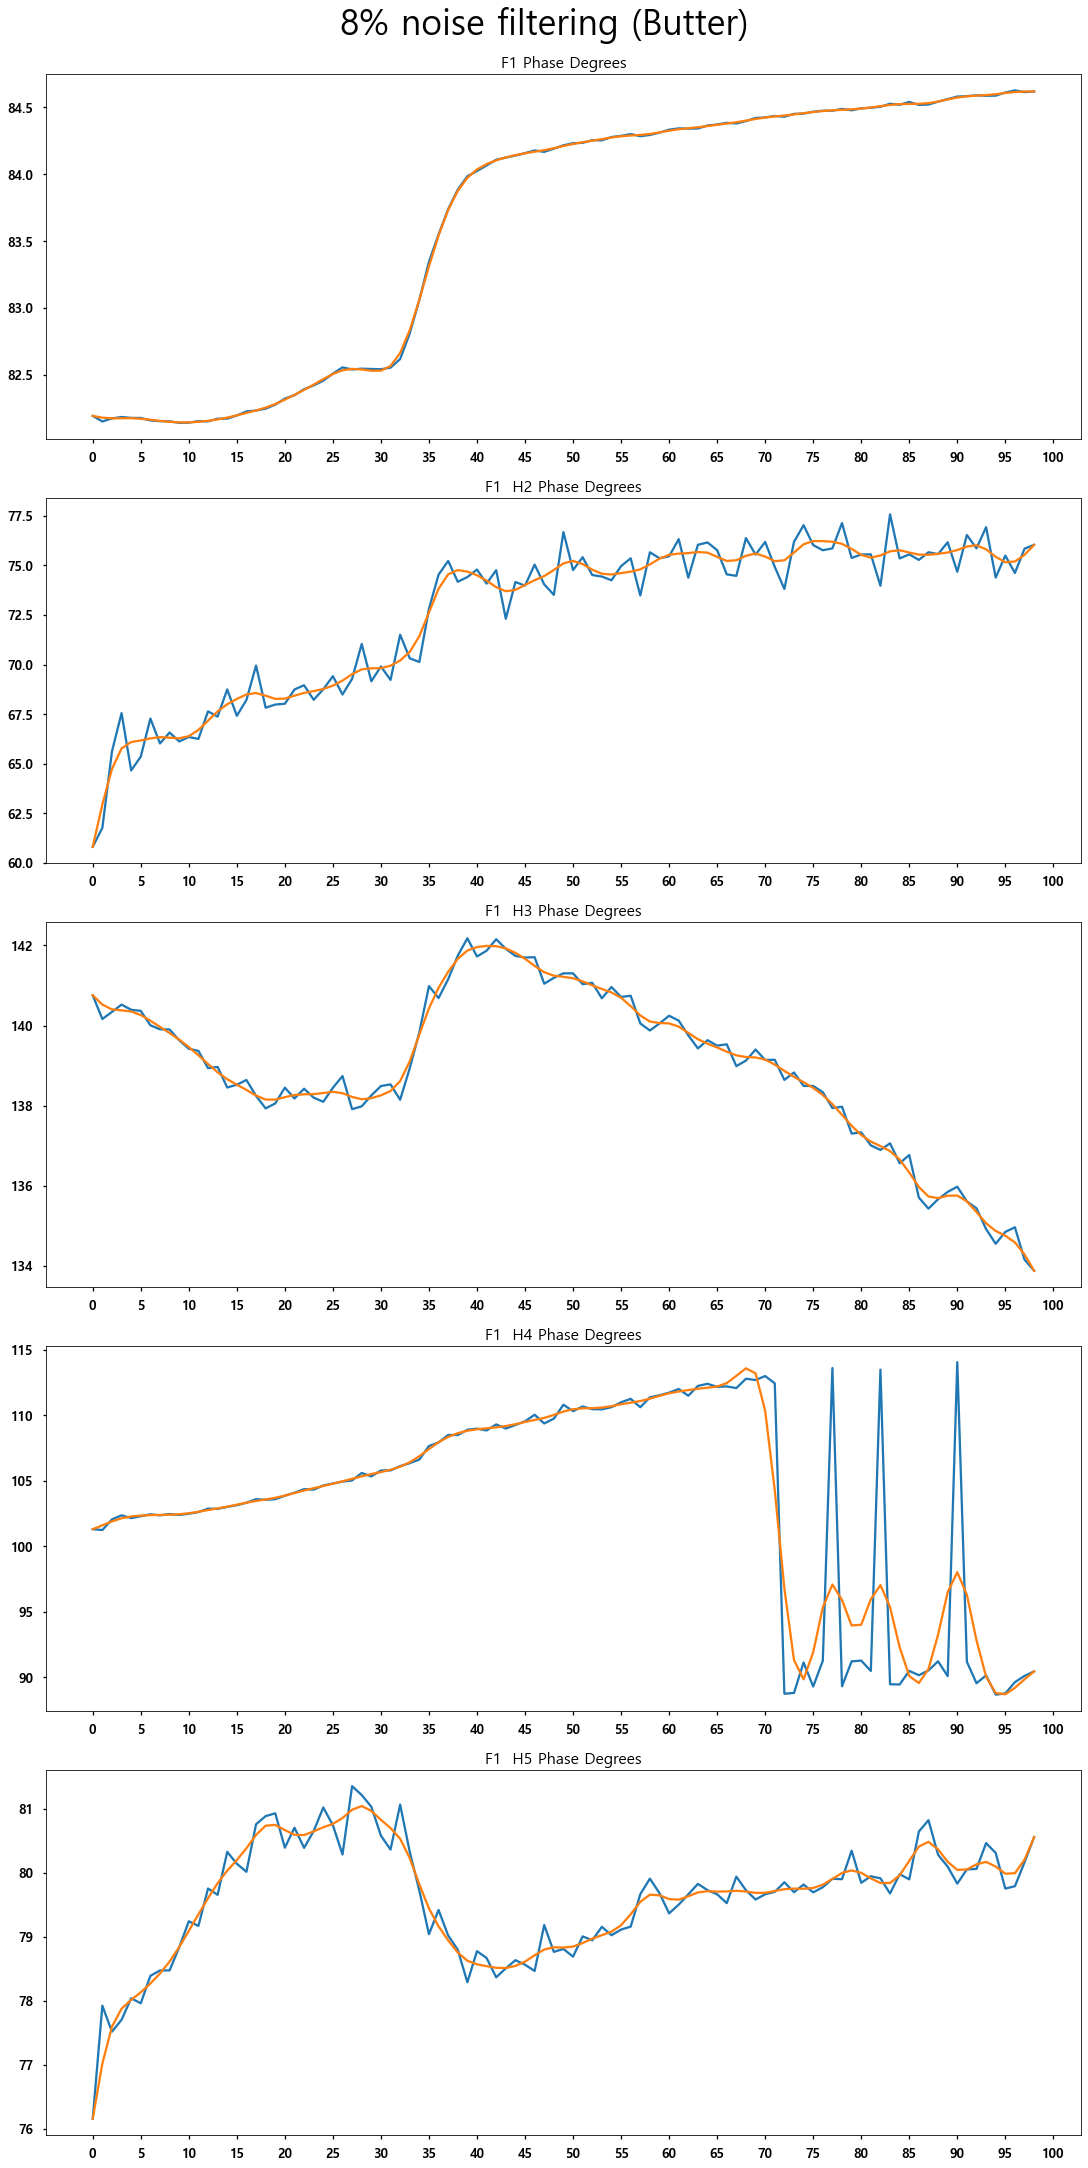

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(15,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(0,N), Bf1_8[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.suptitle('8% noise filtering (Butter)',fontsize=35)
plt.show()


#### 필터는 크게 4가지로 구분
1. LPF(Low-Pass Filter) : 저역 통과 필터
2. HPF(High-Pass FIlter) : 고역 통과 필터
3. BPF(Band-Pass Filter) : 대역 통과 필터
4. BSF(Band-Stop filter): 대역 저지 필터

---
<br>
- 이중에도 BPF가 주로 이용 된다. => 원하는 주파수 대역만 정확하게 골라내는 역할

## 메디언 필터 (median Filter)
- 입력 신호의 값들을 오름 또는 ㄴ림 차순으로 정렬하여 중앙값으로 대체하는 방식의 필터
- 임펄스 잡음을 효과적으로제거하는 능력

In [ ]:
temp_8

Time time unit  Frequency 1 MHz  F1 Power Watts  F1 Forward Power Watts  \
10           10.001        12.558993      174.697890             3298.350330   
11           11.001        12.559097      178.048947             3329.794701   
12           12.003        12.559601      177.974583             3326.914814   
13           13.000        12.558635      178.061811             3325.895461   
14           14.001        12.558829      178.394226             3323.507558   
..              ...              ...             ...                     ...   
104         104.000        12.559407      173.913579             3273.020455   
105         105.000        12.559043      173.295789             3266.091483   
106         106.001        12.559539      172.882317             3258.959114   
107         107.004        12.558925      174.274420             3267.581862   
108         107.999        12.017233      152.341072             2850.665449   

     F1 Reflected Power Watts  F1 Standing Wave Ratio   F1 Voltage Volts  \
10                3123.652440                73.507636         80.672874   
11                3151.745754                72.792539         81.412659   
12                3148.940231                72.759064         81.655769   
13                3147.833650                72.699524         81.820724   
14                3145.113332                72.506727         81.939430   
..                        ...                      ...               ...   
104               3099.106876                73.265590        116.713280   
105               3092.795694                73.374042        116.930832   
106               3086.076797                73.389323        117.122810   
107               3093.307442                72.984841        117.652832   
108               2698.324377                72.835828        110.215958   

     F1 Current Amps  F1 Phase Degrees  F1 Harmonic Phase Degrees  ...  \
10         15.946061         82.194992                          0  ...   
11         16.019064         82.153221                          0  ...   
12         16.011469         82.176285                          0  ...   
13         16.008476         82.186836                          0  ...   
14         16.001850         82.180313                          0  ...   
..               ...               ...                        ...  ...   
104        15.793552         84.586197                          0  ...   
105        15.776133         84.609589                          0  ...   
106        15.757993         84.625130                          0  ...   
107        15.776524         84.612556                          0  ...   
108        14.734333         84.617256                          0  ...   

     F2 Impedance Real Ohms  F2 Impedance Imaginary Ohms  \
10                        0                            0   
11                        0                            0   
12                        0                            0   
13                        0                            0   
14                        0                            0   
..                      ...                          ...   
104                       0                            0   
105                       0                            0   
106                       0                            0   
107                       0                            0   
108                       0                            0   

     F2 Current Magnitude Amps  F2 Current Phase Degrees  \
10                           0                         0   
11                           0                         0   
12                           0                         0   
13                           0                         0   
14                           0                         0   
..                         ...                       ...   
104                          0                         0   
105                          0           

In [ ]:
phase_feature

['F1 Phase Degrees',
 'F1  H2 Phase Degrees',
 'F1  H3 Phase Degrees',
 'F1  H4 Phase Degrees',
 'F1  H5 Phase Degrees']

In [ ]:
# ex m 의 값을 7로 => 7개
# 초기 7개의 점은 그대로 출력하고 그다음부터 median으로??
def median_filter(df, featuers):
    pass

In [ ]:
empty_list = []
temp_df = pd.DataFrame()
# for item in phase_feature:
#     print(item)
    

In [ ]:
for i in range(0, len(temp_8)):
    if i<7:
        value = temp_8['F1  H2 Phase Degrees'].iloc[0:i].median()
        empty_list.append(value)
    else:
        value = temp_8['F1  H2 Phase Degrees'].iloc[i-7:i].median()
        empty_list.append(value)
temp_df['F1  H2 Phase Degrees'] = empty_list

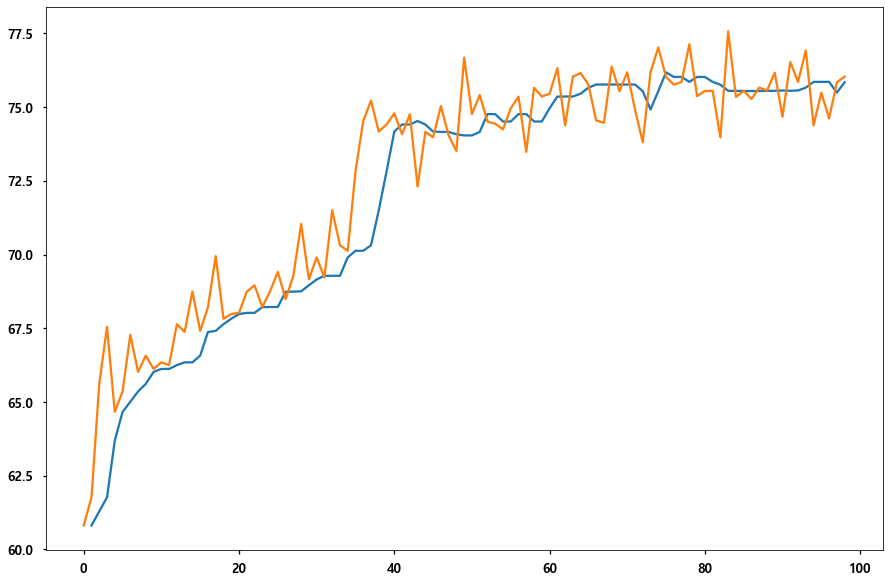

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(0,N),temp_df['F1  H2 Phase Degrees'])
plt.plot(range(0,N),temp_8['F1  H2 Phase Degrees'])

# Min/Max averager filter
- 극단적인 임펄스 값을 제거하는데 사용
- 혼합된 임펄스 잡음을 제거하기는 어려움

In [ ]:
empty_list = []
temp_df = pd.DataFrame()
# for item in phase_feature:
#     print(item)

In [ ]:
np.mean(1+10)

11.0

In [ ]:
for i in range(0, len(temp_8)):
    if i<7:
        value = temp_8['F1  H2 Phase Degrees'].iloc[0:i].mean()
        empty_list.append(value)
    else:
        value_min = temp_8['F1  H2 Phase Degrees'].iloc[i-7:i].min()
        value_max = temp_8['F1  H2 Phase Degrees'].iloc[i-7:i].max()
        value_average = (value_min + value_max) / 2
        empty_list.append(value_average)
temp_df['F1  H2 Phase Degrees'] = empty_list

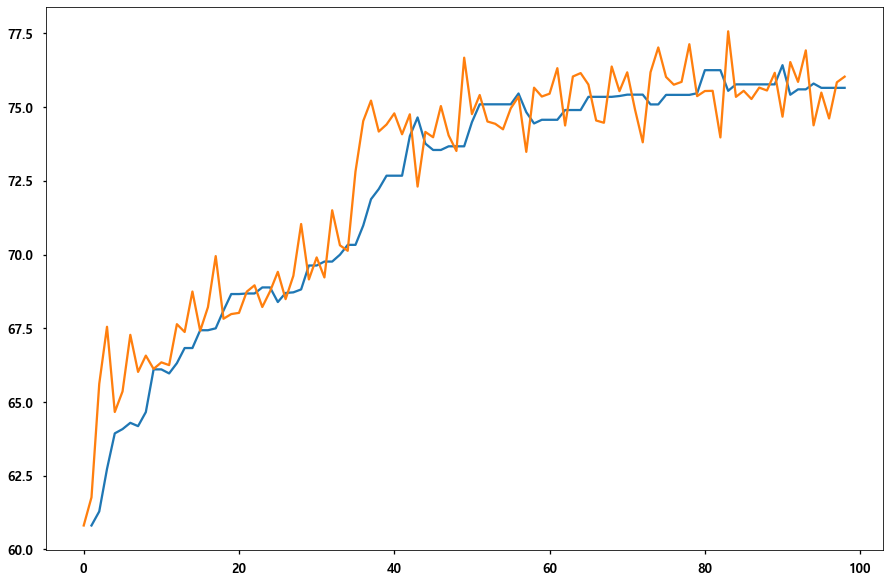

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(0,N),temp_df['F1  H2 Phase Degrees'])
plt.plot(range(0,N),temp_8['F1  H2 Phase Degrees'])

# 알파 트림드 평균 필터
- 입력 신호의 값들을 sort 한 후에 지정해준 a 크기에 따라 정렬된 신호의 양쪽을 자르고 나머지 가운데 값들의 평균값을 출력
- a가 최소일때는 평균값 필터, 최대일때는 메디언 필터처럼 동작

In [ ]:
empty_list = []
temp_df = pd.DataFrame()
# for item in phase_feature:
#     print(item)

In [ ]:
a = 2
for i in range(0, len(temp_8)):
    if i<7:
        value = temp_8['F1  H2 Phase Degrees'].iloc[0:i].mean()
        empty_list.append(value)
    else:
        value = temp_8['F1  H2 Phase Degrees'].iloc[(i-7)+a:i-a].mean()
#         value_average = (value_min + value_max) / 2
        empty_list.append(value)
temp_df['F1  H2 Phase Degrees'] = empty_list

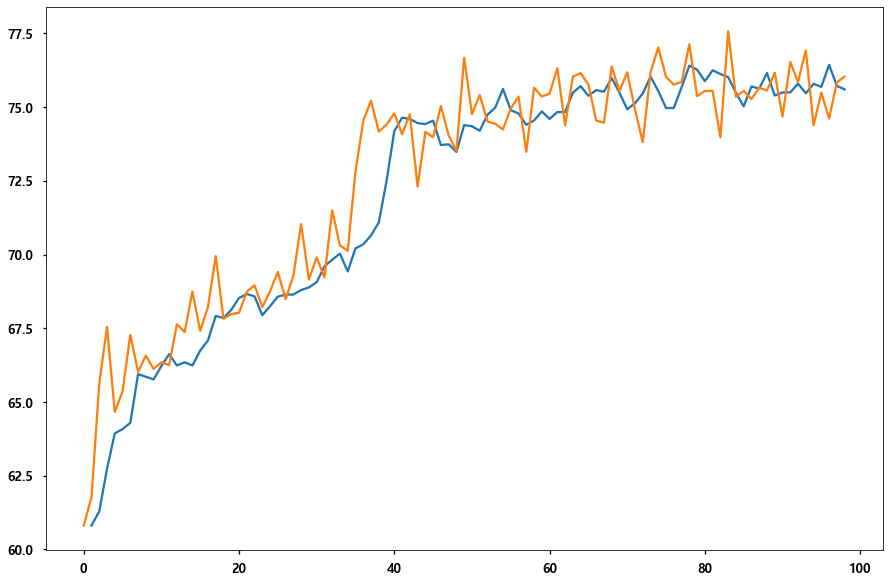

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(0,N),temp_df['F1  H2 Phase Degrees'])
plt.plot(range(0,N),temp_8['F1  H2 Phase Degrees'])

#  가우시안 필터
- 평균을 중심으로 좌우 대칭의 종모양 형태를 가우시안 분포라고함.
- 정규분포, 확률분포에 의해 생성된 잡음을 제거

- 가우스 필터에서 시그마의 역할은 평균값 주변의 변동을 제어하는 ​​것|

In [ ]:
from scipy.ndimage import gaussian_filter, 

In [ ]:
aa = np.array(temp_8['F1  H2 Phase Degrees'])
aa.shape

(99,)

In [ ]:
aaa = gaussian_filter(aa, sigma=1)

In [ ]:
aa

array([60.81209183, 61.76581192, 65.61551666, 67.54971313, 64.66043091,
       65.35695648, 67.27573395, 66.01999664, 66.57203674, 66.12055206,
       66.34365845, 66.24997711, 67.63781738, 67.37352753, 68.74473572,
       67.4112854 , 68.21579742, 69.94577789, 67.82197571, 67.98085022,
       68.02127838, 68.74059296, 68.95545959, 68.22061157, 68.75287628,
       69.41223907, 68.4872818 , 69.27864075, 71.0341568 , 69.15503693,
       69.90126038, 69.22262573, 71.49968719, 70.31224823, 70.1264801 ,
       72.81124115, 74.52722931, 75.21855927, 74.16947937, 74.40803528,
       74.78603363, 74.07711792, 74.75478363, 72.30367279, 74.15621948,
       73.97640991, 75.03369904, 74.03813934, 73.51132965, 76.67384338,
       74.7607193 , 75.40830231, 74.50997925, 74.43247986, 74.24555206,
       74.95648193, 75.35388947, 73.48069763, 75.65621185, 75.35707855,
       75.45262909, 76.3176651 , 74.37513733, 76.03572083, 76.15110779,
       75.76358032, 74.54330444, 74.46750641, 76.37371063, 75.53

In [ ]:
tt = pd.DataFrame()
tt['F1  H2 Phase Degrees']= temp_8['F1  H2 Phase Degrees']
tt['filter'] = aaa

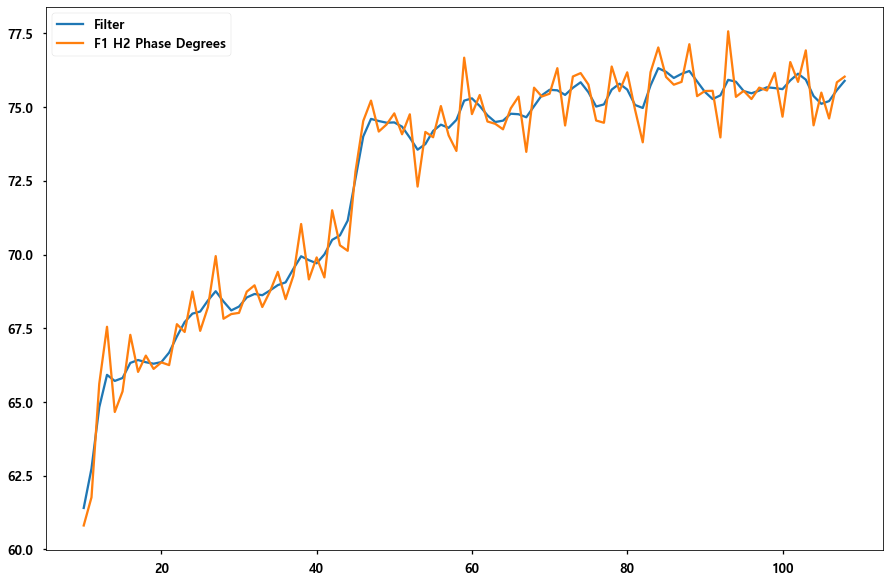

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(tt['filter'])
plt.plot(tt['F1  H2 Phase Degrees'])
plt.legend(['Filter','F1 H2 Phase Degrees'])

# PCA?


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
ccc = temp_8[phase_feature]

x = StandardScaler().fit_transform(ccc)

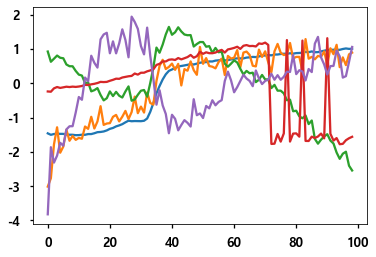

In [ ]:
plt.plot(x)

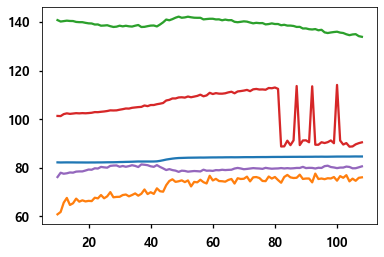

In [ ]:
plt.plot(temp_8[current_phase_feature])

In [ ]:
pca = PCA(n_components=2)
pca_scale = pca.fit_transform(x)
pca_df = pd.DataFrame(data = pca_scale, columns=['pca1','pca2'])

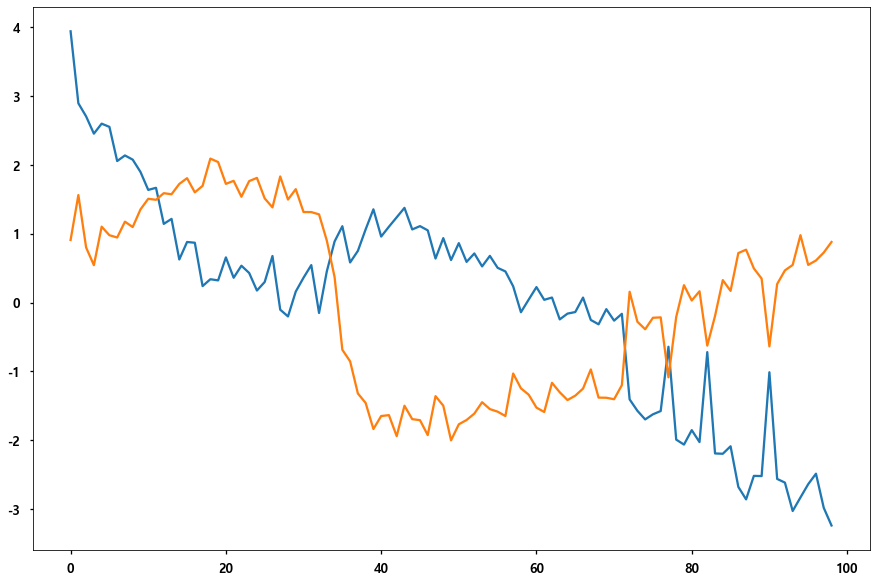

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(pca_df)

In [ ]:
pca.explained_variance_ratio_

array([0.47497537, 0.33147572])

In [ ]:
sum(pca.explained_variance_ratio_)

0.8064510893565722

In [ ]:
ff2 = temp_8[impedance_phase_feature]
ff3 = temp_8[impedance_real_ohms_feature]
ff4 = temp_8[current_phase_feature]

s2 = StandardScaler().fit_transform(ff2)
s3 = StandardScaler().fit_transform(ff3)
s4= StandardScaler().fit_transform(ff4)

In [ ]:
'''
phase_feature = ['F1 Phase Degrees','F1  H2 Phase Degrees','F1  H3 Phase Degrees','F1  H4 Phase Degrees','F1  H5 Phase Degrees']
impedance_phase_feature = ['F1 Impedance Phase Degrees','F1  H2 Impedance  Phase Degrees',
                           'F1  H3 Impedance  Phase Degrees','F1  H4 Impedance  Phase Degrees','F1  H5 Impedance  Phase Degrees']
impedance_real_ohms_feature = ['F1 Impedance Real Ohms','F1  H2 Impedance  Real Ohms','F1  H4 Impedance  Real Ohms','F1  H5 Impedance  Real Ohms']
current_phase_feature = ['F1 Current Phase Degrees','F1  H2 Current  Phase Degrees','F1  H3 Current  Phase Degrees',
                         'F1  H4 Current  Phase Degrees','F1  H5 Current  Phase Degrees']
'''
pca = PCA(n_components=2)
pca_scale = pca.fit_transform(s2)
pca_df = pd.DataFrame(data = pca_scale, columns=['pca1','pca2'])

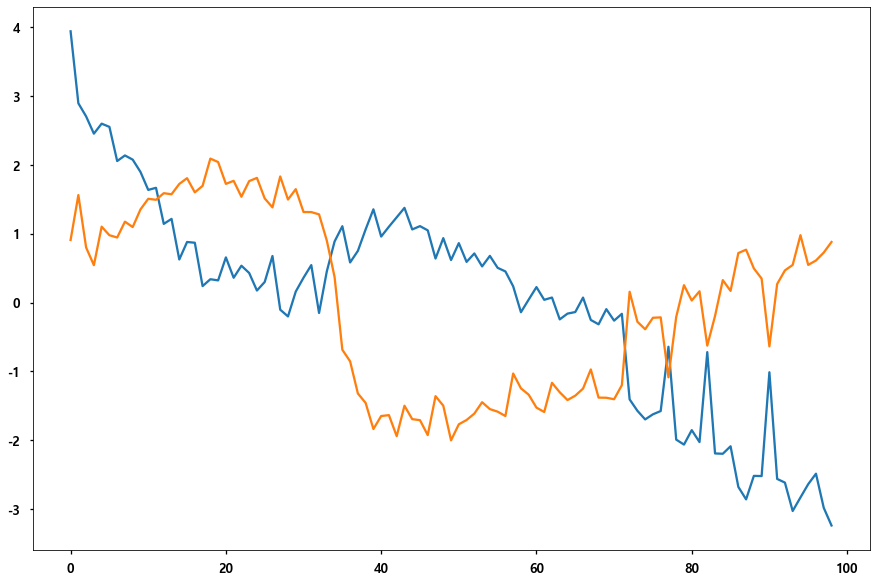

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(pca_df)

In [ ]:
pca_df

pca1      pca2
0   3.940860  0.909657
1   2.895556  1.562302
2   2.704677  0.800487
3   2.454565  0.544257
4   2.599461  1.103118
..       ...       ...
94 -2.830176  0.979503
95 -2.636808  0.547831
96 -2.484794  0.612196
97 -2.979950  0.727049
98 -3.237100  0.880777

[99 rows x 2 columns]

In [ ]:
# def gaussian_filter(image, k_size, sigma):
#     height, width = image.shape[0], image.shape[1]
#     # dst image height and width
#     dst_height = height - k_size + 1
#     dst_width = width - k_size + 1

#     # im2col, turn the k_size*k_size pixels into a row and np.vstack all rows
#     image_array = zeros((dst_height * dst_width, k_size * k_size))
#     row = 0
#     for i, j in product(range(dst_height), range(dst_width)):
#         window = ravel(image[i : i + k_size, j : j + k_size])
#         image_array[row, :] = window
#         row += 1

#     #  turn the kernel into shape(k*k, 1)
#     gaussian_kernel = gen_gaussian_kernel(k_size, sigma)
#     filter_array = ravel(gaussian_kernel)

#     # reshape and get the dst image
#     dst = dot(image_array, filter_array).reshape(dst_height, dst_width).astype(uint8)

#     return dst

TypeError: '(['F1 Phase Degrees', 'F1  H2 Phase Degrees', 'F1  H3 Phase Degrees', 'F1  H4 Phase Degrees', 'F1  H5 Phase Degrees'], ['F1 Impedance Phase Degrees', 'F1  H2 Impedance  Phase Degrees', 'F1  H3 Impedance  Phase Degrees', 'F1  H4 Impedance  Phase Degrees', 'F1  H5 Impedance  Phase Degrees'])' is an invalid key

In [ ]:
|

SyntaxError: invalid syntax (<ipython-input-345-4b37ef281455>, line 1)

In [ ]:
def butter(N, Wn, btype='low', analog=False, output='ba', fs=None):
    return iirfilter(N, Wn, btype=btype, analog=analog,
                     output=output, ftype='butter', fs=fs)

def iirfilter(N, Wn, rp=None, rs=None, btype='band', analog=False,
              ftype='butter', output='ba', fs=None):
        ftype, btype, output = [x.lower() for x in (ftype, btype, output)]
    Wn = asarray(Wn)
    if fs is not None:
        if analog:
            raise ValueError("fs cannot be specified for an analog filter")
        Wn = 2*Wn/fs

    if numpy.any(Wn <= 0):
        raise ValueError("filter critical frequencies must be greater than 0")

    try:
        btype = band_dict[btype]
    except KeyError as e:
        raise ValueError("'%s' is an invalid bandtype for filter." % btype) from e

    try:
        typefunc = filter_dict[ftype][0]
    except KeyError as e:
        raise ValueError("'%s' is not a valid basic IIR filter." % ftype) from e

    if output not in ['ba', 'zpk', 'sos']:
        raise ValueError("'%s' is not a valid output form." % output)

    if rp is not None and rp < 0:
        raise ValueError("passband ripple (rp) must be positive")

    if rs is not None and rs < 0:
        raise ValueError("stopband attenuation (rs) must be positive")

    # Get analog lowpass prototype
    if typefunc == buttap:
        z, p, k = typefunc(N)
    elif typefunc == besselap:
        z, p, k = typefunc(N, norm=bessel_norms[ftype])
    elif typefunc == cheb1ap:
        if rp is None:
            raise ValueError("passband ripple (rp) must be provided to "
                             "design a Chebyshev I filter.")
        z, p, k = typefunc(N, rp)
    elif typefunc == cheb2ap:
        if rs is None:
            raise ValueError("stopband attenuation (rs) must be provided to "
                             "design an Chebyshev II filter.")
        z, p, k = typefunc(N, rs)
    elif typefunc == ellipap:
        if rs is None or rp is None:
            raise ValueError("Both rp and rs must be provided to design an "
                             "elliptic filter.")
        z, p, k = typefunc(N, rp, rs)
    else:
        raise NotImplementedError("'%s' not implemented in iirfilter." % ftype)

    # Pre-warp frequencies for digital filter design
    if not analog:
        if numpy.any(Wn <= 0) or numpy.any(Wn >= 1):
            if fs is not None:
                raise ValueError("Digital filter critical frequencies "
                                 "must be 0 < Wn < fs/2 (fs={} -> fs/2={})".format(fs, fs/2))
            raise ValueError("Digital filter critical frequencies "
                             "must be 0 < Wn < 1")
        fs = 2.0
        warped = 2 * fs * tan(pi * Wn / fs)
    else:
        warped = Wn

    # transform to lowpass, bandpass, highpass, or bandstop
    if btype in ('lowpass', 'highpass'):
        if numpy.size(Wn) != 1:
            raise ValueError('Must specify a single critical frequency Wn for lowpass or highpass filter')

        if btype == 'lowpass':
            z, p, k = lp2lp_zpk(z, p, k, wo=warped)
        elif btype == 'highpass':
            z, p, k = lp2hp_zpk(z, p, k, wo=warped)
    elif btype in ('bandpass', 'bandstop'):
        try:
            bw = warped[1] - warped[0]
            wo = sqrt(warped[0] * warped[1])
        except IndexError as e:
            raise ValueError('Wn must specify start and stop frequencies for bandpass or bandstop '
                             'filter') from e

        if btype == 'bandpass':
            z, p, k = lp2bp_zpk(z, p, k, wo=wo, bw=bw)
        elif btype == 'bandstop':
            z, p, k = lp2bs_zpk(z, p, k, wo=wo, bw=bw)
    else:
        raise NotImplementedError("'%s' not implemented in iirfilter." % btype)

    # Find discrete equivalent if necessary
    if not analog:
        z, p, k = bilinear_zpk(z, p, k, fs=fs)

    # Transform to proper out type (pole-zero, state-space, numer-denom)
    if output == 'zpk':
        return z, p, k
    elif output == 'ba':
        return zpk2tf(z, p, k)
    elif output == 'sos':
        return zpk2sos(z, p, k, analog=analog)

In [ ]:
def gaussian_filter(image, k_size, sigma):
    height, width = image.shape[0], image.shape[1]
    # dst image height and width
    dst_height = height - k_size + 1
    dst_width = width - k_size + 1

    # im2col, turn the k_size*k_size pixels into a row and np.vstack all rows
    image_array = zeros((dst_height * dst_width, k_size * k_size))
    row = 0
    for i, j in product(range(dst_height), range(dst_width)):
        window = ravel(image[i : i + k_size, j : j + k_size])
        image_array[row, :] = window
        row += 1

    #  turn the kernel into shape(k*k, 1)
    gaussian_kernel = gen_gaussian_kernel(k_size, sigma)
    filter_array = ravel(gaussian_kernel)

    # reshape and get the dst image
    dst = dot(image_array, filter_array).reshape(dst_height, dst_width).astype(uint8)

    return dst

In [ ]:
# import numpy as np
import math

def get_gaussian_filter_1d(size, sigma):
    """
    1D 가우시안 필터를 생성한다.
    :param size: int 커널 사이즈
    :param sigma: float
    :return kernel: np.array
    """
    assert size%2==1, "Filter Dimension must be odd" # filter size는 무조건 odd여야한다
    arr = np.arange(math.trunc(size/2)*(-1), math.ceil(size/2)+1 ,1) # 중심으로 부터의 거리가 값인 배열 생성
    kernel_raw = np.exp((-arr*arr)/(2*sigma*sigma)) # 가우시안 필터 공식
    kernel = kernel_raw/kernel_raw.sum() # 정규화
    return kernel

print(get_gaussian_filter_1d(5, 3))

[0.15700966 0.185485   0.19608134 0.185485   0.15700966 0.11892934]


# moving average, butterworth, gaussian

In [ ]:
phase_feature = ['F1 Phase Degrees','F1  H2 Phase Degrees','F1  H3 Phase Degrees','F1  H4 Phase Degrees','F1  H5 Phase Degrees']
impedance_phase_feature = ['F1 Impedance Phase Degrees','F1  H2 Impedance  Phase Degrees',
                           'F1  H3 Impedance  Phase Degrees','F1  H4 Impedance  Phase Degrees','F1  H5 Impedance  Phase Degrees']
impedance_real_ohms_feature = ['F1 Impedance Real Ohms','F1  H2 Impedance  Real Ohms','F1  H4 Impedance  Real Ohms','F1  H5 Impedance  Real Ohms']
current_phase_feature = ['F1 Current Phase Degrees','F1  H2 Current  Phase Degrees','F1  H3 Current  Phase Degrees',
                         'F1  H4 Current  Phase Degrees','F1  H5 Current  Phase Degrees']


In [ ]:
def mov_average(df, features):
    empty_list = []
    temp_df = pd.DataFrame()
    for item in features:
        for i in range(0,(len(df[item])-10)):
            value = df[item].iloc[i:i+10].mean()
            empty_list.append(value)
        temp_df[item] = empty_list
        empty_list.clear()
    return temp_df
        

In [ ]:
def Butterfilter(df, features):
    N = 2 # Filter order 필터의 순서입니다
    Wn = 0.3 # Cutoff frequency 임계 주파수 또는 주파수 저역통과 및 고역통과 필터의 경우 Wn은 스칼라

    B, A = signal.butter(N, Wn, output='ba')
    temp_df = pd.DataFrame()
    for item in features:
        zxcv = np.array(df[item])
        zxcv = zxcv.astype(np.float32)
        
        tempf = signal.filtfilt(B,A,zxcv)
        temp_df[item] = tempf
    return temp_df

In [ ]:
def gaussianfilter(df, features):
    empty_list=[]
    df_temp = pd.DataFrame()
    for item in features:
        value = gaussian_filter(df[item], sigma=1)
        df_temp[item]= value
        
    return df_temp

In [ ]:
mov_8_f1= mov_average(temp_8, phase_feature)
Bf_8_f1 = Butterfilter(temp_8, phase_feature)
gf_8_f1 = gaussianfilter(temp_8,phase_feature)

mov_8_f2= mov_average(temp_8, impedance_phase_feature)
Bf_8_f2 = Butterfilter(temp_8, impedance_phase_feature)
gf_8_f2 = gaussianfilter(temp_8,impedance_phase_feature)

mov_8_f3= mov_average(temp_8, impedance_real_ohms_feature)
Bf_8_f3 = Butterfilter(temp_8, impedance_real_ohms_feature)
gf_8_f3 = gaussianfilter(temp_8,impedance_real_ohms_feature)

mov_8_f4= mov_average(temp_8, current_phase_feature)
Bf_8_f4 = Butterfilter(temp_8, current_phase_feature)
gf_8_f4 = gaussianfilter(temp_8,current_phase_feature)

In [ ]:
mov_8_f1

F1 Phase Degrees  F1  H2 Phase Degrees  F1  H3 Phase Degrees  \
0          82.168580             65.174884            140.199149   
1          82.163541             65.728041            140.065686   
2          82.163805             66.176457            139.985930   
3          82.161586             66.378687            139.845459   
4          82.160327             66.361069            139.689848   
..               ...                   ...                   ...   
84         84.553148             75.752505            135.792105   
85         84.559962             75.655957            135.591176   
86         84.566978             75.649896            135.399284   
87         84.577814             75.583981            135.325201   
88         84.587077             75.602029            135.197865   

    F1  H4 Phase Degrees  F1  H5 Phase Degrees  
0             102.111213             77.945993  
1             102.229209             78.254059  
2             102.366217             78.378609  
3             102.449133             78.602014  
4             102.498122             78.797208  
..                   ...                   ...  
84             92.679221             80.209485  
85             92.601559             80.242693  
86             92.429131             80.228251  
87             92.376154             80.142939  
88             92.334338             80.077151  

[89 rows x 5 columns]

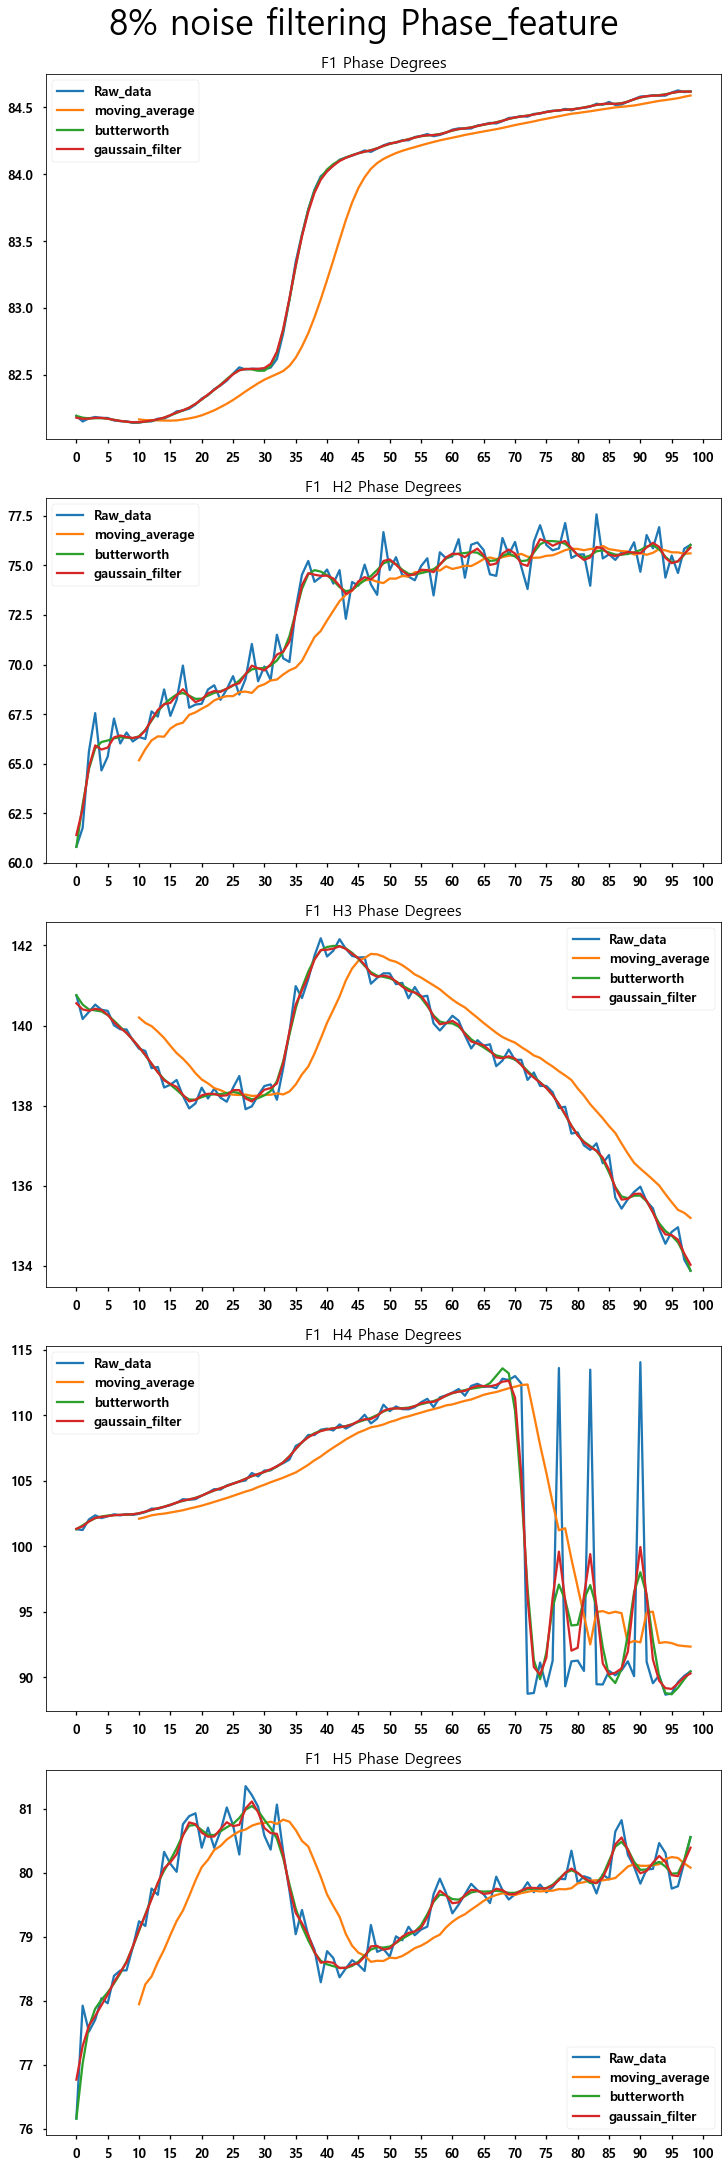

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(10,N), mov_8_f1[item])
    ax[idx].plot(range(0,N), Bf_8_f1[item])
    ax[idx].plot(range(0,N), gf_8_f1[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('8% noise filtering Phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


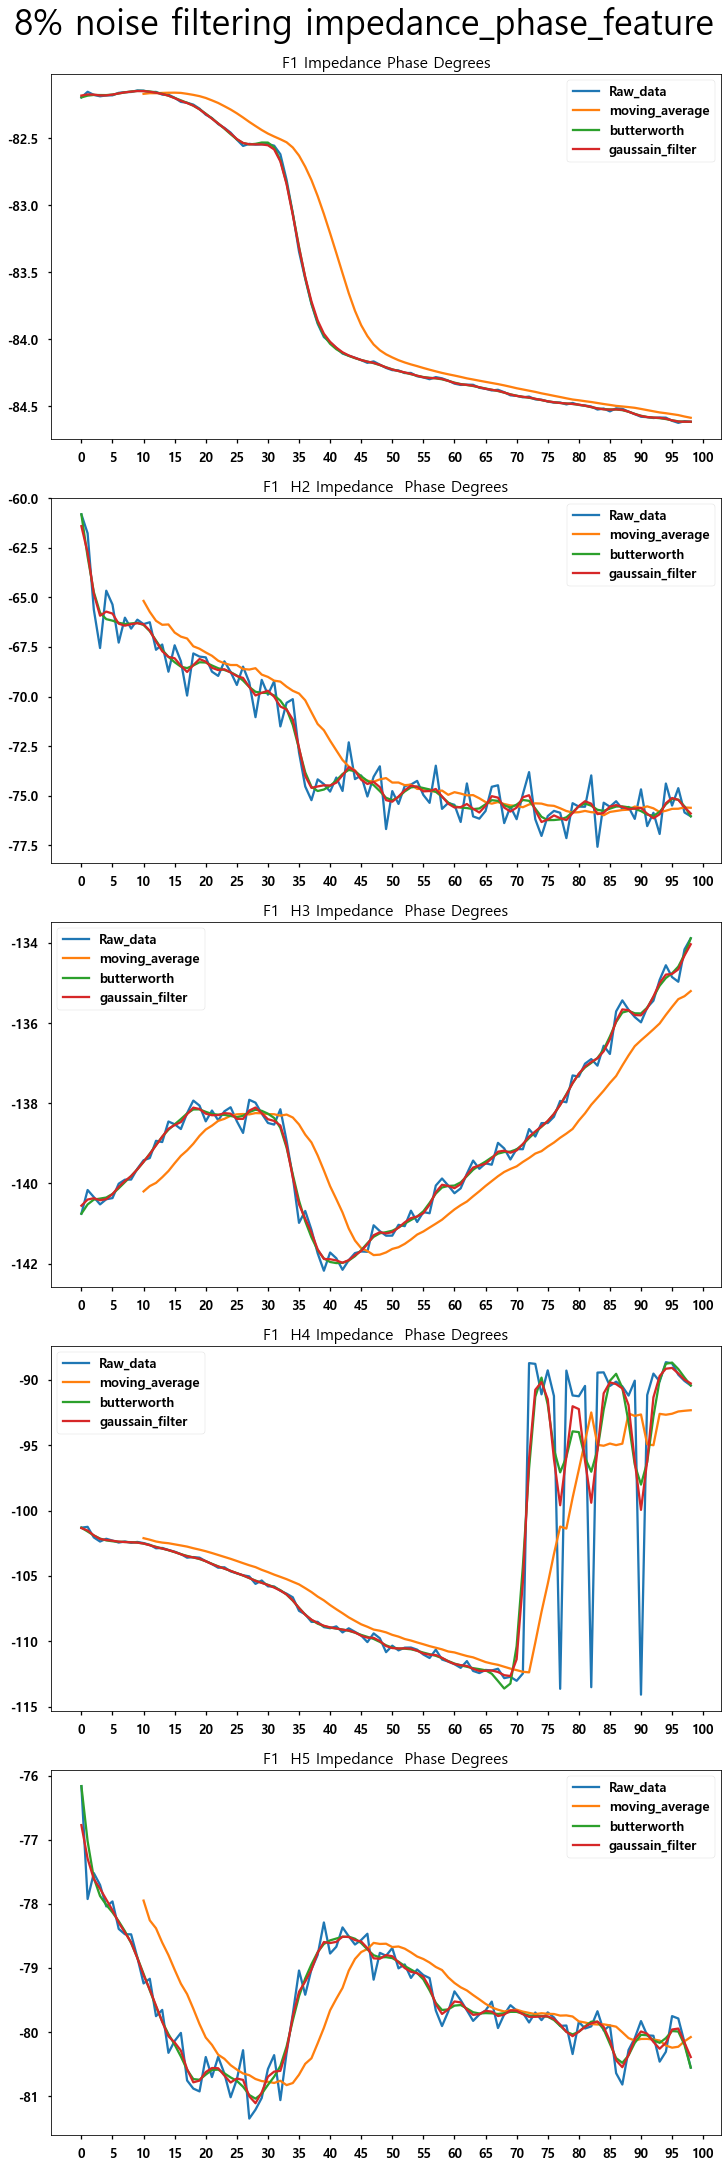

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(impedance_phase_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(10,N), mov_8_f2[item])
    ax[idx].plot(range(0,N), Bf_8_f2[item])
    ax[idx].plot(range(0,N), gf_8_f2[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('8% noise filtering impedance_phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


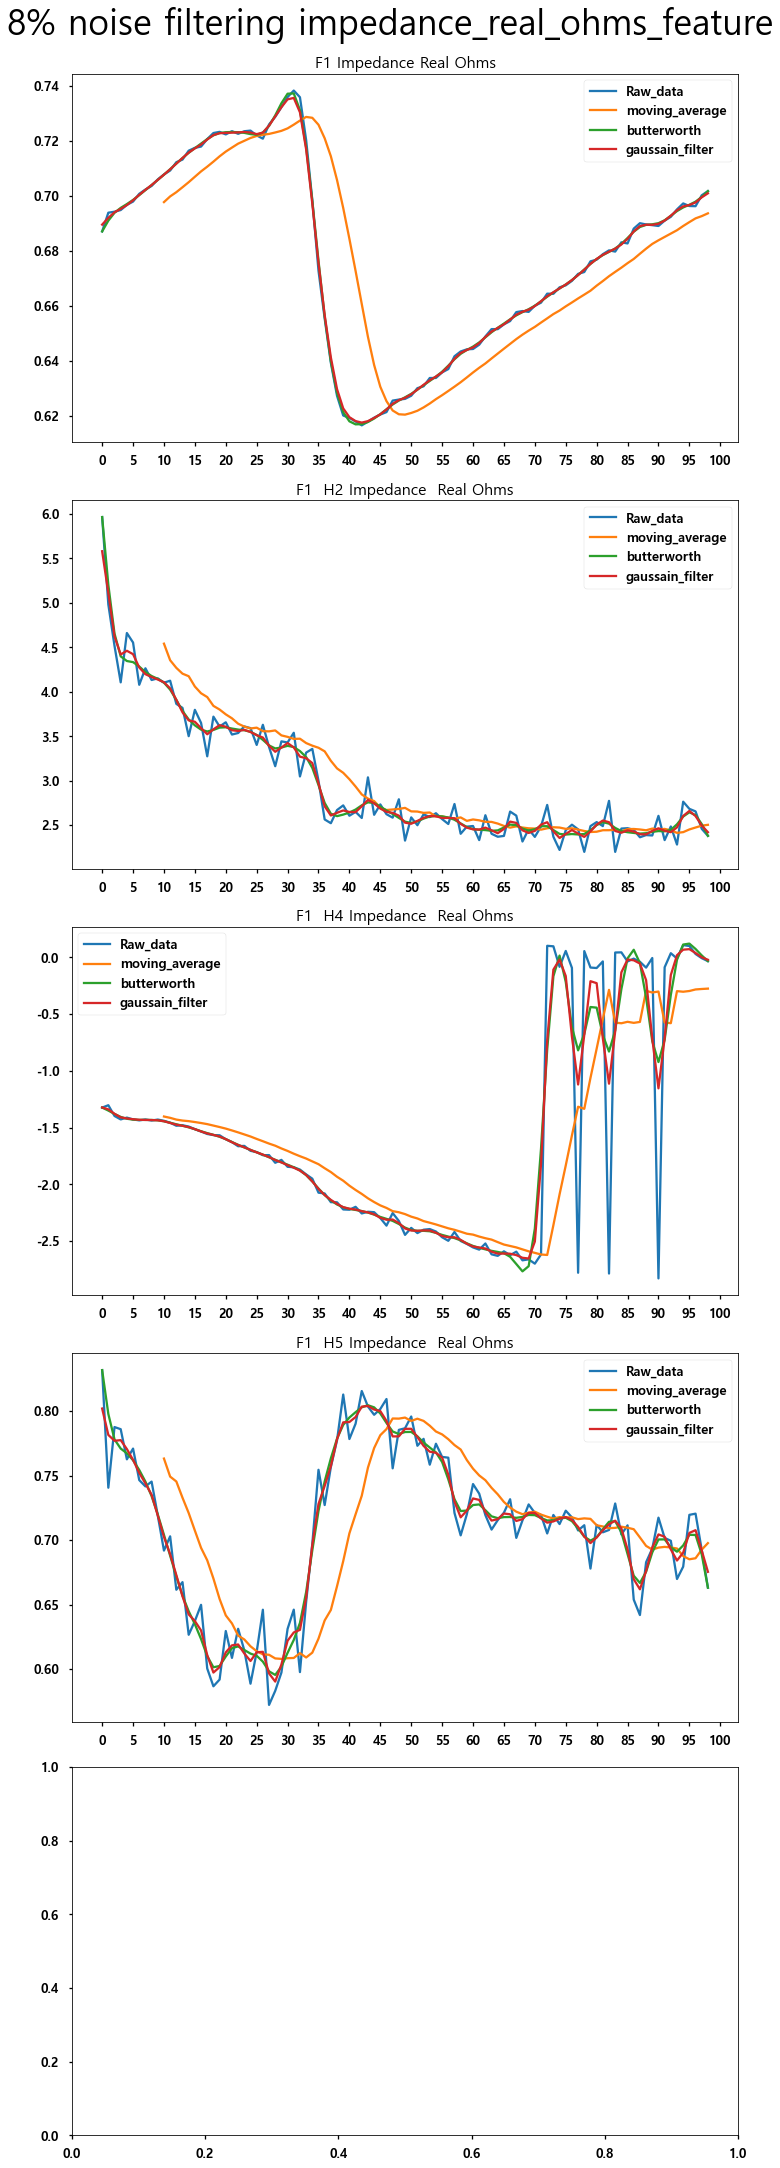

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(impedance_real_ohms_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(10,N), mov_8_f3[item])
    ax[idx].plot(range(0,N), Bf_8_f3[item])
    ax[idx].plot(range(0,N), gf_8_f3[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('8% noise filtering impedance_real_ohms_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


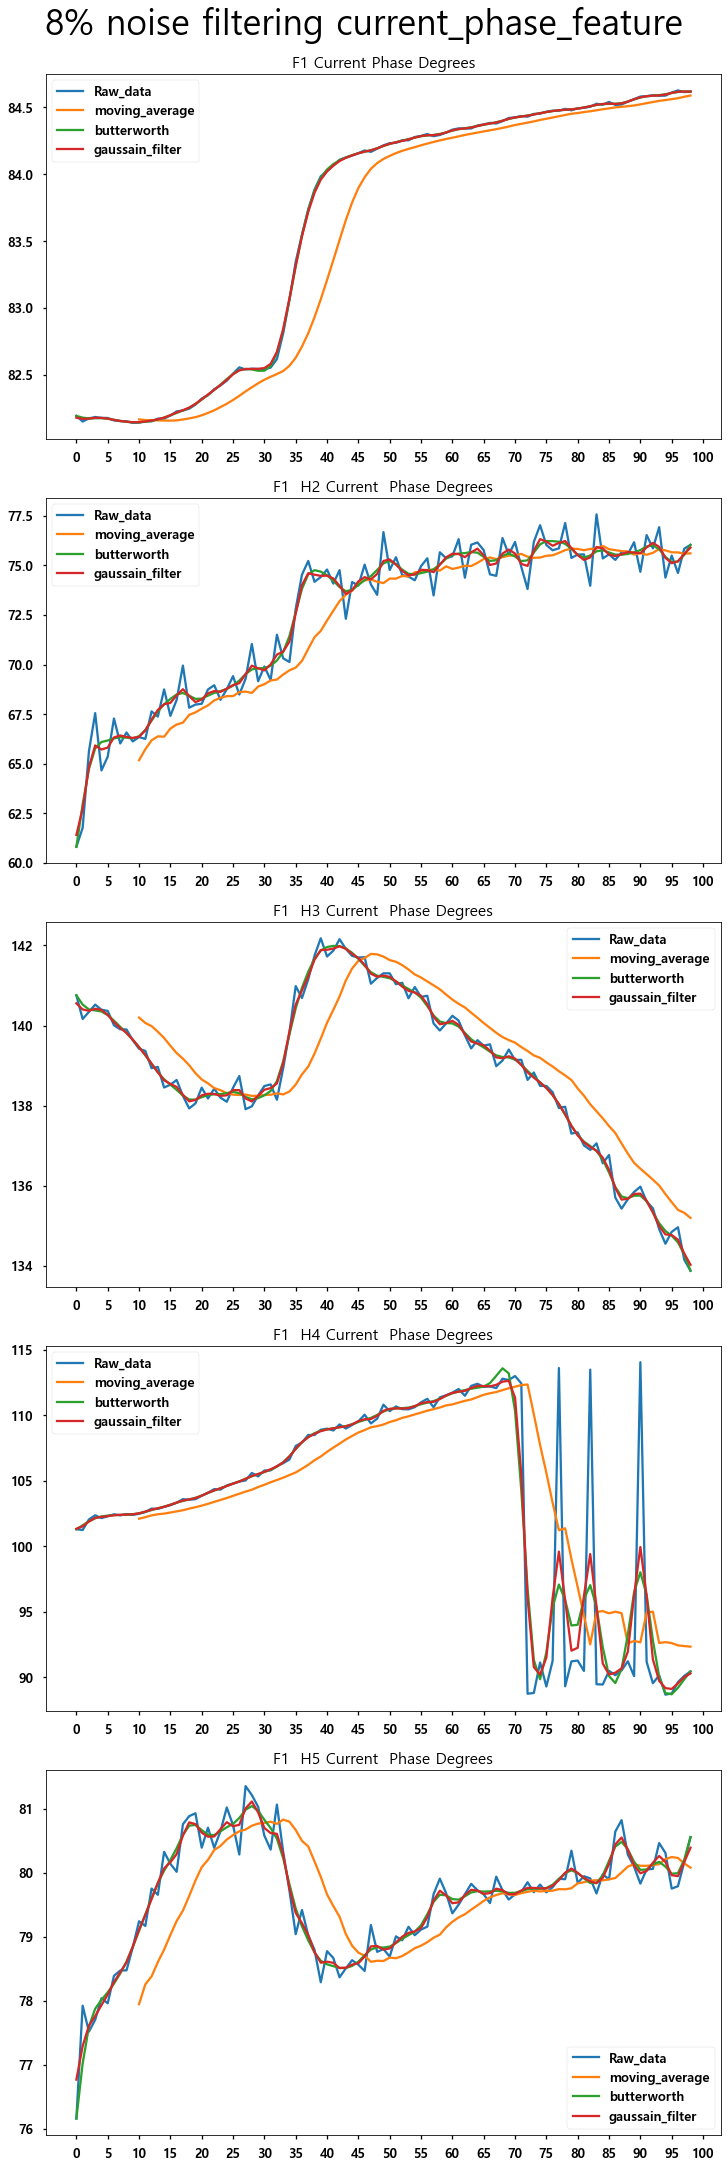

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_8)
for idx, item in enumerate(current_phase_feature):
    ax[idx].plot(range(0,N), temp_8[item])
    ax[idx].plot(range(10,N), mov_8_f4[item])
    ax[idx].plot(range(0,N), Bf_8_f4[item])
    ax[idx].plot(range(0,N), gf_8_f4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('8% noise filtering current_phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


# 4%%%%%%

In [ ]:
mov_4_f1= mov_average(temp_4, phase_feature)
Bf_4_f1 = Butterfilter(temp_4, phase_feature)
gf_4_f1 = gaussianfilter(temp_4,phase_feature)

mov_4_f2= mov_average(temp_4, impedance_phase_feature)
Bf_4_f2 = Butterfilter(temp_4, impedance_phase_feature)
gf_4_f2 = gaussianfilter(temp_4,impedance_phase_feature)

mov_4_f3= mov_average(temp_4, impedance_real_ohms_feature)
Bf_4_f3 = Butterfilter(temp_4, impedance_real_ohms_feature)
gf_4_f3 = gaussianfilter(temp_4,impedance_real_ohms_feature)

mov_4_f4= mov_average(temp_4, current_phase_feature)
Bf_4_f4 = Butterfilter(temp_4, current_phase_feature)
gf_4_f4 = gaussianfilter(temp_4,current_phase_feature)

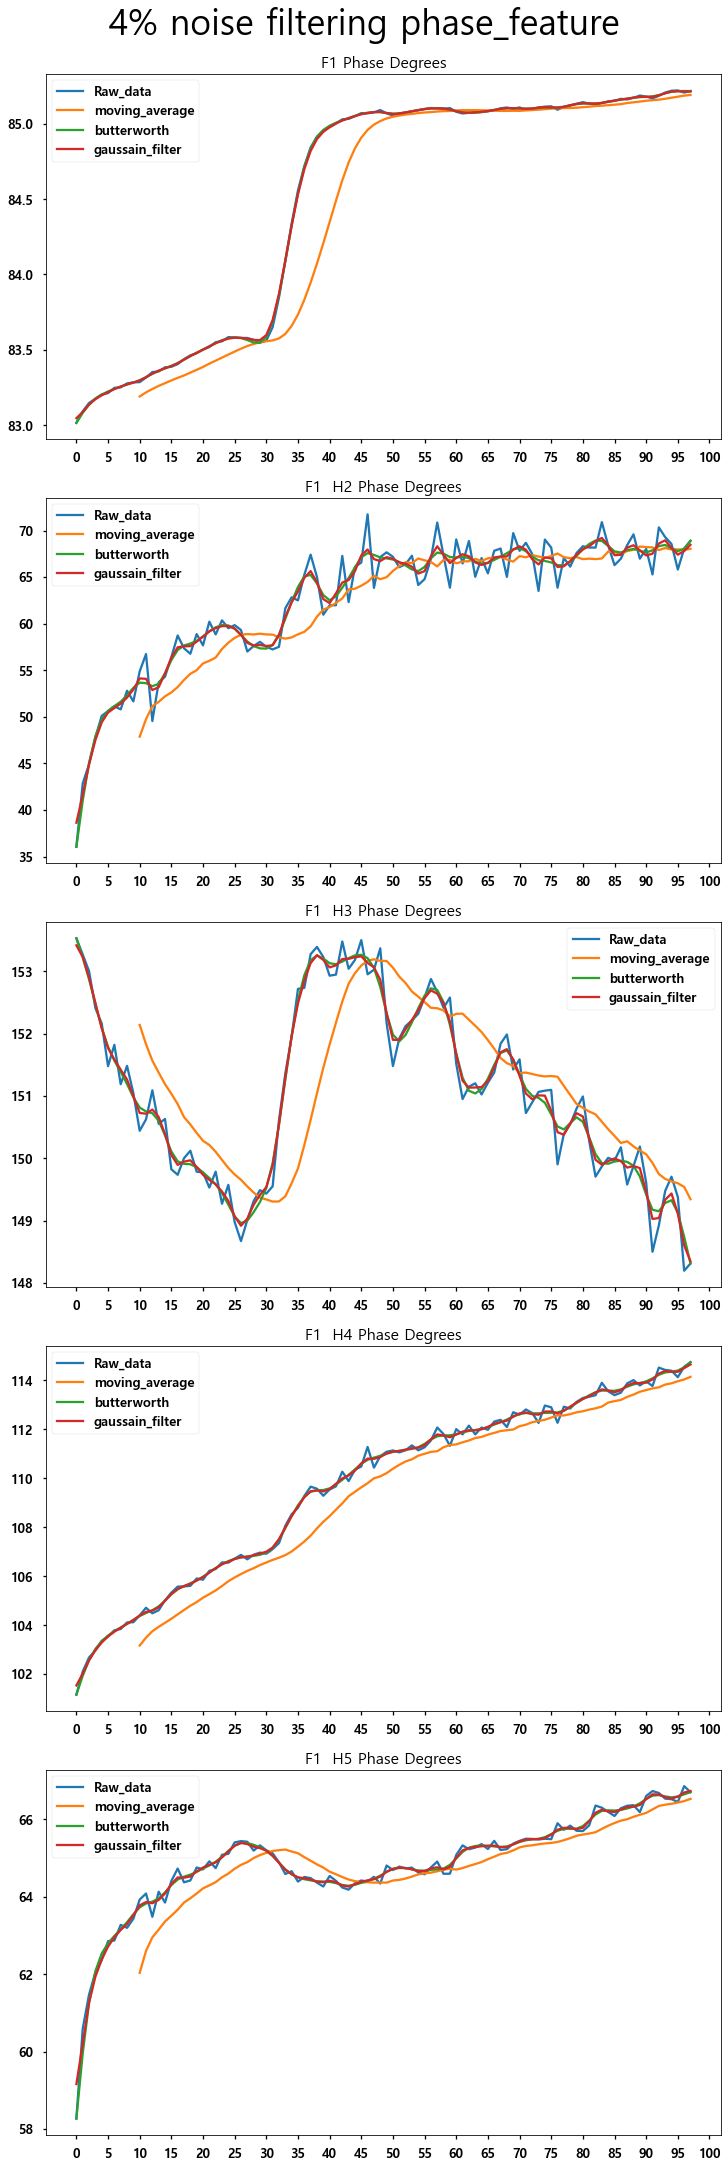

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(10,N), mov_4_f1[item])
    ax[idx].plot(range(0,N), Bf_4_f1[item])
    ax[idx].plot(range(0,N), gf_4_f1[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('4% noise filtering phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


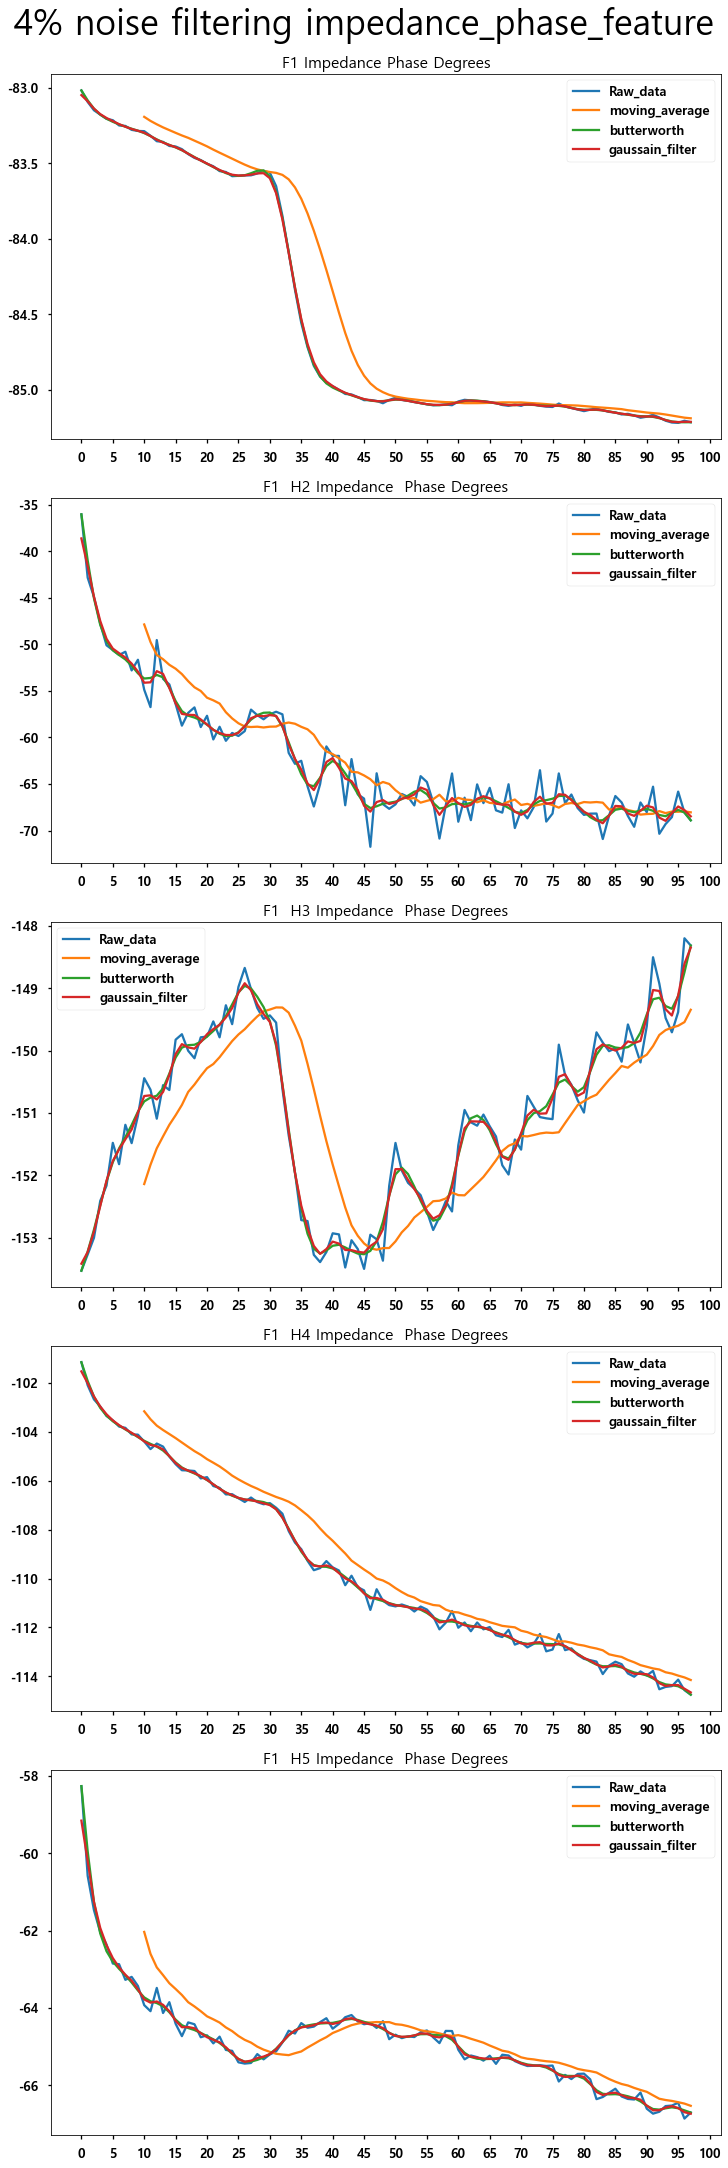

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(impedance_phase_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(10,N), mov_4_f2[item])
    ax[idx].plot(range(0,N), Bf_4_f2[item])
    ax[idx].plot(range(0,N), gf_4_f2[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('4% noise filtering impedance_phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


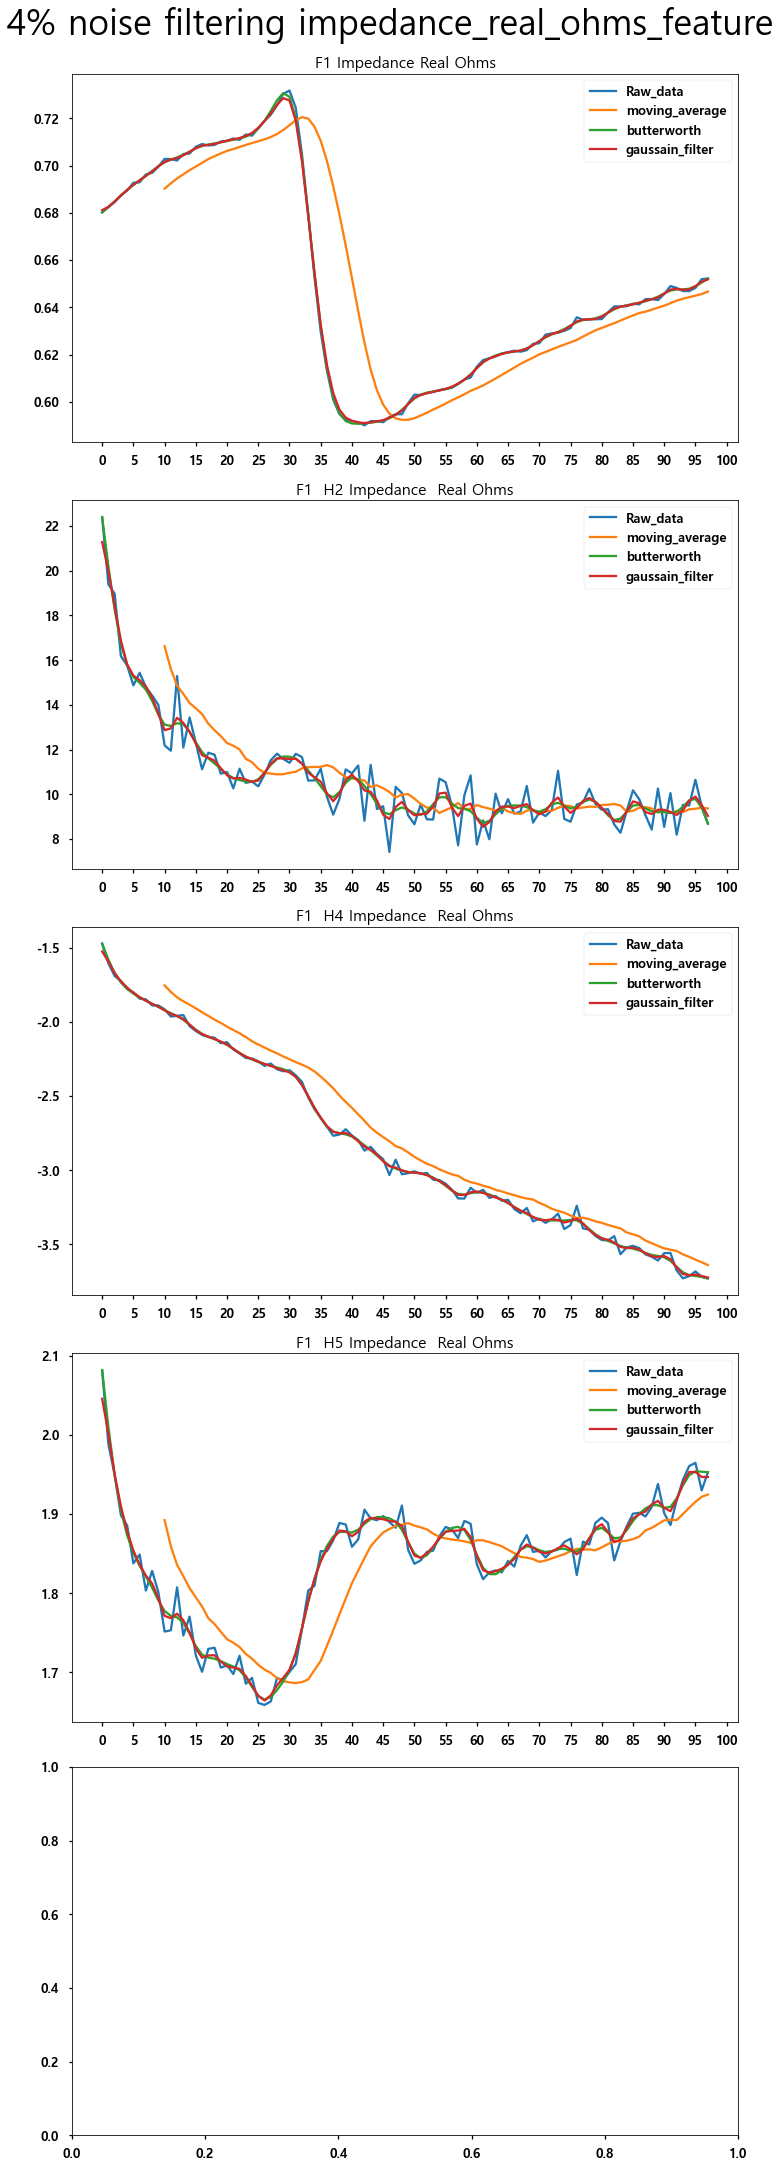

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(impedance_real_ohms_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(10,N), mov_4_f3[item])
    ax[idx].plot(range(0,N), Bf_4_f3[item])
    ax[idx].plot(range(0,N), gf_4_f3[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('4% noise filtering impedance_real_ohms_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


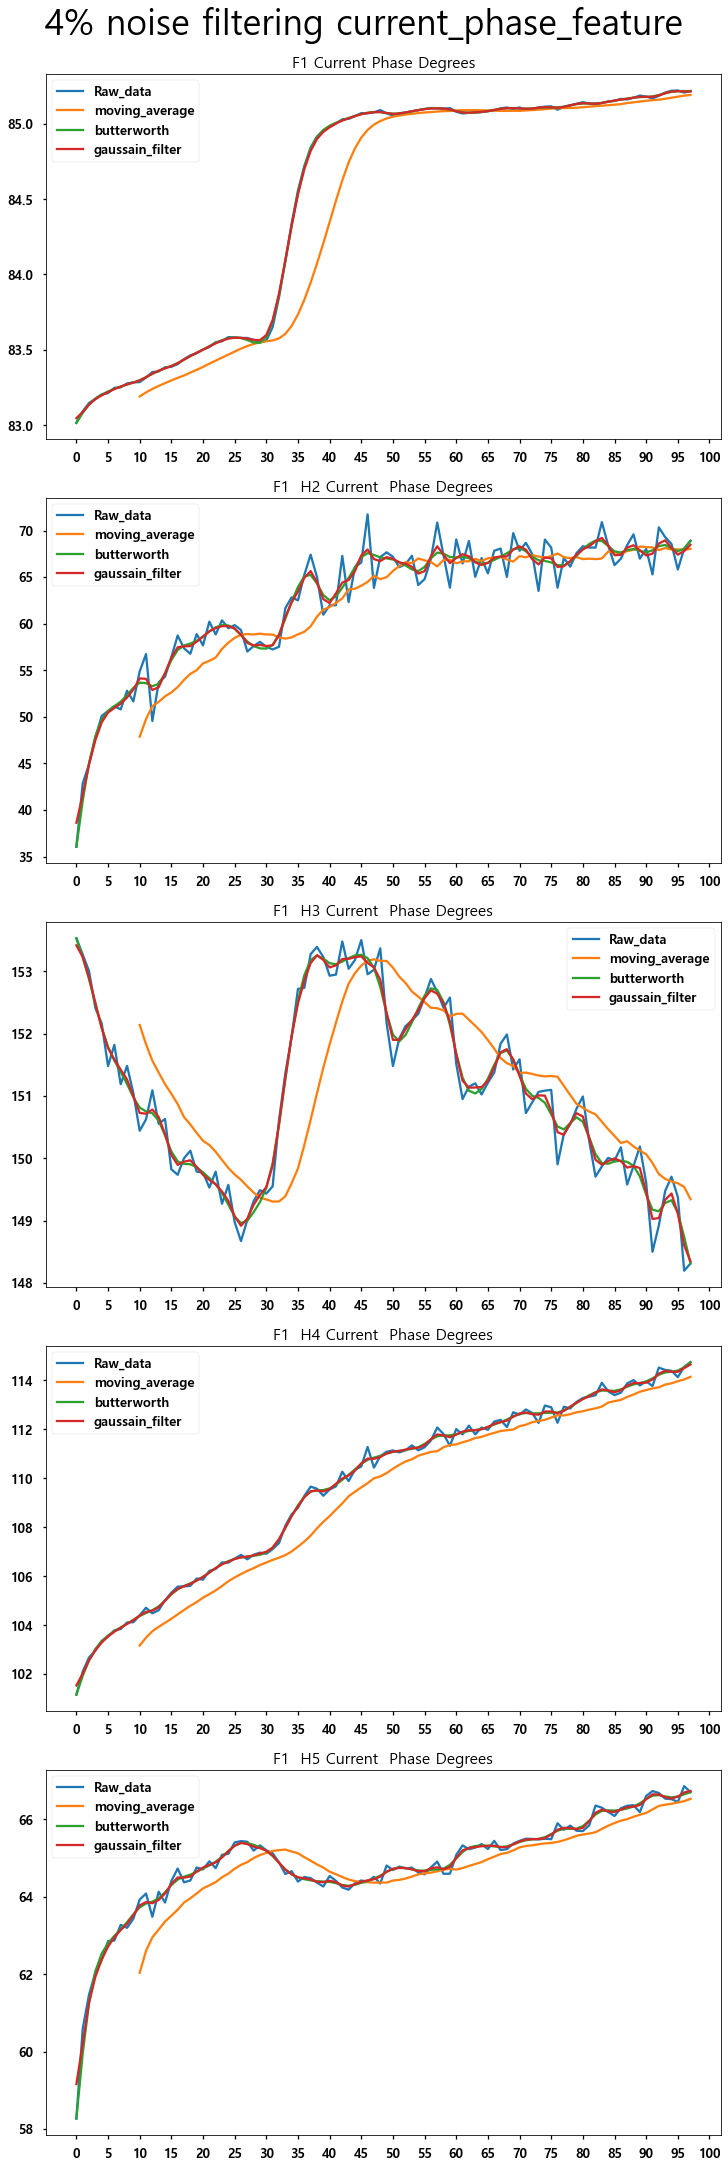

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_4)
for idx, item in enumerate(current_phase_feature):
    ax[idx].plot(range(0,N), temp_4[item])
    ax[idx].plot(range(10,N), mov_4_f4[item])
    ax[idx].plot(range(0,N), Bf_4_f4[item])
    ax[idx].plot(range(0,N), gf_4_f4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('4% noise filtering current_phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


# 1%%%%%%%%%

In [ ]:
mov_1_f1= mov_average(temp_1, phase_feature)
Bf_1_f1 = Butterfilter(temp_1, phase_feature)
gf_1_f1 = gaussianfilter(temp_1,phase_feature)

mov_1_f2= mov_average(temp_1, impedance_phase_feature)
Bf_1_f2 = Butterfilter(temp_1, impedance_phase_feature)
gf_1_f2 = gaussianfilter(temp_1,impedance_phase_feature)

mov_1_f3= mov_average(temp_1, impedance_real_ohms_feature)
Bf_1_f3 = Butterfilter(temp_1, impedance_real_ohms_feature)
gf_1_f3 = gaussianfilter(temp_1,impedance_real_ohms_feature)

mov_1_f4= mov_average(temp_1, current_phase_feature)
Bf_1_f4 = Butterfilter(temp_1, current_phase_feature)
gf_1_f4 = gaussianfilter(temp_1,current_phase_feature)

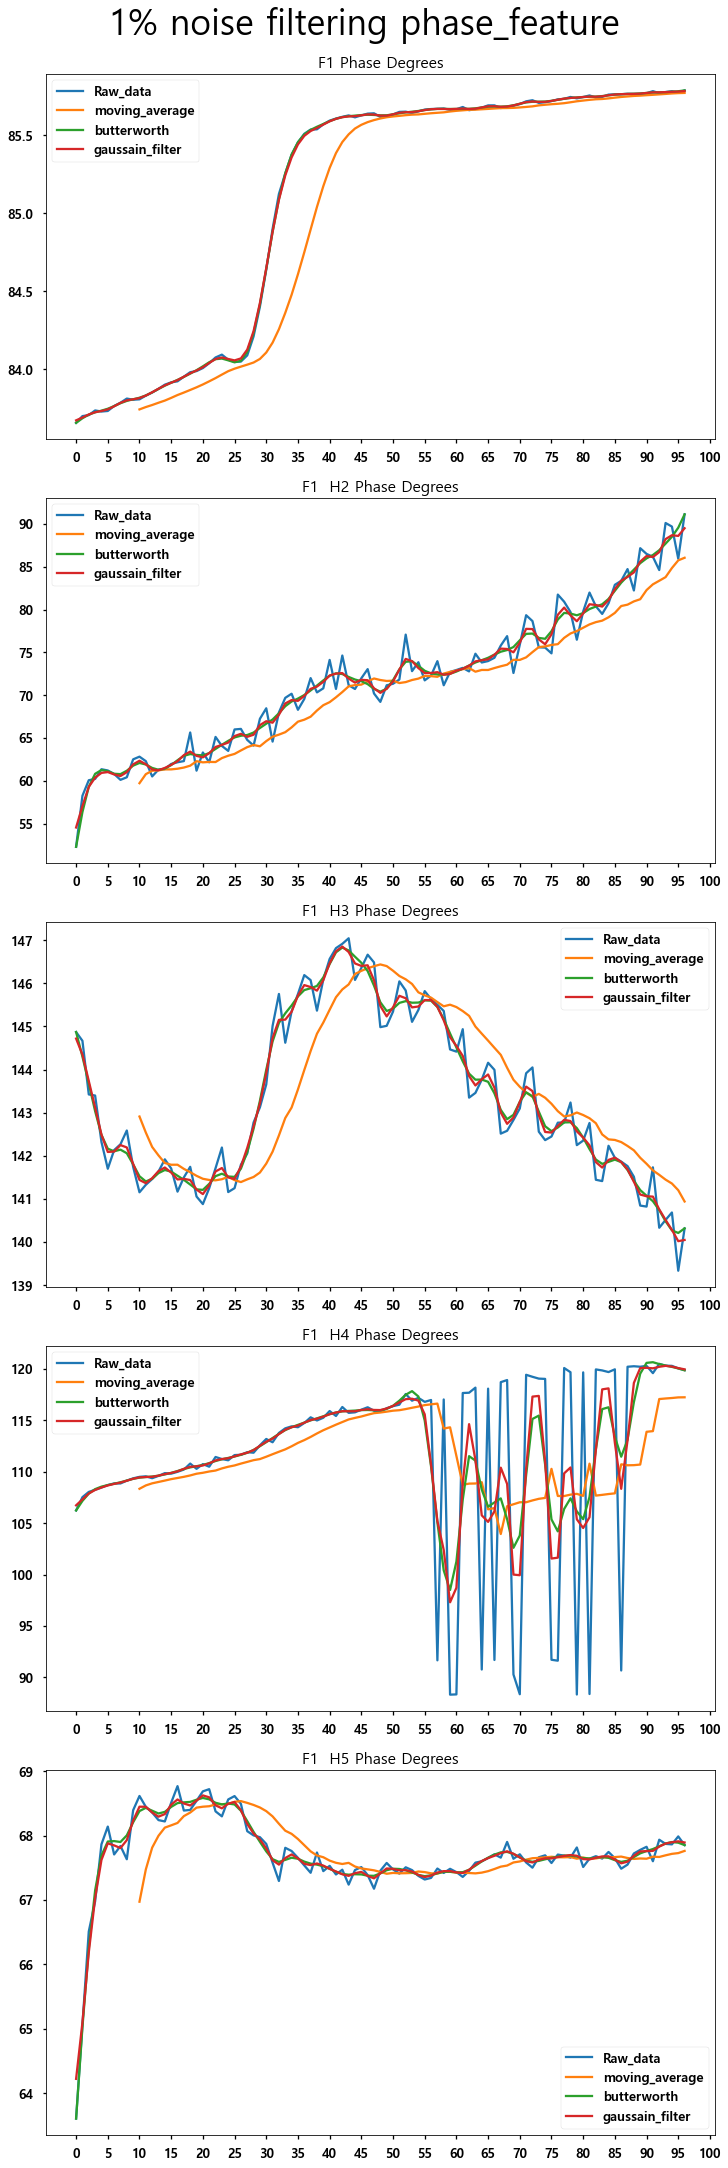

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(phase_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(10,N), mov_1_f1[item])
    ax[idx].plot(range(0,N), Bf_1_f1[item])
    ax[idx].plot(range(0,N), gf_1_f1[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('1% noise filtering phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


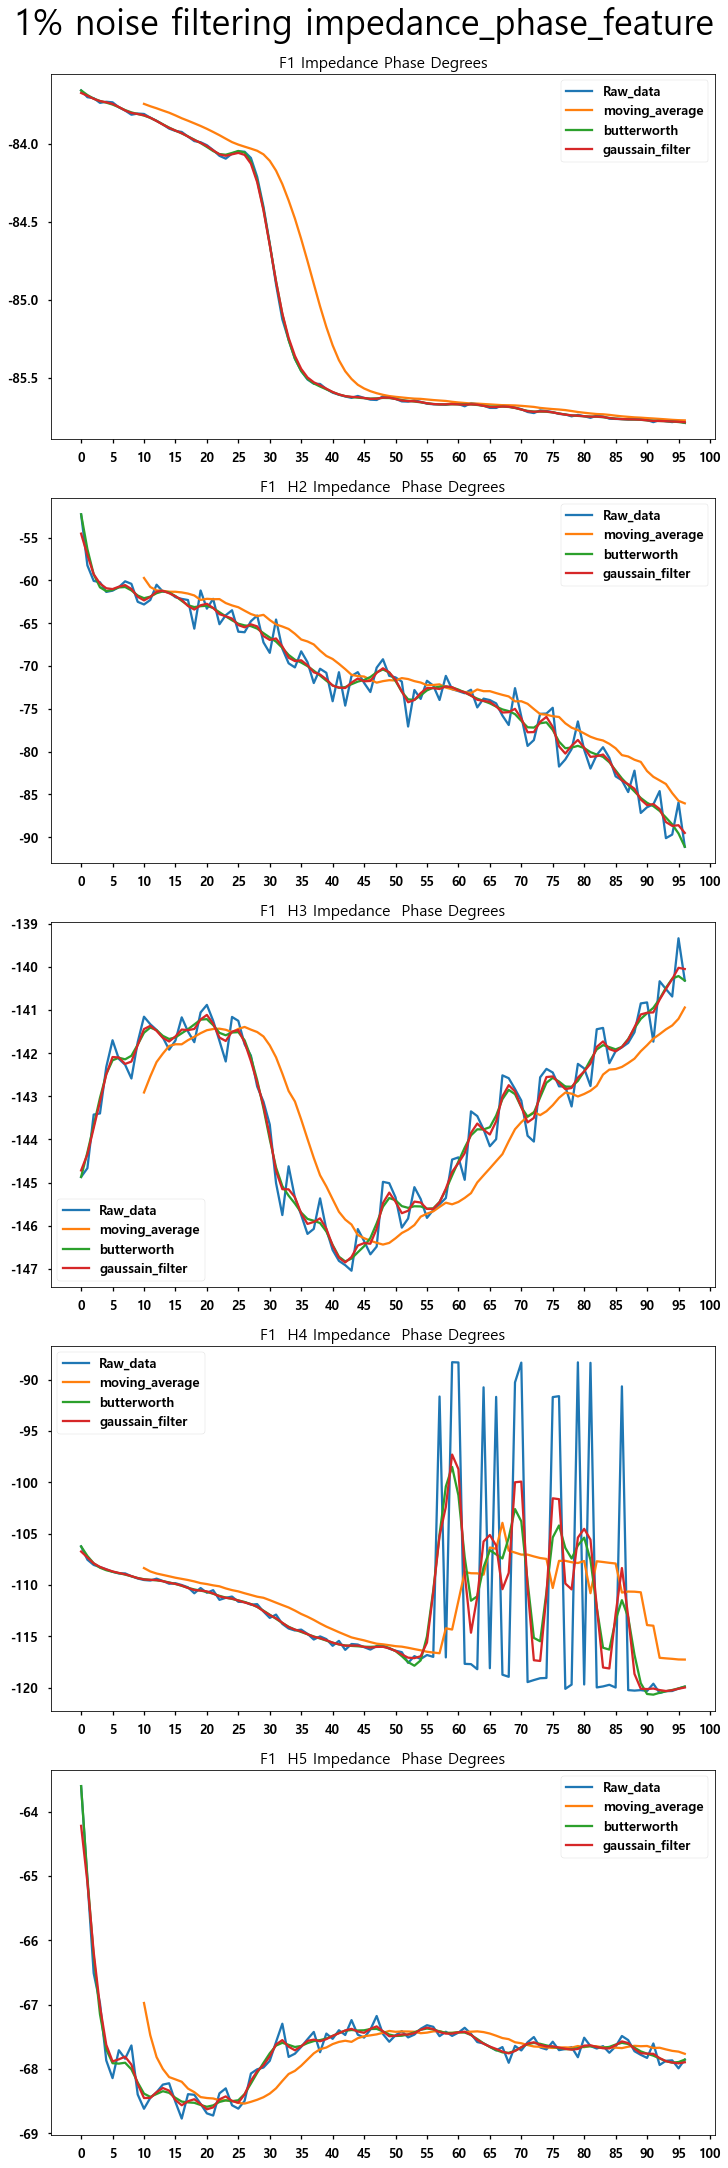

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(impedance_phase_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(10,N), mov_1_f2[item])
    ax[idx].plot(range(0,N), Bf_1_f2[item])
    ax[idx].plot(range(0,N), gf_1_f2[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('1% noise filtering impedance_phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


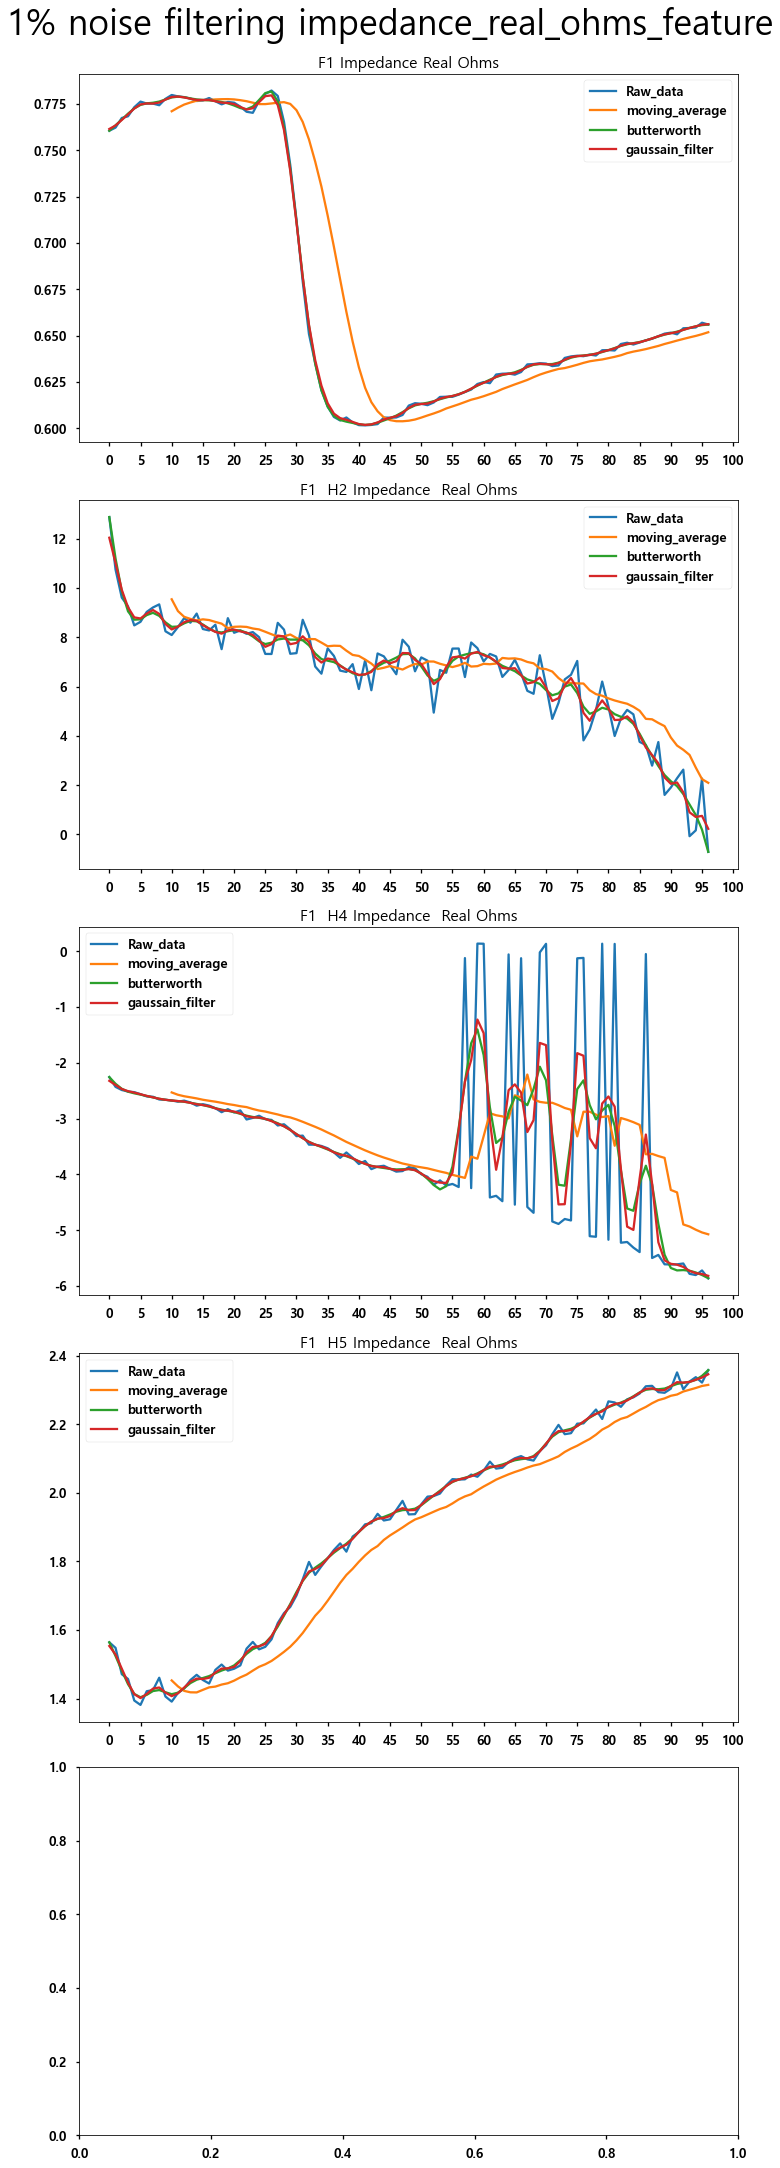

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(impedance_real_ohms_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(10,N), mov_1_f3[item])
    ax[idx].plot(range(0,N), Bf_1_f3[item])
    ax[idx].plot(range(0,N), gf_1_f3[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('1% noise filtering impedance_real_ohms_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


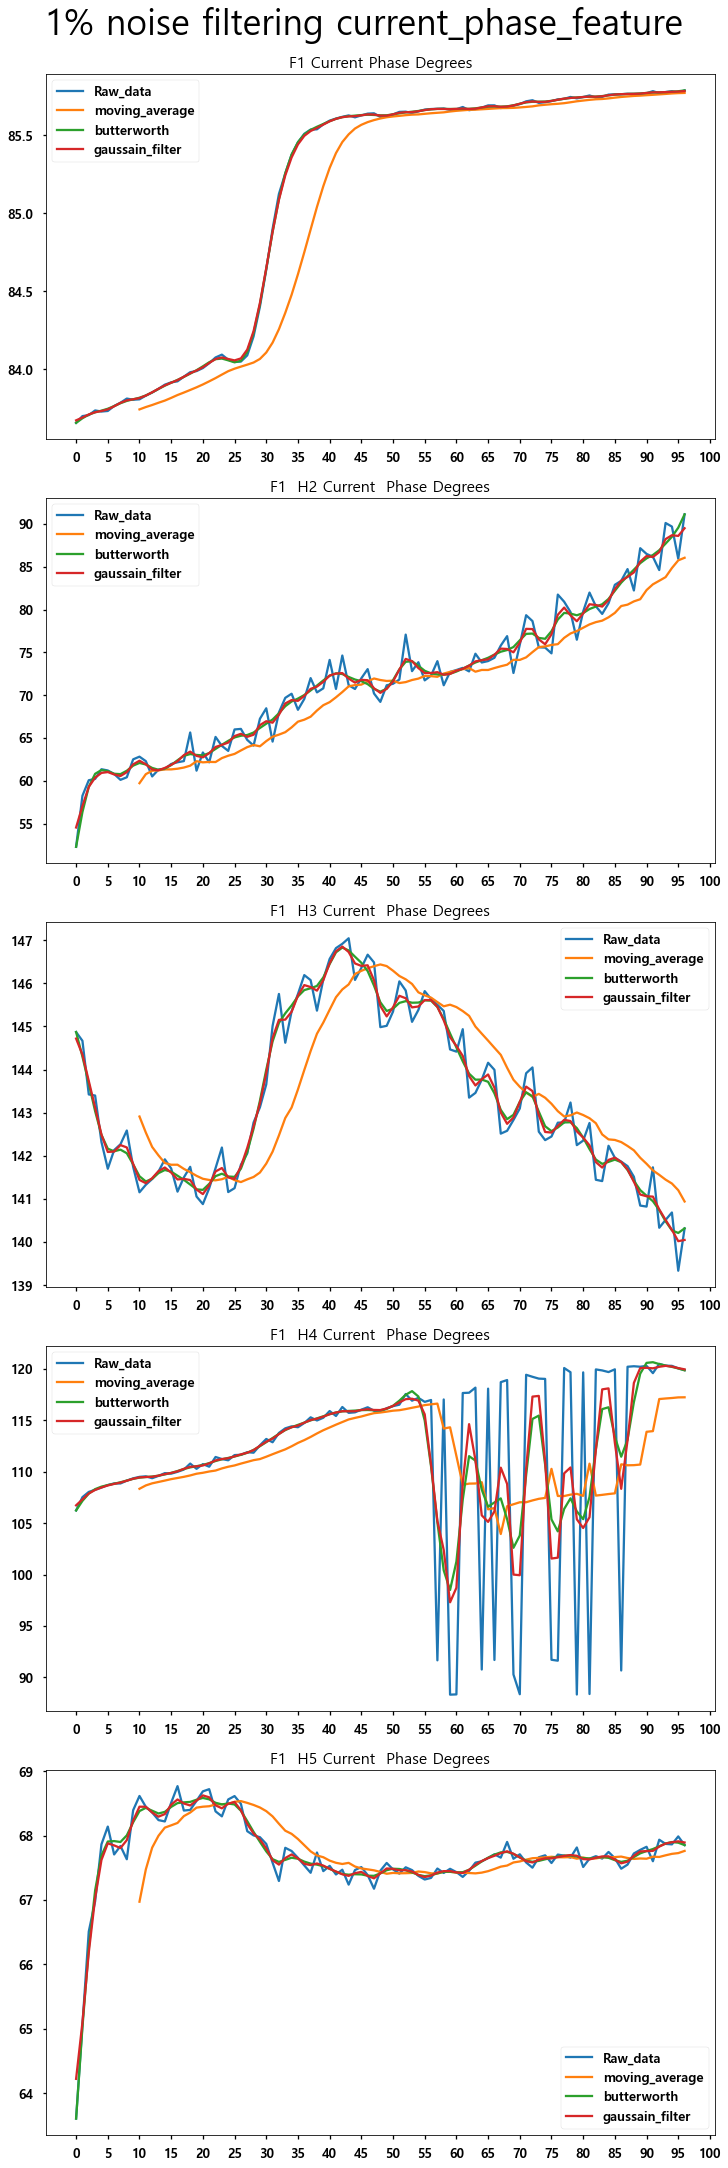

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=1, figsize=(10,30),
                       sharex=False, constrained_layout=True)
N = len(temp_1)
for idx, item in enumerate(current_phase_feature):
    ax[idx].plot(range(0,N), temp_1[item])
    ax[idx].plot(range(10,N), mov_1_f4[item])
    ax[idx].plot(range(0,N), Bf_1_f4[item])
    ax[idx].plot(range(0,N), gf_1_f4[item])
    ax[idx].set_title(item)
    ax[idx].xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[idx].legend(['Raw_data','moving_average','butterworth','gaussain_filter'])

plt.suptitle('1% noise filtering current_phase_feature',fontsize=35)
# plt.legend(['Raw_data','moving_average','butterworth','gaussain_filter'])
plt.show()


<AxesSubplot:>

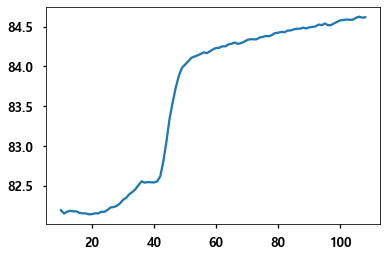

In [ ]:
temp_8['F1 Phase Degrees'].plot()

In [ ]:
v1 = temp_8[15:20]['F1 Phase Degrees'].mean()
std1 = temp_8[15:20]['F1 Phase Degrees'].std()

In [ ]:
v2 = temp_8[55:60]['F1 Phase Degrees'].mean()
# v4 = temp_8[55:60]['F1 Phase Degrees'].std()

In [ ]:
temp_8['F1 Phase Degrees'].std()

0.9871997051918486

In [ ]:
v1, v2 , std1

(82.23795471189999, 84.2941696167, 0.02957783595826798)

In [ ]:
result = abs(v1 - v2) / std1

In [ ]:
result

69.51877438569792

In [ ]:
temp_8

Time time unit  Frequency 1 MHz  F1 Power Watts  F1 Forward Power Watts  \
10           10.001        12.558993      174.697890             3298.350330   
11           11.001        12.559097      178.048947             3329.794701   
12           12.003        12.559601      177.974583             3326.914814   
13           13.000        12.558635      178.061811             3325.895461   
14           14.001        12.558829      178.394226             3323.507558   
..              ...              ...             ...                     ...   
104         104.000        12.559407      173.913579             3273.020455   
105         105.000        12.559043      173.295789             3266.091483   
106         106.001        12.559539      172.882317             3258.959114   
107         107.004        12.558925      174.274420             3267.581862   
108         107.999        12.017233      152.341072             2850.665449   

     F1 Reflected Power Watts  F1 Standing Wave Ratio   F1 Voltage Volts  \
10                3123.652440                73.507636         80.672874   
11                3151.745754                72.792539         81.412659   
12                3148.940231                72.759064         81.655769   
13                3147.833650                72.699524         81.820724   
14                3145.113332                72.506727         81.939430   
..                        ...                      ...               ...   
104               3099.106876                73.265590        116.713280   
105               3092.795694                73.374042        116.930832   
106               3086.076797                73.389323        117.122810   
107               3093.307442                72.984841        117.652832   
108               2698.324377                72.835828        110.215958   

     F1 Current Amps  F1 Phase Degrees  F1 Harmonic Phase Degrees  ...  \
10         15.946061         82.194992                          0  ...   
11         16.019064         82.153221                          0  ...   
12         16.011469         82.176285                          0  ...   
13         16.008476         82.186836                          0  ...   
14         16.001850         82.180313                          0  ...   
..               ...               ...                        ...  ...   
104        15.793552         84.586197                          0  ...   
105        15.776133         84.609589                          0  ...   
106        15.757993         84.625130                          0  ...   
107        15.776524         84.612556                          0  ...   
108        14.734333         84.617256                          0  ...   

     F2 Impedance Real Ohms  F2 Impedance Imaginary Ohms  \
10                        0                            0   
11                        0                            0   
12                        0                            0   
13                        0                            0   
14                        0                            0   
..                      ...                          ...   
104                       0                            0   
105                       0                            0   
106                       0                            0   
107                       0                            0   
108                       0                            0   

     F2 Current Magnitude Amps  F2 Current Phase Degrees  \
10                           0                         0   
11                           0                         0   
12                           0                         0   
13                           0                         0   
14                           0                         0   
..                         ...                       ...   
104                          0                         0   
105                          0           

In [ ]:
mov_8_f1= mov_average(temp_8, phase_feature)
Bf_8_f1 = Butterfilter(temp_8, phase_feature)
gf_8_f1 = gaussianfilter(temp_8,phase_feature)

mov_8_f2= mov_average(temp_8, impedance_phase_feature)
Bf_8_f2 = Butterfilter(temp_8, impedance_phase_feature)
gf_8_f2 = gaussianfilter(temp_8,impedance_phase_feature)

mov_8_f3= mov_average(temp_8, impedance_real_ohms_feature)
Bf_8_f3 = Butterfilter(temp_8, impedance_real_ohms_feature)
gf_8_f3 = gaussianfilter(temp_8,impedance_real_ohms_feature)

mov_8_f4= mov_average(temp_8, current_phase_feature)
Bf_8_f4 = Butterfilter(temp_8, current_phase_feature)
gf_8_f4 = gaussianfilter(temp_8,current_phase_feature)



mov_4_f1= mov_average(temp_4, phase_feature)
Bf_4_f1 = Butterfilter(temp_4, phase_feature)
gf_4_f1 = gaussianfilter(temp_4,phase_feature)

mov_4_f2= mov_average(temp_4, impedance_phase_feature)
Bf_4_f2 = Butterfilter(temp_4, impedance_phase_feature)
gf_4_f2 = gaussianfilter(temp_4,impedance_phase_feature)

mov_4_f3= mov_average(temp_4, impedance_real_ohms_feature)
Bf_4_f3 = Butterfilter(temp_4, impedance_real_ohms_feature)
gf_4_f3 = gaussianfilter(temp_4,impedance_real_ohms_feature)

mov_4_f4= mov_average(temp_4, current_phase_feature)
Bf_4_f4 = Butterfilter(temp_4, current_phase_feature)
gf_4_f4 = gaussianfilter(temp_4,current_phase_feature)




mov_1_f1= mov_average(temp_1, phase_feature)
Bf_1_f1 = Butterfilter(temp_1, phase_feature)
gf_1_f1 = gaussianfilter(temp_1,phase_feature)

mov_1_f2= mov_average(temp_1, impedance_phase_feature)
Bf_1_f2 = Butterfilter(temp_1, impedance_phase_feature)
gf_1_f2 = gaussianfilter(temp_1,impedance_phase_feature)

mov_1_f3= mov_average(temp_1, impedance_real_ohms_feature)
Bf_1_f3 = Butterfilter(temp_1, impedance_real_ohms_feature)
gf_1_f3 = gaussianfilter(temp_1,impedance_real_ohms_feature)

mov_1_f4= mov_average(temp_1, current_phase_feature)
Bf_1_f4 = Butterfilter(temp_1, current_phase_feature)
gf_1_f4 = gaussianfilter(temp_1,current_phase_feature)

### 8%  moving merge

In [ ]:
movingdf_8 = pd.concat([mov_8_f1,mov_8_f2, mov_8_f3, mov_8_f4], axis =1)
butterdf_8 = pd.concat([Bf_8_f1,Bf_8_f2, Bf_8_f3, Bf_8_f4], axis =1)
gaussiandf_8 = pd.concat([gf_8_f1,gf_8_f2, gf_8_f3, gf_8_f4], axis =1)


movingdf_4 = pd.concat([mov_4_f1,mov_4_f2, mov_4_f3, mov_4_f4], axis =1)
butterdf_4 = pd.concat([Bf_4_f1,Bf_4_f2, Bf_4_f3, Bf_4_f4], axis =1)
gaussiandf_4 = pd.concat([gf_4_f1,gf_4_f2, gf_4_f3, gf_4_f4], axis =1)


movingdf_1 = pd.concat([mov_1_f1,mov_1_f2, mov_1_f3, mov_1_f4], axis =1)
butterdf_1 = pd.concat([Bf_1_f1,Bf_1_f2, Bf_1_f3, Bf_1_f4], axis =1)
gaussiandf_1 = pd.concat([gf_1_f1,gf_1_f2, gf_1_f3, gf_1_f4], axis =1)


In [ ]:
p1 = vvvv[15:20].std()
l1 = vvvv[15:20].mean()
l2 = vvvv[55:60].mean()
(abs(l1-l2)) / p1

F1 Phase Degrees                   63.695983
F1  H2 Phase Degrees               23.312619
F1  H3 Phase Degrees               10.401461
F1  H4 Phase Degrees               37.778041
F1  H5 Phase Degrees                3.730203
F1 Impedance Phase Degrees         63.695983
F1  H2 Impedance  Phase Degrees    23.312619
F1  H3 Impedance  Phase Degrees    10.401461
F1  H4 Impedance  Phase Degrees    37.778041
F1  H5 Impedance  Phase Degrees     3.730203
F1 Impedance Real Ohms             34.589603
F1  H2 Impedance  Real Ohms        19.974903
F1  H4 Impedance  Real Ohms        36.641878
F1  H5 Impedance  Real Ohms         6.936188
F1 Current Phase Degrees           63.695983
F1  H2 Current  Phase Degrees      23.312619
F1  H3 Current  Phase Degrees      10.401461
F1  H4 Current  Phase Degrees      37.778041
F1  H5 Current  Phase Degrees       3.730203
dtype: float64

In [ ]:
def sensitivity_factor(df, front=15 , end = 55):
    m1 = df[front:front+5].mean()
    m2 = df[end:end+5].mean()
    std1 = df[front:front+5].std()
    
    result = (abs(m1-m2)) / std1
    return result
    
    

In [ ]:
coll = butterdf_8.columns

In [ ]:
factor_moving = sensitivity_factor(movingdf_4, 5, 45)

factor_butter = sensitivity_factor(butterdf_4)

factor_raw = sensitivity_factor(temp_4[coll])

factor_gaussian = sensitivity_factor(gaussiandf_4)

In [ ]:
data_8 = pd.DataFrame([factor_raw, factor_moving, factor_butter, factor_gaussian], index=['rawdata','moving_average','butterworth','gaussian'])

In [ ]:
data_4 = pd.DataFrame([factor_raw, factor_moving, factor_butter, factor_gaussian], index=['rawdata','moving_average','butterworth','gaussian'])

In [ ]:
data_1 = pd.DataFrame([factor_raw, factor_moving, factor_butter, factor_gaussian], index=['rawdata','moving_average','butterworth','gaussian'])

In [ ]:
data_8.to_csv('8% sensitivity factor.csv')
data_4.to_csv('4% sensitivity factor.csv')
data_1.to_csv('1% sensitivity factor.csv')

In [ ]:
data_4

F1 Phase Degrees  F1  H2 Phase Degrees  F1  H3 Phase Degrees  \
rawdata                43.864199              8.098575             16.848638   
moving_average         63.033103             12.981883              6.717761   
butterworth            48.084039             11.963532             26.693231   
gaussian               46.811733             15.006789             34.766242   

                F1  H4 Phase Degrees  F1  H5 Phase Degrees  \
rawdata                    29.058193              0.798474   
moving_average             24.147410              3.694701   
butterworth                27.394776              1.753675   
gaussian                   29.696758              1.998322   

                F1 Impedance Phase Degrees  F1  H2 Impedance  Phase Degrees  \
rawdata                          43.864199                         8.098575   
moving_average                   63.033103                        12.981883   
butterworth                      48.084039                        11.963532   
gaussian                         46.811733                        15.006789   

                F1  H3 Impedance  Phase Degrees  \
rawdata                               16.848638   
moving_average                         6.717761   
butterworth                           26.693231   
gaussian                              34.766242   

                F1  H4 Impedance  Phase Degrees  \
rawdata                               29.058193   
moving_average                        24.147410   
butterworth                           27.394776   
gaussian                              29.696758   

                F1  H5 Impedance  Phase Degrees  F1 Impedance Real Ohms  \
rawdata                                0.798474              121.266735   
moving_average                         3.694701               45.517508   
butterworth                            1.753675               99.331515   
gaussian                               1.998322              109.675089   

                F1  H2 Impedance  Real Ohms  F1  H4 Impedance  Real Ohms  \
rawdata                            3.339188                    34.963099   
moving_average                     7.453312                    27.985920   
butterworth                        4.710695                    33.346073   
gaussian                           5.337743                    35.209584   

                F1  H5 Impedance  Real Ohms  F1 Current Phase Degrees  \
rawdata                           11.954242                 43.864199   
moving_average                     5.459349                 63.033103   
butterworth                       21.334192                 48.084039   
gaussian                          25.498956                 46.811733   

                F1  H2 Current  Phase Degrees  F1  H3 Current  Phase Degrees  \
rawdata                              8.098575                      16.848638   
moving_average                      12.981883                       6.717761   
butterworth                         11.963532                      26.693231   
gaussian                            15.006789                      34.766242   

                F1  H4 Current  Phase Degrees  F1  H5 Current  Phase Degrees  
rawdata                             29.058193                       0.798474  
moving_average                      24.147410                       3.694701  
butterworth                         27.394776                       1.753675  
gaussian                            29.696758                       1.998322

In [ ]:
data_1

F1 Phase Degrees  F1  H2 Phase Degrees  F1  H3 Phase Degrees  \
rawdata                52.188936              5.632500             12.591718   
moving_average         67.506881             27.921403             34.892974   
butterworth            54.123311             18.411109             24.001597   
gaussian               53.990043             16.059323             27.522425   

                F1  H4 Phase Degrees  F1  H5 Phase Degrees  \
rawdata                    10.980132              7.250057   
moving_average             29.639534              7.617392   
butterworth                16.511275             27.166398   
gaussian                   14.410587             27.239092   

                F1 Impedance Phase Degrees  F1  H2 Impedance  Phase Degrees  \
rawdata                          52.188936                         5.632500   
moving_average                   67.506881                        27.921403   
butterworth                      54.123311                        18.411109   
gaussian                         53.990043                        16.059323   

                F1  H3 Impedance  Phase Degrees  \
rawdata                               12.591718   
moving_average                        34.892974   
butterworth                           24.001597   
gaussian                              27.522425   

                F1  H4 Impedance  Phase Degrees  \
rawdata                               10.980132   
moving_average                        29.639534   
butterworth                           16.511275   
gaussian                              14.410587   

                F1  H5 Impedance  Phase Degrees  F1 Impedance Real Ohms  \
rawdata                                7.250057              126.485968   
moving_average                         7.617392              673.018655   
butterworth                           27.166398              212.175611   
gaussian                              27.239092              205.609123   

                F1  H2 Impedance  Real Ohms  F1  H4 Impedance  Real Ohms  \
rawdata                            1.958644                     5.025947   
moving_average                    12.268821                    39.483213   
butterworth                        7.992679                     8.012789   
gaussian                           7.859063                     6.287152   

                F1  H5 Impedance  Real Ohms  F1 Current Phase Degrees  \
rawdata                           25.076489                 52.188936   
moving_average                    74.151155                 67.506881   
butterworth                       50.032000                 54.123311   
gaussian                          39.019576                 53.990043   

                F1  H2 Current  Phase Degrees  F1  H3 Current  Phase Degrees  \
rawdata                              5.632500                      12.591718   
moving_average                      27.921403                      34.892974   
butterworth                         18.411109                      24.001597   
gaussian                            16.059323                      27.522425   

                F1  H4 Current  Phase Degrees  F1  H5 Current  Phase Degrees  
rawdata                             10.980132                       7.250057  
moving_average                      29.639534                       7.617392  
butterworth                         16.511275                      27.166398  
gaussian                            14.410587                      27.239092

In [ ]:
temp_8[coll].to_csv('')
temp_4[coll]
temp_1[coll]

F1 Phase Degrees  F1  H2 Phase Degrees  F1  H3 Phase Degrees  \
10          82.194992             60.812092            140.755615   
11          82.153221             61.765812            140.163742   
12          82.176285             65.615517            140.340683   
13          82.186836             67.549713            140.522675   
14          82.180313             64.660431            140.394653   
..                ...                   ...                   ...   
104         84.586197             74.380638            134.553162   
105         84.609589             75.490028            134.848969   
106         84.625130             74.612862            134.965103   
107         84.612556             75.839119            134.156601   
108         84.617256             76.030495            133.879791   

     F1  H4 Phase Degrees  F1  H5 Phase Degrees  F1 Impedance Phase Degrees  \
10             101.308258             76.158806                  -82.194992   
11             101.246140             77.921463                  -82.153221   
12             102.055695             77.516579                  -82.176285   
13             102.369698             77.701141                  -82.186836   
14             102.156624             78.037010                  -82.180313   
..                    ...                   ...                         ...   
104             88.663780             80.306854                  -84.586197   
105             88.756012             79.749702                  -84.609589   
106             89.619621             79.787422                  -84.625130   
107             90.095795             80.160606                  -84.612556   
108             90.442619             80.553749                  -84.617256   

     F1  H2 Impedance  Phase Degrees  F1  H3 Impedance  Phase Degrees  \
10                        -60.812092                      -140.755615   
11                        -61.765812                      -140.163742   
12                        -65.615517                      -140.340683   
13                        -67.549713                      -140.522675   
14                        -64.660431                      -140.394653   
..                               ...                              ...   
104                       -74.380638                      -134.553162   
105                       -75.490028                      -134.848969   
106                       -74.612862                      -134.965103   
107                       -75.839119                      -134.156601   
108                       -76.030495                      -133.879791   

     F1  H4 Impedance  Phase Degrees  F1  H5 Impedance  Phase Degrees  \
10                       -101.308258                       -76.158806   
11                       -101.246140                       -77.921463   
12                       -102.055695                       -77.516579   
13                       -102.369698                       -77.701141   
14                       -102.156624                       -78.037010   
..                               ...                              ...   
104                       -88.663780                       -80.306854   
105                       -88.756012                       -79.749702   
106                       -89.619621                       -79.787422   
107                       -90.095795                       -80.160606   
108                       -90.442619                       -80.553749   

     F1 Impedance Real Ohms  F1  H2 Impedance  Real Ohms  \
10                 0.687038                     5.964991   
11                 0.693849                     4.982179   
12                 0.694218                     4.516164   
13                 0.694818                     4.105631   
14                 0.696691                     4.660559   
..                      ...                          ...   
104                0.697226                     2.762

In [ ]:
movingdf_8

F1 Phase Degrees  F1  H2 Phase Degrees  F1  H3 Phase Degrees  \
0          82.168580             65.174884            140.199149   
1          82.163541             65.728041            140.065686   
2          82.163805             66.176457            139.985930   
3          82.161586             66.378687            139.845459   
4          82.160327             66.361069            139.689848   
..               ...                   ...                   ...   
84         84.553148             75.752505            135.792105   
85         84.559962             75.655957            135.591176   
86         84.566978             75.649896            135.399284   
87         84.577814             75.583981            135.325201   
88         84.587077             75.602029            135.197865   

    F1  H4 Phase Degrees  F1  H5 Phase Degrees  F1 Impedance Phase Degrees  \
0             102.111213             77.945993                  -82.168580   
1             102.229209             78.254059                  -82.163541   
2             102.366217             78.378609                  -82.163805   
3             102.449133             78.602014                  -82.161586   
4             102.498122             78.797208                  -82.160327   
..                   ...                   ...                         ...   
84             92.679221             80.209485                  -84.553148   
85             92.601559             80.242693                  -84.559962   
86             92.429131             80.228251                  -84.566978   
87             92.376154             80.142939                  -84.577814   
88             92.334338             80.077151                  -84.587077   

    F1  H2 Impedance  Phase Degrees  F1  H3 Impedance  Phase Degrees  \
0                        -65.174884                      -140.199149   
1                        -65.728041                      -140.065686   
2                        -66.176457                      -139.985930   
3                        -66.378687                      -139.845459   
4                        -66.361069                      -139.689848   
..                              ...                              ...   
84                       -75.752505                      -135.792105   
85                       -75.655957                      -135.591176   
86                       -75.649896                      -135.399284   
87                       -75.583981                      -135.325201   
88                       -75.602029                      -135.197865   

    F1  H4 Impedance  Phase Degrees  F1  H5 Impedance  Phase Degrees  \
0                       -102.111213                       -77.945993   
1                       -102.229209                       -78.254059   
2                       -102.366217                       -78.378609   
3                       -102.449133                       -78.602014   
4                       -102.498122                       -78.797208   
..                              ...                              ...   
84                       -92.679221                       -80.209485   
85                       -92.601559                       -80.242693   
86                       -92.429131                       -80.228251   
87                       -92.376154                       -80.142939   
88                       -92.334338                       -80.077151   

    F1 Impedance Real Ohms  F1  H2 Impedance  Real Ohms  \
0                 0.697709                     4.540745   
1                 0.699783                     4.354422   
2                 0.701319                     4.268607   
3                 0.703121                     4.203344   
4                 0.704958                     4.174611   
..                     ...                          ...   
84                0.689011                     2.420467   
85                0.690425                     2

In [ ]:
temp_8[:]

Time time unit  Frequency 1 MHz  F1 Power Watts  F1 Forward Power Watts  \
10           10.001        12.558993      174.697890             3298.350330   
11           11.001        12.559097      178.048947             3329.794701   
12           12.003        12.559601      177.974583             3326.914814   
13           13.000        12.558635      178.061811             3325.895461   
14           14.001        12.558829      178.394226             3323.507558   
..              ...              ...             ...                     ...   
104         104.000        12.559407      173.913579             3273.020455   
105         105.000        12.559043      173.295789             3266.091483   
106         106.001        12.559539      172.882317             3258.959114   
107         107.004        12.558925      174.274420             3267.581862   
108         107.999        12.017233      152.341072             2850.665449   

     F1 Reflected Power Watts  F1 Standing Wave Ratio   F1 Voltage Volts  \
10                3123.652440                73.507636         80.672874   
11                3151.745754                72.792539         81.412659   
12                3148.940231                72.759064         81.655769   
13                3147.833650                72.699524         81.820724   
14                3145.113332                72.506727         81.939430   
..                        ...                      ...               ...   
104               3099.106876                73.265590        116.713280   
105               3092.795694                73.374042        116.930832   
106               3086.076797                73.389323        117.122810   
107               3093.307442                72.984841        117.652832   
108               2698.324377                72.835828        110.215958   

     F1 Current Amps  F1 Phase Degrees  F1 Harmonic Phase Degrees  ...  \
10         15.946061         82.194992                          0  ...   
11         16.019064         82.153221                          0  ...   
12         16.011469         82.176285                          0  ...   
13         16.008476         82.186836                          0  ...   
14         16.001850         82.180313                          0  ...   
..               ...               ...                        ...  ...   
104        15.793552         84.586197                          0  ...   
105        15.776133         84.609589                          0  ...   
106        15.757993         84.625130                          0  ...   
107        15.776524         84.612556                          0  ...   
108        14.734333         84.617256                          0  ...   

     F2 Impedance Real Ohms  F2 Impedance Imaginary Ohms  \
10                        0                            0   
11                        0                            0   
12                        0                            0   
13                        0                            0   
14                        0                            0   
..                      ...                          ...   
104                       0                            0   
105                       0                            0   
106                       0                            0   
107                       0                            0   
108                       0                            0   

     F2 Current Magnitude Amps  F2 Current Phase Degrees  \
10                           0                         0   
11                           0                         0   
12                           0                         0   
13                           0                         0   
14                           0                         0   
..                         ...                       ...   
104                          0                         0   
105                          0           

In [ ]:
temp_8[coll]

F1 Phase Degrees  F1  H2 Phase Degrees  F1  H3 Phase Degrees  \
10          82.194992             60.812092            140.755615   
11          82.153221             61.765812            140.163742   
12          82.176285             65.615517            140.340683   
13          82.186836             67.549713            140.522675   
14          82.180313             64.660431            140.394653   
..                ...                   ...                   ...   
104         84.586197             74.380638            134.553162   
105         84.609589             75.490028            134.848969   
106         84.625130             74.612862            134.965103   
107         84.612556             75.839119            134.156601   
108         84.617256             76.030495            133.879791   

     F1  H4 Phase Degrees  F1  H5 Phase Degrees  F1 Impedance Phase Degrees  \
10             101.308258             76.158806                  -82.194992   
11             101.246140             77.921463                  -82.153221   
12             102.055695             77.516579                  -82.176285   
13             102.369698             77.701141                  -82.186836   
14             102.156624             78.037010                  -82.180313   
..                    ...                   ...                         ...   
104             88.663780             80.306854                  -84.586197   
105             88.756012             79.749702                  -84.609589   
106             89.619621             79.787422                  -84.625130   
107             90.095795             80.160606                  -84.612556   
108             90.442619             80.553749                  -84.617256   

     F1  H2 Impedance  Phase Degrees  F1  H3 Impedance  Phase Degrees  \
10                        -60.812092                      -140.755615   
11                        -61.765812                      -140.163742   
12                        -65.615517                      -140.340683   
13                        -67.549713                      -140.522675   
14                        -64.660431                      -140.394653   
..                               ...                              ...   
104                       -74.380638                      -134.553162   
105                       -75.490028                      -134.848969   
106                       -74.612862                      -134.965103   
107                       -75.839119                      -134.156601   
108                       -76.030495                      -133.879791   

     F1  H4 Impedance  Phase Degrees  F1  H5 Impedance  Phase Degrees  \
10                       -101.308258                       -76.158806   
11                       -101.246140                       -77.921463   
12                       -102.055695                       -77.516579   
13                       -102.369698                       -77.701141   
14                       -102.156624                       -78.037010   
..                               ...                              ...   
104                       -88.663780                       -80.306854   
105                       -88.756012                       -79.749702   
106                       -89.619621                       -79.787422   
107                       -90.095795                       -80.160606   
108                       -90.442619                       -80.553749   

     F1 Impedance Real Ohms  F1  H2 Impedance  Real Ohms  \
10                 0.687038                     5.964991   
11                 0.693849                     4.982179   
12                 0.694218                     4.516164   
13                 0.694818                     4.105631   
14                 0.696691                     4.660559   
..                      ...                          ...   
104                0.697226                     2.762

In [ ]:
temp_8[coll].to_csv('dataa/8% rawdata.csv')
movingdf_8.to_csv('dataa/8% moving average.csv')
butterdf_8.to_csv('dataa/8% butterworth.csv')
gaussiandf_8.to_csv('dataa/8% gaussian.csv')

temp_4[coll].to_csv('dataa/4% rawdata.csv')
movingdf_4.to_csv('dataa/4% moving average.csv')
butterdf_4.to_csv('dataa/4% butterworth.csv')
gaussiandf_4.to_csv('dataa/4% gaussian.csv')

temp_1[coll].to_csv('dataa/1% rawdata.csv')
movingdf_1.to_csv('dataa/1% moving average.csv')
butterdf_1.to_csv('dataa/1% butterworth.csv')
gaussiandf_1.to_csv('dataa/1% gaussian.csv')